# Jugo project
## Initial data cleaning and EDA (Exploratory Data Analysis)


## Introduction

The goal for our project is to make an accurate system, potentially developed into an app for our 
client that makes him a time-saving daily schedule where it is shown how long it would take him to 
travel to both locations,  based on weather and traffic data.


In this project, we will be working with three distinct datasets. Each dataset will undergo a thorough examination to identify and perform necessary data cleaning and preprocessing steps. Oncethis is completed, the datasets will bemergedd into a single, unified dataset. Finally, we will apply a Gradient Boosting Machine model to train on this integrated dataset.Now, we would import the first out of the three dataframes:.

Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from mpl_toolkits.basemap import Basemap

### Weather station data in the Netherlands

In [2]:
df = pd.read_parquet('datasets/part-00000-tid-2789511524578721898-08cae995-4879-40e6-b739-92aa0f67bfaa-404-1-c000.snappy.parquet')

df.shape 

(19188675, 25)

In [3]:
df.sample(10)

STN  YYYYMMDD      H     DD     FH     FF     FX      T   T10N  \
17778506    260  19660712      6    200     21     21     41    131          
3000726     269  20010828      7    320     40     50     80    161          
8558215     270  20211004      8    180     50     60     90    123          
8430983     225  20210611     24    220     60     70     80                 
12190410    283  19931115     19    360     46     51     72     45          
16750392    270  19580915      4    100            15           128          
5167862     286  20081023     15    190     90     80    120    121          
12243823    273  19940116      8    310     21     21     36     12          
8215137     308  20171109     10    210     40     40     50                 
2825820     380  20160327     13    220     80    100    170    120          

             TD  ...     VV      N      U     WW     IX      M      R      S  \
17778506    115  ...     70      8     90      2             0      0      0   
3000726     115  ...     80            74             6                        
8558215     106  ...     70      0     89             5      0      0      0   
8430983          ...                                  6                        
12190410     14  ...                   80                                      
16750392    119  ...     15      1     94     10             0      0      0   
5167862      85  ...                   79             6                        
12243823     12  ...                  100                                      
8215137          ...                                  6                        
2825820      33  ...     74      4     55     23      7      0      1      0   

              O      Y  
17778506      0      0  
3000726                 
8558215       0      0  
8430983                 
12190410                
16750392      0      0  
5167862                 
12243823                
8215137                 
2825820       0      0  

[10 rows x 25 columns]

Identifying unique values helps understand the range and type of data in each column. This insight is crucial for determining the kind of preprocessing needed. 

In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}")

Column 'STN': ['  209' '  210' '  225' '  235' '  240' '  242' '  248' '  249' '  251'
 '  257' '  258' '  260' '  265' '  267' '  269' '  270' '  273' '  275'
 '  277' '  278' '  279' '  280' '  283' '  285' '  286' '  290' '  308'
 '  310' '  311' '  312' '  313' '  315' '  316' '  319' '  324' '  330'
 '  331' '  340' '  343' '  344' '  348' '  350' '  356' '  370' '  375'
 '  377' '  380' '  391' '  323' '  215']
Column 'YYYYMMDD': ['20060201' '20060202' '20060203' ... '19510129' '19510130' '19510131']
Column 'H': ['    1' '    2' '    3' '    4' '    5' '    6' '    7' '    8' '    9'
 '   10' '   11' '   12' '   13' '   14' '   15' '   16' '   17' '   18'
 '   19' '   20' '   21' '   22' '   23' '   24']
Column 'DD': ['  100' '  120' '   90' '  110' '  220' '  350' '  150' '  190' '  240'
 '  200' '  260' '  250' '  300' '  330' '   80' '   70' '  140' '  130'
 '  990' '  160' '  270' '  290' '  180' '    0' '  230' '  310' '  320'
 '  170' '  340' '  360' '   50' '   40' '  210'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 25 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   STN       object
 1   YYYYMMDD  object
 2   H         object
 3   DD        object
 4   FH        object
 5   FF        object
 6   FX        object
 7   T         object
 8   T10N      object
 9   TD        object
 10  SQ        object
 11  Q         object
 12  DR        object
 13  RH        object
 14  P         object
 15  VV        object
 16  N         object
 17  U         object
 18  WW        object
 19  IX        object
 20  M         object
 21  R         object
 22  S         object
 23  O         object
 24  Y         object
dtypes: object(25)
memory usage: 3.6+ GB


By checking the data types in each column, we understand that each one is an object. Now, when we also can see each column name, we would suggest a name for each to each our work further. More research about the meanings would be done before the end of this iteration.

In [6]:
column_name_mapping = {
    'STN': 'Station ID',
    'YYYYMMDD': 'Date (YYYY-MM-DD)',
    'H': 'Hour',
    'DD': 'Wind Direction (degrees)',
    'FH': 'Hourly Average Wind Speed (m/s)',
    'FF': 'Wind Speed (m/s)',
    'FX': 'Highest Wind Gust (m/s) ',
    'T': 'Temperature (0.1°C)',
    'T10N': 'Minimum Temperature at 10cm (0.1°C)',
    'TD': 'Dew Point Temperature (0.1°C)',
    'SQ': 'Sunshine Duration (hours)',
    'Q': 'Global Radiation (J/cm²)',
    'DR': 'Duration of Precipitation (hours)',
    'RH': 'Precipitation Amount (mm)',
    'P': 'Atmospheric Pressure (hPa)',
    'VV': 'Visibility (m)',
    'N': 'Cloud Cover (oktas)',
    'U': 'Relative Humidity (%)',
    'WW': 'Weather Code',
    'IX': 'Weather Station Type',
    'M': 'Fog Indicator',
    'R': 'Rainfall Indicator',
    'S': 'Snow Indicator',
    'O': 'Thunderstorm Indicator',
    'Y': 'Ice Formation Indicator'
}

df.rename(columns=column_name_mapping, inplace=True)
df.sample(10)

Station ID Date (YYYY-MM-DD)   Hour Wind Direction (degrees)  \
6064113         225          20140209     10                      200   
2992210         330          20010820     11                      260   
12024403        275          19930507     20                       40   
5366908         380          20090430      5                      190   
14142498        331          19830517     22                      120   
2232548         380          20141029     21                      190   
13612459        312          19860924     23                       60   
9605550         391          19990815      7                      230   
8814537         285          20220524     10                      230   
9149634         209          20230324     19                      230   

         Hourly Average Wind Speed (m/s) Wind Speed (m/s)  \
6064113                              200              200   
2992210                               70               70   
12024403                              57               51   
5366908                               20               20   
14142498                              10               10   
2232548                               20               20   
13612459                             113              108   
9605550                               50               50   
8814537                              100               80   
9149634                              130              130   

         Highest Wind Gust (m/s)  Temperature (0.1°C)  \
6064113                       250                       
2992210                        90                 201   
12024403                      103                 128   
5366908                        30                  59   
14142498                       21                       
2232548                        30                 109   
13612459                      134                       
9605550                        80                 146   
8814537                       130                       
9149634                       160                       

         Minimum Temperature at 10cm (0.1°C) Dew Point Temperature (0.1°C)  \
6064113                                                                      
2992210                                                                166   
12024403                                                               102   
5366908                                                                 48   
14142498                                                                     
2232548                                                                106   
13612459                                                                     
9605550                                                                131   
8814537                                                                      
9149634                                                                      

          ... Visibility (m) Cloud Cover (oktas) Relative Humidity (%)  \
6064113   ...                                                            
2992210   ...             65                   7                    80   
12024403  ...             56                   7                    84   
5366908   ...             65                   2                    93   
14142498  ...                                                            
2232548   ...             34                   8                    98   
13612459  ...                                                            
9605550   ...                                                       91   
8814537   ...                                                            
9149634   ...                                                            

         Weather Code Weather Station Type Fog Indicator Rainfall Indicator  \
6064113                                  6                                    
2992210                                  2                               

After the research some of our group members conducted, we decided to drop the following columns as their information is irrelevant to our goal - "Duration of traffic jam".

In [7]:
columns_to_drop = ['Wind Direction (degrees)', 'Minimum Temperature at 10cm (0.1°C)', 'Sunshine Duration (hours)',
                   'Global Radiation (J/cm²)', 'Atmospheric Pressure (hPa)', 'Cloud Cover (oktas)',
                   'Relative Humidity (%)', 'Dew Point Temperature (0.1°C)', 'Weather Station Type', 'Weather Code']

df.drop(columns=columns_to_drop, inplace=True)
df

Station ID Date (YYYY-MM-DD)   Hour Hourly Average Wind Speed (m/s)  \
0               209          20060201      1                              40   
1               209          20060201      2                              40   
2               209          20060201      3                              30   
3               209          20060201      4                              20   
4               209          20060201      5                              20   
...             ...               ...    ...                             ...   
19188670        380          19510131     20                               0   
19188671        380          19510131     21                               0   
19188672        380          19510131     22                               0   
19188673        380          19510131     23                               0   
19188674        380          19510131     24                               0   

         Wind Speed (m/s) Highest Wind Gust (m/s)  Temperature (0.1°C)  \
0                      40                       50                       
1                      40                       60                       
2                      30                       50                       
3                      10                       40                       
4                      20                       40                       
...                   ...                      ...                 ...   
19188670                0                                           20   
19188671                0                                           20   
19188672                0                                           19   
19188673                0                                           18   
19188674                0                                           18   

         Duration of Precipitation (hours) Precipitation Amount (mm)  \
0                                                                      
1                                                                      
2                                                                      
3                                                                      
4                                                                      
...                                    ...                       ...   
19188670                                                               
19188671                                                               
19188672                                                               
19188673                                                               
19188674                                                               

         Visibility (m) Fog Indicator Rainfall Indicator Snow Indicator  \
0                                                                         
1                                                                         
2                                                                         
3                                                                         
4                                                                         
...                 ...           ...                ...            ...   
19188670                            1                  0              0   
19188671                            1                  0              0   
19188672                            1                  0              0   
19188673                            1                  0              0   
19188674                            1                  0              0   

         Thunderstorm Indicator Ice Formation Indicator  
0                                                        
1                                                        
2                                                        
3                                                        
4                                                        
...                         ...              

Now, after seeing that the columns are in the wrong data type and after removing some columns, let's also check the explicitly missing values.

In [8]:
df.isna().sum()

Station ID                           0
Date (YYYY-MM-DD)                    0
Hour                                 0
Hourly Average Wind Speed (m/s)      0
Wind Speed (m/s)                     0
Highest Wind Gust (m/s)              0
Temperature (0.1°C)                  0
Duration of Precipitation (hours)    0
Precipitation Amount (mm)            0
Visibility (m)                       0
Fog Indicator                        0
Rainfall Indicator                   0
Snow Indicator                       0
Thunderstorm Indicator               0
Ice Formation Indicator              0
dtype: int64

While we seem to **not have missing data**, based on the NAs check, there are actually **empty strings** in the columns. Therefore, we need to first clean the empty strings, before changing the data types and proceeding further.

Because of the invisible NAs, we decided to convert all of the columns to numeric type and wherever we got an error (which is the actual incinsistency of the data), we **converted it to NA** in order to make the issue visible.

In [9]:
#Changing the date to date format
df['Date (YYYY-MM-DD)'] = pd.to_datetime(df['Date (YYYY-MM-DD)'], format='%Y%m%d')

#Making the hour an integer
df['Hour'] = df['Hour'].astype(int)

#Making the station ID an integer
df['Station ID'] = df['Station ID'].astype(int)

#Converting all of the other columns into numeric values and substituting errors with NAs
columns_to_convert = [
    'Hourly Average Wind Speed (m/s)',
    'Wind Speed (m/s)',
    'Highest Wind Gust (m/s) ',
    'Duration of Precipitation (hours)',
    'Precipitation Amount (mm)',
    'Visibility (m)',
    'Rainfall Indicator',
    'Snow Indicator',
    'Thunderstorm Indicator',
    'Fog Indicator',
    'Ice Formation Indicator'
]

#Looping through the list of columns
for column in columns_to_convert:
#Checking also for trailing and leading empty spaces, before replacing errors with NAs
    if df[column].dtype != 'object':
        df[column] = df[column].astype(str)
    
    df[column] = df[column].str.replace(r'\D', '', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

#Checking the final result
df.sample(10)

Station ID Date (YYYY-MM-DD)  Hour  Hourly Average Wind Speed (m/s)  \
16441415         350        1980-10-12     3                             62.0   
17633241         344        1965-06-03    13                              NaN   
16047877         350        1978-04-15    17                             62.0   
3133373          356        2001-12-23     6                             10.0   
17325068         310        1963-01-29    24                              5.0   
1279395          312        2012-02-11     4                             60.0   
14767142         240        1982-05-21    18                             21.0   
8940628          323        2022-09-15     5                             30.0   
4985049          280        2007-10-12    10                             70.0   
3275986          270        2002-04-29    11                            110.0   

          Wind Speed (m/s)  Highest Wind Gust (m/s)  Temperature (0.1°C)  \
16441415              51.0                      82.0                  77   
17633241              41.0                       NaN                 130   
16047877              72.0                     108.0                  73   
3133373               10.0                      20.0                 -38   
17325068               0.0                       NaN                 -18   
1279395               60.0                      70.0                       
14767142              15.0                      36.0                 159   
8940628               30.0                      70.0                 155   
4985049               60.0                     100.0                 154   
3275986              130.0                     170.0                  96   

          Duration of Precipitation (hours)  Precipitation Amount (mm)  \
16441415                                0.0                        0.0   
17633241                                NaN                        NaN   
16047877                                0.0                        0.0   
3133373                                 0.0                        0.0   
17325068                                0.0                        0.0   
1279395                                 NaN                        NaN   
14767142                                0.0                        0.0   
8940628                                 0.0                        0.0   
4985049                                 0.0                        0.0   
3275986                                 0.0                        0.0   

          Visibility (m)  Fog Indicator  Rainfall Indicator  Snow Indicator  \
16441415            56.0            0.0                 0.0             0.0   
17633241            70.0            0.0                 0.0             0.0   
16047877            75.0            0.0                 0.0             0.0   
3133373              NaN            NaN                 NaN             NaN   
17325068            35.0            0.0                 0.0             0.0   
1279395              NaN            NaN                 NaN             NaN   
14767142            58.0            0.0                 0.0             0.0   
8940628              NaN            NaN                 NaN             NaN   
4985049             67.0            0.0                 0.0             0.0   
3275986             84.0            0.0                 0.0             0.0   

          Thunderstorm Indicator  Ice Formation Indicator  
16441415                     0.0                      0.0  
17633241                     0.0                      0.0  
16047877                     0.0                      0.0  
3133373                      NaN                      NaN  
17325068                     0.0                      0.0  
1279395                      NaN                      NaN  
14767142                     0.0                      NaN  
8940628                      NaN                      NaN  
4985049                      0.0                      0.

Checking the data type now to see if every column got updated properly.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 15 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Station ID                         int32         
 1   Date (YYYY-MM-DD)                  datetime64[ns]
 2   Hour                               int32         
 3   Hourly Average Wind Speed (m/s)    float64       
 4   Wind Speed (m/s)                   float64       
 5   Highest Wind Gust (m/s)            float64       
 6   Temperature (0.1°C)                object        
 7   Duration of Precipitation (hours)  float64       
 8   Precipitation Amount (mm)          float64       
 9   Visibility (m)                     float64       
 10  Fog Indicator                      float64       
 11  Rainfall Indicator                 float64       
 12  Snow Indicator                     float64       
 13  Thunderstorm Indicator             float64       
 14  

In [11]:
df['Temperature (0.1°C)'] = pd.to_numeric(df['Temperature (0.1°C)'], errors='coerce')

It seems that all of the data types are correct now. Let's also check the missing values again as now we expect to have many more than before:

In [12]:
df.isna().sum()

Station ID                                 0
Date (YYYY-MM-DD)                          0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Wind Speed (m/s)                      380534
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                  4152753
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                       7268187
Fog Indicator                        8264538
Rainfall Indicator                   8264516
Snow Indicator                       8264518
Thunderstorm Indicator               8264491
Ice Formation Indicator              8663080
dtype: int64

## Missing Data

Just as we expected, we have many missing values as now the empty strings are replaced with NAs and can finally be visible. Now, let's see a description of the values in the dataset:

In [13]:
columns = [
    'Station ID',
    'Date (YYYY-MM-DD)',
    'Hour',
    'Hourly Average Wind Speed (m/s)',
    'Wind Speed (m/s)',
    'Highest Wind Gust (m/s) ',
    'Temperature (0.1°C)',
    'Duration of Precipitation (hours)',
    'Precipitation Amount (mm)',
    'Visibility (m)',
    'Rainfall Indicator',
    'Snow Indicator',
    'Fog Indicator',
    'Ice Formation Indicator',
    'Thunderstorm Indicator',
]

min_values = []
max_values = []
mean_values = []
median_values = []

for column in columns:
    min_values.append(df[column].min())
    max_values.append(df[column].max())
    mean_values.append(df[column].mean())
    median_values.append(df[column].median())

# Create a DataFrame with minimum and maximum values
weather_data_descr = pd.DataFrame({'Column': columns,
                        'Min Value': min_values,
                        'Mean Value': mean_values,
                        'Median Value': median_values,
                        'Max Value': max_values})
weather_data_descr

Column            Min Value  \
0                          Station ID                  209   
1                   Date (YYYY-MM-DD)  1951-01-01 00:00:00   
2                                Hour                    1   
3     Hourly Average Wind Speed (m/s)                  0.0   
4                    Wind Speed (m/s)                  0.0   
5            Highest Wind Gust (m/s)                   0.0   
6                 Temperature (0.1°C)               -247.0   
7   Duration of Precipitation (hours)                  0.0   
8           Precipitation Amount (mm)                  0.0   
9                      Visibility (m)                  0.0   
10                 Rainfall Indicator                  0.0   
11                     Snow Indicator                  0.0   
12                      Fog Indicator                  0.0   
13            Ice Formation Indicator                  0.0   
14             Thunderstorm Indicator                  0.0   

                       Mean Value         Median Value            Max Value  
0                      297.353128                286.0                  391  
1   1997-01-09 01:39:42.260099072  2000-12-25 00:00:00  2024-03-25 00:00:00  
2                       12.500096                 13.0                   24  
3                       50.865118                 46.0                324.0  
4                       50.231749                 41.0                499.0  
5                       77.743834                 70.0                640.0  
6                       101.00909                100.0                440.0  
7                        0.727973                  0.0                 39.0  
8                        0.986595                  0.0                790.0  
9                       58.458932                 62.0                 99.0  
10                       0.203906                  0.0                 11.0  
11                       0.017388                  0.0                  3.0  
12                       0.044942                  0.0                  8.0  
13                       0.004713                  0.0                  1.0  
14                       0.007418                  0.0                  1.0

We will be using interpolation for filling the missing values for Present Weather. Interpolation is a technique used to fill in missing data points by estimating values based on surrounding data points. Now we will be using the `Date` as index to determine the interpolation using a time-based method, which means it's considering the dates when estimating the missing values.
https://www.youtube.com/watch?v=9ybI5YHPI5I

In [14]:
df.set_index('Date (YYYY-MM-DD)', inplace=True)
df.sort_values(by='Date (YYYY-MM-DD)', inplace=True)
df['Temperature (0.1°C)'] = df['Temperature (0.1°C)'].interpolate(method='time')

Make the indicators to be binary

In [15]:
columns_to_update = ['Rainfall Indicator', 'Snow Indicator', 'Fog Indicator', 'Thunderstorm Indicator', 'Ice Formation Indicator']

df[columns_to_update] = df[columns_to_update].apply(lambda x: x.map(lambda y: 1 if y > 1 else y))


Estimating and filling in missing values for rainfall, snow, and fog can be quite challenging. These weather parameters are often variable and localized, making them difficult to predict accurately. When data is missing for these variables, especially in a time-series dataset, it can be labor-intensive to manually check and fill in the values for each day.

Given the complexity and uncertainty involved in estimating these weather conditions, we have decided to adopt a conservative approach. In instances where data for rainfall, snow, or fog is missing, we will consider them as false, represented by a value of 0. While this approach may not capture the full variability of these weather phenomena, it allows us to maintain consistency and minimize potential errors in our analyses.

In [16]:
df['Rainfall Indicator'] = df['Rainfall Indicator'].fillna(0)
df['Snow Indicator'] = df['Snow Indicator'].fillna(0)
df['Fog Indicator'] = df['Fog Indicator'].fillna(0)
df['Thunderstorm Indicator'] = df['Thunderstorm Indicator'].fillna(0)

To ensure the accuracy of our weather data analysis, we employ time-based interpolation for the "Ice Formation Indicator." This specialized method leverages the temporal structure of our data to estimate missing values based on the progression of time. Time-based interpolation preserves the temporal continuity of our data, aligning interpolated values closely with the natural progression of weather conditions.

In [17]:
df['Ice Formation Indicator'] = df['Ice Formation Indicator'].interpolate(method='time')

In [18]:
df.isna().sum()

Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Wind Speed (m/s)                      380534
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                        0
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                       7268187
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    4
dtype: int64

In [19]:
rows_with_null_ice_formation = df[df['Ice Formation Indicator'].isna()]
rows_with_null_ice_formation

Station ID  Hour  Hourly Average Wind Speed (m/s)  \
Date (YYYY-MM-DD)                                                      
1951-01-01                380    23                             98.0   
1951-01-01                310     3                             87.0   
1951-01-01                310     2                             93.0   
1951-01-01                310     1                             93.0   

                   Wind Speed (m/s)  Highest Wind Gust (m/s)   \
Date (YYYY-MM-DD)                                               
1951-01-01                      0.0                       NaN   
1951-01-01                     87.0                       NaN   
1951-01-01                      0.0                       NaN   
1951-01-01                      0.0                       NaN   

                   Temperature (0.1°C)  Duration of Precipitation (hours)  \
Date (YYYY-MM-DD)                                                           
1951-01-01                        22.0                                NaN   
1951-01-01                        14.0                                NaN   
1951-01-01                        11.0                                NaN   
1951-01-01                         9.0                                NaN   

                   Precipitation Amount (mm)  Visibility (m)  Fog Indicator  \
Date (YYYY-MM-DD)                                                             
1951-01-01                               NaN             NaN            0.0   
1951-01-01                               NaN             NaN            0.0   
1951-01-01                               NaN             NaN            0.0   
1951-01-01                               NaN             NaN            0.0   

                   Rainfall Indicator  Snow Indicator  Thunderstorm Indicator  \
Date (YYYY-MM-DD)                                                               
1951-01-01                        0.0             0.0                     0.0   
1951-01-01                        0.0             0.0                     0.0   
1951-01-01                        0.0             0.0                     0.0   
1951-01-01                        0.0             0.0                     0.0   

                   Ice Formation Indicator  
Date (YYYY-MM-DD)                           
1951-01-01                             NaN  
1951-01-01                             NaN  
1951-01-01                             NaN  
1951-01-01                             NaN

Because all the Temperatures are above 0, we can assume that there's no ice.

In [20]:
df['Ice Formation Indicator'].fillna(0, inplace=True)
df.isna().sum()

C:\Users\kenar\AppData\Local\Temp\ipykernel_1908\4275008632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ice Formation Indicator'].fillna(0, inplace=True)


Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Wind Speed (m/s)                      380534
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                        0
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                       7268187
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    0
dtype: int64

In [21]:
df['Hourly Average Wind Speed (m/s)'] = pd.to_numeric(df['Hourly Average Wind Speed (m/s)'], errors='coerce')
df['Visibility (m)'] = pd.to_numeric(df['Visibility (m)'], errors='coerce')

### Wind speed 

In [22]:
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 15 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Date (YYYY-MM-DD)                  datetime64[ns]
 1   Station ID                         int32         
 2   Hour                               int32         
 3   Hourly Average Wind Speed (m/s)    float64       
 4   Wind Speed (m/s)                   float64       
 5   Highest Wind Gust (m/s)            float64       
 6   Temperature (0.1°C)                float64       
 7   Duration of Precipitation (hours)  float64       
 8   Precipitation Amount (mm)          float64       
 9   Visibility (m)                     float64       
 10  Fog Indicator                      float64       
 11  Rainfall Indicator                 float64       
 12  Snow Indicator                     float64       
 13  Thunderstorm Indicator             float64       
 14  

We would make a distributin plot for the wind speed by also finding the mean to provide just one value per day, making it easier to see daily trends in the wind speed.

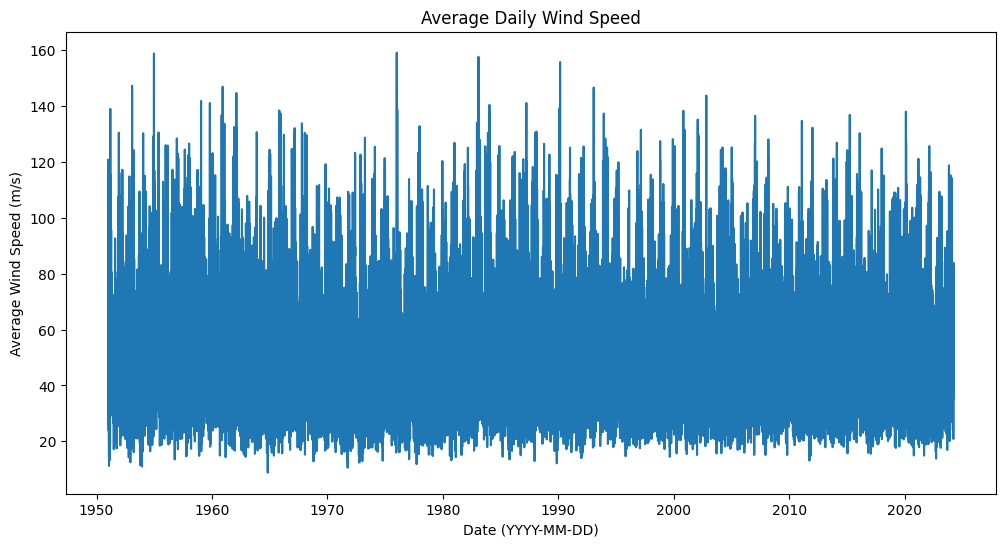

In [23]:
import matplotlib.pyplot as plt

daily_wind_speed = df.groupby(df['Date (YYYY-MM-DD)'].dt.date)['Hourly Average Wind Speed (m/s)'].mean()

# Plot
plt.figure(figsize=(12, 6))
daily_wind_speed.plot(title='Average Daily Wind Speed')
plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Average Wind Speed (m/s)')
plt.show()

### Temperature

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and has been prepared as previously discussed
df['Date (YYYY-MM-DD)'] = pd.to_datetime(df['Date (YYYY-MM-DD)'])  # Ensure 'Date' is a datetime object
df['Month'] = df['Date (YYYY-MM-DD)'].dt.month  # Extract month for seasonal categorization

# Define months for each season
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
fall_months = [9, 10, 11]
winter_months = [12, 1, 2]

# Filter data by season
spring_data = df[df['Month'].isin(spring_months)]
summer_data = df[df['Month'].isin(summer_months)]
fall_data = df[df['Month'].isin(fall_months)]
winter_data = df[df['Month'].isin(winter_months)]

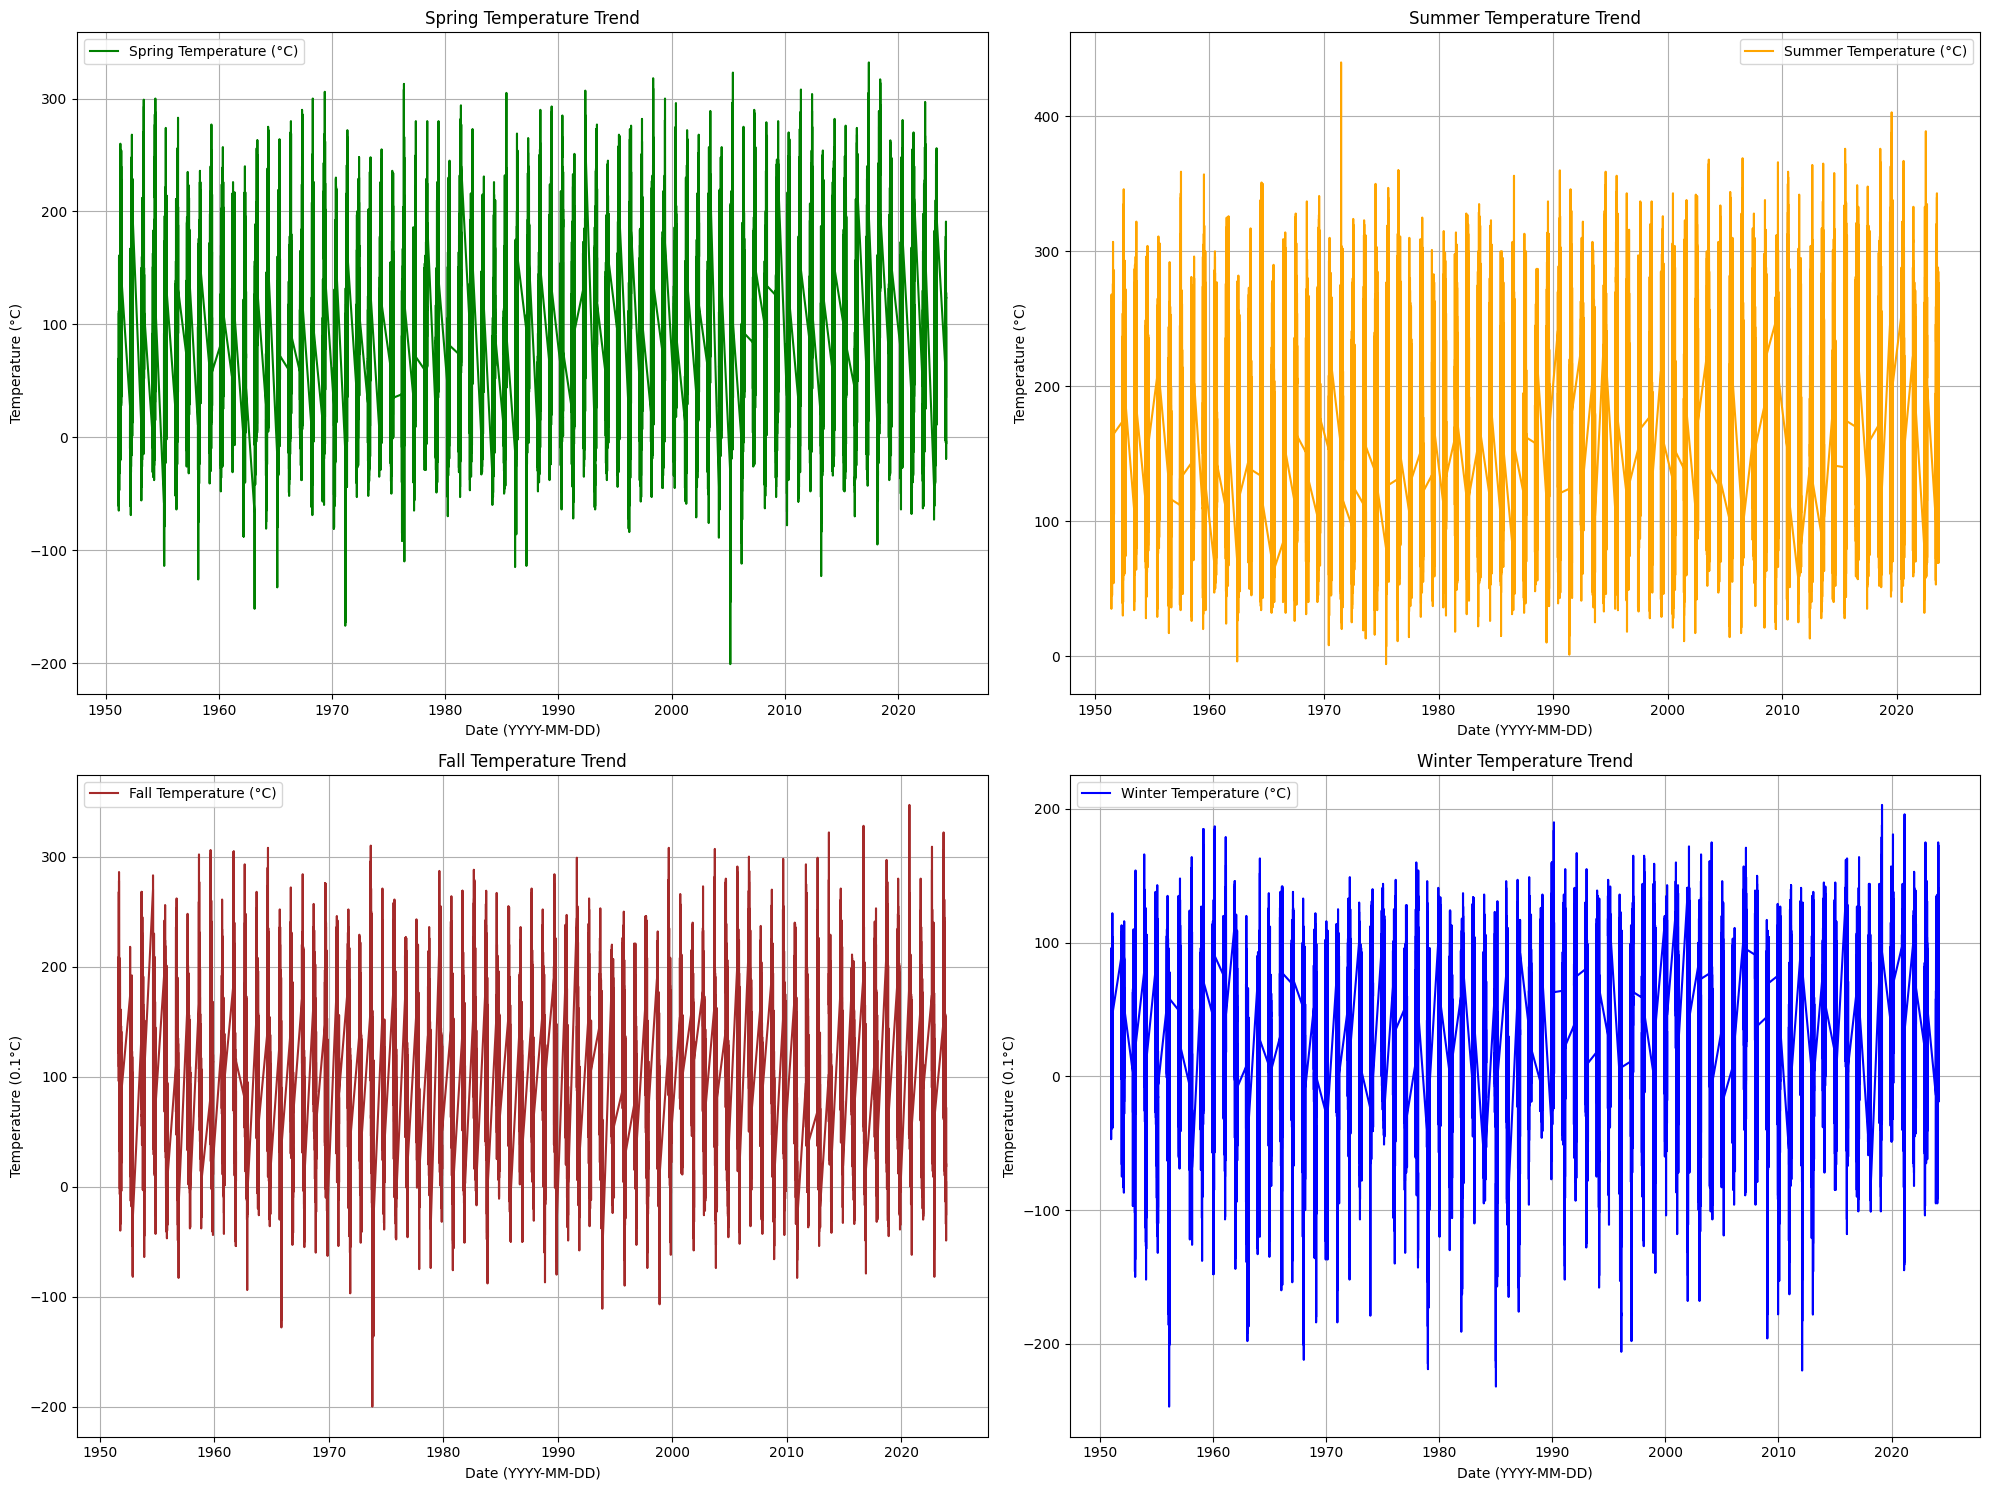

In [25]:
# Setup the plot grid
fig, axs = plt.subplots(2, 2, figsize=(20, 15))  # Adjust size as needed

# Plot Temperature Trend for Spring
axs[0, 0].plot(spring_data['Date (YYYY-MM-DD)'], spring_data['Temperature (0.1°C)'], label='Spring Temperature (°C)', color='green')
axs[0, 0].set_title('Spring Temperature Trend')
axs[0, 0].set_xlabel('Date (YYYY-MM-DD)')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Plot Temperature Trend for Summer
axs[0, 1].plot(summer_data['Date (YYYY-MM-DD)'], summer_data['Temperature (0.1°C)'], label='Summer Temperature (°C)', color='orange')
axs[0, 1].set_title('Summer Temperature Trend')
axs[0, 1].set_xlabel('Date (YYYY-MM-DD)')
axs[0, 1].set_ylabel('Temperature (°C)')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Plot Temperature Trend for Fall
axs[1, 0].plot(fall_data['Date (YYYY-MM-DD)'], fall_data['Temperature (0.1°C)'], label='Fall Temperature (°C)', color='brown')
axs[1, 0].set_title('Fall Temperature Trend')
axs[1, 0].set_xlabel('Date (YYYY-MM-DD)')
axs[1, 0].set_ylabel('Temperature (0.1°C)')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Plot Temperature Trend for Winter
axs[1, 1].plot(winter_data['Date (YYYY-MM-DD)'], winter_data['Temperature (0.1°C)'], label='Winter Temperature (°C)', color='blue')
axs[1, 1].set_title('Winter Temperature Trend')
axs[1, 1].set_xlabel('Date (YYYY-MM-DD)')
axs[1, 1].set_ylabel('Temperature (0.1°C)')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Stations Herwijnen, Maastricht, Volkel 
Below in the third dataset about different Weather station locations, we conducted that stations Herwijnen, Maastricht, Volkel  are the nearest to the cities our users travels to and from. The following stations have station ids respectivelly - 356, 375, 380 and this is why now we would try to understand more about specificaly them.

In [26]:
df['Station ID'].unique()

array([380, 310, 290, 280, 350, 370, 275, 240, 235, 210, 270, 260, 375,
       265, 344, 330, 225, 308, 331, 285, 312, 316, 348, 273, 356, 279,
       283, 269, 286, 391, 267, 343, 278, 277, 319, 340, 251, 248, 242,
       315, 313, 311, 324, 249, 377, 209, 257, 258, 323, 215])

Clearly here we can not only see the unique values for 'Station ID' but can also conclude that there are hidden characters and/or space that should be removed. 

In [27]:
#df['Station ID'] = df['Station ID'].str.replace(' ', '', regex=False)
#df['Station ID'].unique()

Also, lets check the values for the three nearest stations of the cities that regard our user journey - Herwijnen, Maastricht, Volkel.

In [28]:
station1 = df[df['Station ID'] == '356']
station2 = df[df['Station ID'] == '375']
station3 = df[df['Station ID'] == '380']

In [29]:
station1.value_counts().sum()

0

In [30]:
station2.value_counts().sum()

0

In [31]:
station3.value_counts().sum()

0

These represent the total value of data per each corresponding station or in total:

In [32]:
station_ids = ['356', '375', '380']

filtered_df = df[df['Station ID'].isin(station_ids)]

print(filtered_df.shape)

(0, 16)


In [33]:
for column in df:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for Date (YYYY-MM-DD):
Date (YYYY-MM-DD)
2014-12-09    1152
2012-08-20    1152
2012-08-09    1152
2012-08-10    1152
2012-08-11    1152
              ... 
1951-01-28     288
1951-01-29     288
1951-01-30     288
1951-01-31     288
1951-01-01     288
Name: count, Length: 26747, dtype: int64

Value counts for Station ID:
Station ID
310    641928
260    641928
290    641928
280    641928
350    641928
370    641928
275    641928
240    641928
235    641928
270    641928
375    641184
380    633174
344    591528
210    572712
265    493872
330    466632
225    466632
308    457872
285    378960
312    370200
316    361440
331    350640
348    332976
273    308832
356    302184
283    301135
279    300608
286    299505
269    299267
391    295721
267    295721
343    291312
278    291312
277    289488
319    287112
340    271608
251    261528
248    260328
242    250416
315    237984
313    237984
324    232152
249    219408
377    216840
209    202944
257    200760
311    1712

In [34]:
na_count_in_columns = df.isnull().sum()

print("Number of NaN values in each column:")
print(na_count_in_columns)

Number of NaN values in each column:
Date (YYYY-MM-DD)                          0
Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Wind Speed (m/s)                      380534
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                        0
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                       7268187
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    0
Month                                      0
dtype: int64


In order to analyze each Year and make comparisons, we would make a copy dataframe where the last 4 characters of 'Date (YYYY-MM-DD)'are removed in order to leave with only the year. 

In [35]:
df_sorted = df.copy()

df_sorted['Date (YYYY-MM-DD)'] = df_sorted['Date (YYYY-MM-DD)'].dt.year #removes the last 4 - the month and the date 
df_sorted = df_sorted.sort_values(by='Date (YYYY-MM-DD)', ascending=True)

df_sorted['Date (YYYY-MM-DD)'].value_counts()

Date (YYYY-MM-DD)
2012    421632
2013    420480
2015    420480
2011    420480
2006    419736
         ...  
1955    122640
1954    122640
1953    122640
1951    116064
2024     93840
Name: count, Length: 74, dtype: int64

## Let's continues with:

    Duration of Precipitation (hours)   - DOP
    Precipitation Amount (mm)           - PA
    Visibility (m)                      - V

## Visibility

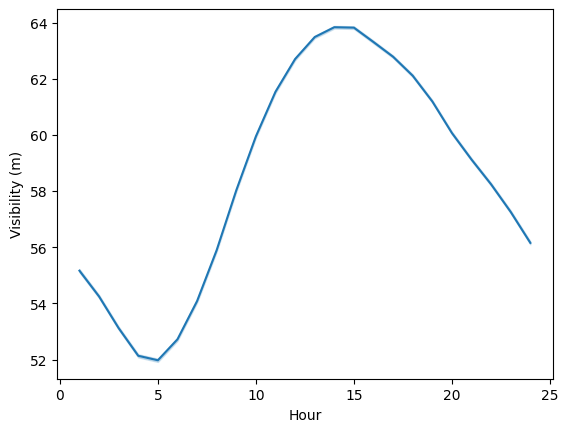

In [36]:
# Line chart for 'Hour' and 'Visibility (m)'
sns.lineplot(data=df, x='Hour', y='Visibility (m)')
plt.show()

In [37]:
# Calculate the mean 'Visibility (m)' for each 'Hour'
mean_visibility = df.groupby('Hour')['Visibility (m)'].mean()
mean_visibility

Hour
1     55.166424
2     54.249194
3     53.120663
4     52.136448
5     51.976425
6     52.723732
7     54.084915
8     55.899371
9     58.029124
10    59.948151
11    61.538379
12    62.701880
13    63.484188
14    63.834761
15    63.819157
16    63.306602
17    62.782292
18    62.107117
19    61.191938
20    60.067545
21    59.122721
22    58.238915
23    57.255968
24    56.156154
Name: Visibility (m), dtype: float64

Let's do it by seasons

In [38]:
def get_season(date):
    if (date.month == 12 and date.day >= 21) or (date.month < 3) or (date.month == 3 and date.day <= 20):
        return 'Winter'
    elif (date.month >= 3 and date.day > 20) or (date.month < 6) or (date.month == 6 and date.day <= 20):
        return 'Spring'
    elif (date.month >= 6 and date.day > 20) or (date.month < 9) or (date.month == 9 and date.day <= 21):
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Date (YYYY-MM-DD)'].apply(get_season)
df.head()

Date (YYYY-MM-DD)  Station ID  Hour  Hourly Average Wind Speed (m/s)  \
0        1951-01-01         380    23                             98.0   
1        1951-01-01         310     3                             87.0   
2        1951-01-01         310     2                             93.0   
3        1951-01-01         310     1                             93.0   
4        1951-01-01         290    24                              NaN   

   Wind Speed (m/s)  Highest Wind Gust (m/s)   Temperature (0.1°C)  \
0               0.0                       NaN                 22.0   
1              87.0                       NaN                 14.0   
2               0.0                       NaN                 11.0   
3               0.0                       NaN                  9.0   
4              62.0                       NaN                 21.0   

   Duration of Precipitation (hours)  Precipitation Amount (mm)  \
0                                NaN                        NaN   
1                                NaN                        NaN   
2                                NaN                        NaN   
3                                NaN                        NaN   
4                                NaN                        NaN   

   Visibility (m)  Fog Indicator  Rainfall Indicator  Snow Indicator  \
0             NaN            0.0                 0.0             0.0   
1             NaN            0.0                 0.0             0.0   
2             NaN            0.0                 0.0             0.0   
3             NaN            0.0                 0.0             0.0   
4             NaN            0.0                 0.0             0.0   

   Thunderstorm Indicator  Ice Formation Indicator  Month  Season  
0                     0.0                      0.0      1  Winter  
1                     0.0                      0.0      1  Winter  
2                     0.0                      0.0      1  Winter  
3                     0.0                      0.0      1  Winter  
4                     0.0                      0.0      1  Winter

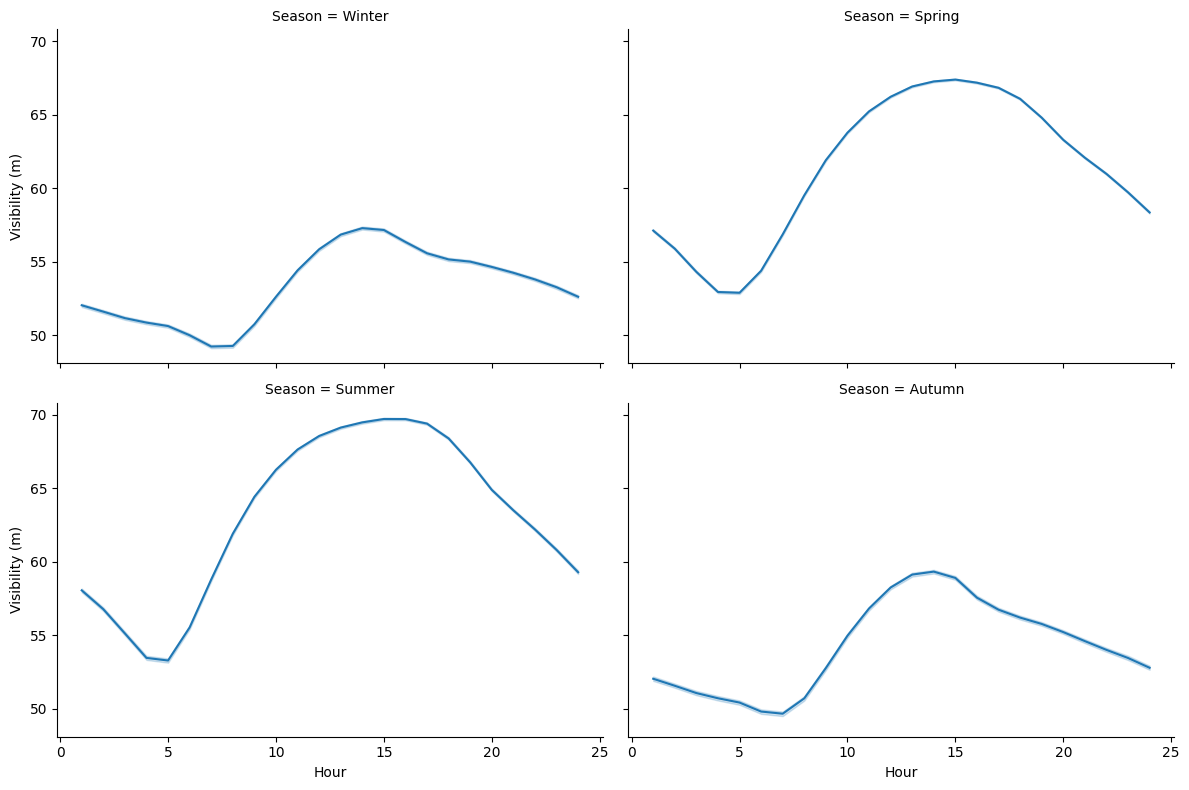

In [39]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='Season', col_wrap=2, height=4, aspect=1.5)

# Map to line plots
g.map(sns.lineplot, 'Hour', 'Visibility (m)')

plt.show()

In [40]:
# Calculate the mean 'Visibility (m)' for each 'Hour' of each 'Season'
mean_visibility = df.groupby(['Season','Hour'])['Visibility (m)'].mean()
mean_visibility.head(32)

Season  Hour
Autumn  1       52.024931
        2       51.547880
        3       51.051601
        4       50.698214
        5       50.404950
        6       49.793119
        7       49.646079
        8       50.692000
        9       52.756264
        10      54.952401
        11      56.806323
        12      58.235937
        13      59.114862
        14      59.315953
        15      58.886908
        16      57.544206
        17      56.725585
        18      56.186505
        19      55.755494
        20      55.201124
        21      54.586565
        22      53.990515
        23      53.439274
        24      52.772276
Spring  1       57.121085
        2       55.889735
        3       54.311324
        4       52.941793
        5       52.888268
        6       54.388482
        7       56.863045
        8       59.522946
Name: Visibility (m), dtype: float64

In [41]:
def fill_visibility(row):
    if pd.isna(row['Visibility (m)']):
        return mean_visibility[row['Season'], row['Hour']]
    else:
        return row['Visibility (m)']

df['Visibility (m)'] = df.apply(fill_visibility, axis=1)

df

Date (YYYY-MM-DD)  Station ID  Hour  Hourly Average Wind Speed (m/s)  \
0               1951-01-01         380    23                             98.0   
1               1951-01-01         310     3                             87.0   
2               1951-01-01         310     2                             93.0   
3               1951-01-01         310     1                             93.0   
4               1951-01-01         290    24                              NaN   
...                    ...         ...   ...                              ...   
19188670        2024-03-25         273     4                             20.0   
19188671        2024-03-25         273     3                             20.0   
19188672        2024-03-25         273     2                             20.0   
19188673        2024-03-25         273     8                             20.0   
19188674        2024-03-25         375     5                             20.0   

          Wind Speed (m/s)  Highest Wind Gust (m/s)   Temperature (0.1°C)  \
0                      0.0                       NaN                 22.0   
1                     87.0                       NaN                 14.0   
2                      0.0                       NaN                 11.0   
3                      0.0                       NaN                  9.0   
4                     62.0                       NaN                 21.0   
...                    ...                       ...                  ...   
19188670              30.0                      40.0                 52.0   
19188671              20.0                      30.0                 52.0   
19188672              20.0                      40.0                 50.0   
19188673              20.0                      40.0                 75.0   
19188674              20.0                      30.0                 -4.0   

          Duration of Precipitation (hours)  Precipitation Amount (mm)  \
0                                       NaN                        NaN   
1                                       NaN                        NaN   
2                                       NaN                        NaN   
3                                       NaN                        NaN   
4                                       NaN                        NaN   
...                                     ...                        ...   
19188670                                0.0                        0.0   
19188671                                0.0                        0.0   
19188672                                0.0                        0.0   
19188673                                0.0                        0.0   
19188674                                0.0                        0.0   

          Visibility (m)  Fog Indicator  Rainfall Indicator  Snow Indicator  \
0              53.267449            0.0                 0.0             0.0   
1              51.162157            0.0                 0.0             0.0   
2              51.603766            0.0                 0.0             0.0   
3              52.037477            0.0                 0.0             0.0   
4              52.616341            0.0                 0.0             0.0   
...                  ...            ...                 ...             ...   
19188670       70.000000            0.0                 0.0             0.0   
19188671       70.000000            0.0                 0.0             0.0   
19188672       70.000000            0.0                 0.0             0.0   
19188673       70.000000            0.0                 0.0             0.0   
19188674       56.000000            0.0                 0.0             0.0   

          Thunderstorm Indicator  Ice Formation Indicator  Month  Season  
0                            0.0                      0.0      1  Winter  
1                            0.0                      0.0      1  Winter  
2                            0.0                

In [42]:
df.shape
df.isna().sum()

Date (YYYY-MM-DD)                          0
Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Wind Speed (m/s)                      380534
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                        0
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                             0
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    0
Month                                      0
Season                                     0
dtype: int64

Final check to see if the Values have not changed drasticly

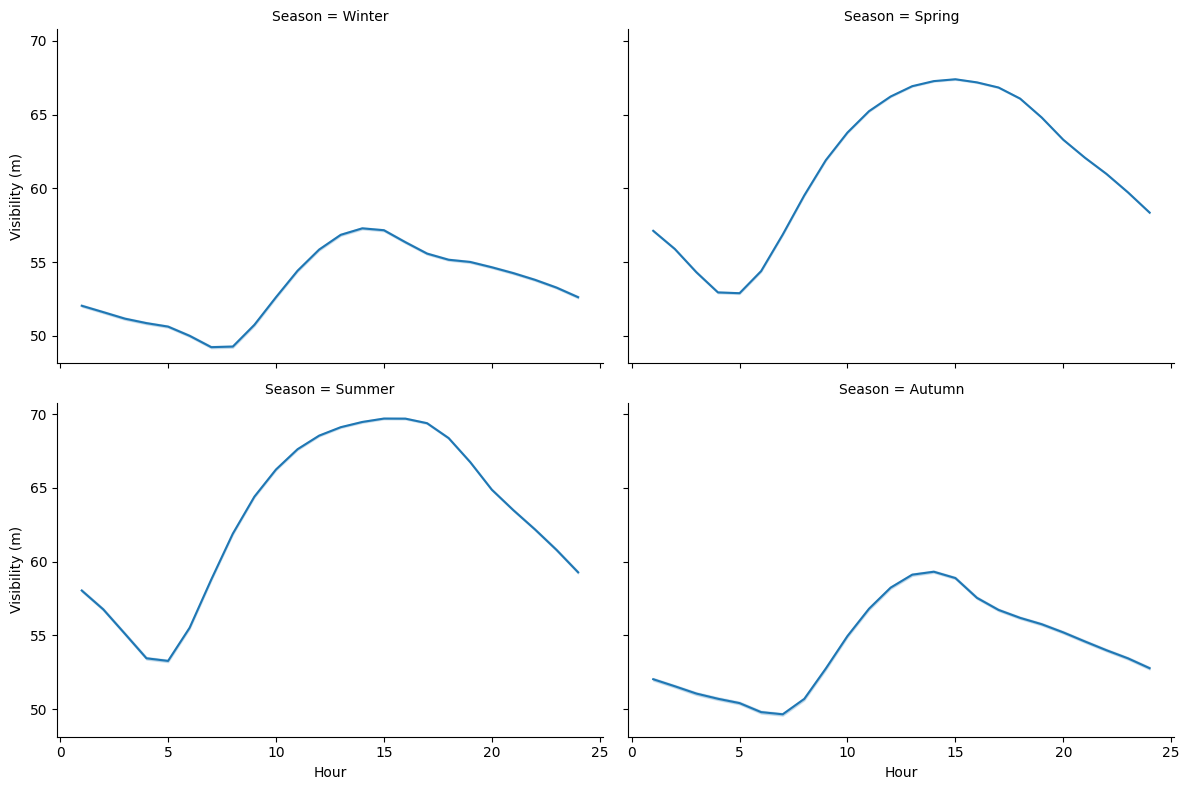

In [43]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='Season', col_wrap=2, height=4, aspect=1.5)

# Map to line plots
g.map(sns.lineplot, 'Hour', 'Visibility (m)')

plt.show()

### Let's continue on with the Precipitation amount and Duration of Precipitation 

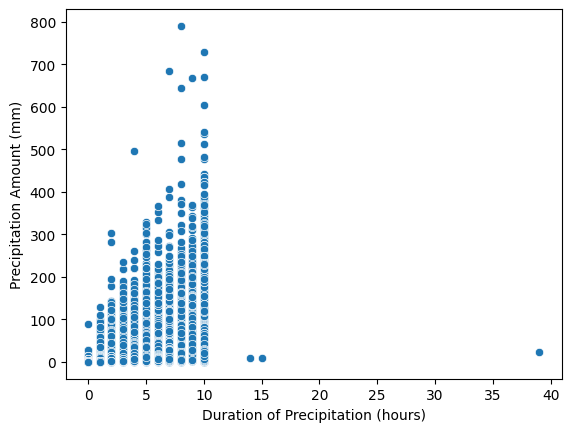

In [44]:
#Scatterplot for 'Duration of Precipitation (hours)' and 'Precipitation Amount (mm)'
sns.scatterplot(data=df, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)')
plt.show()

There do seem to be some outliers


In [45]:
value_counts = df['Duration of Precipitation (hours)'].value_counts()
print(value_counts)

Duration of Precipitation (hours)
0.0     10306448
10.0      383923
3.0       141913
2.0       133245
4.0       124606
5.0       112960
6.0       100837
1.0        93128
8.0        93089
9.0        91271
7.0        91184
15.0           1
14.0           1
39.0           1
Name: count, dtype: int64


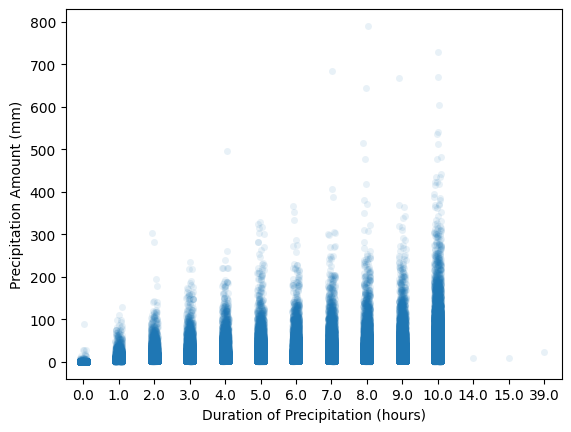

In [46]:
sns.stripplot(data=df, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)', jitter=True, alpha=0.1)
plt.show()

There do seem to be outliners, however it is not that big of a problem with the way that we are going to address them

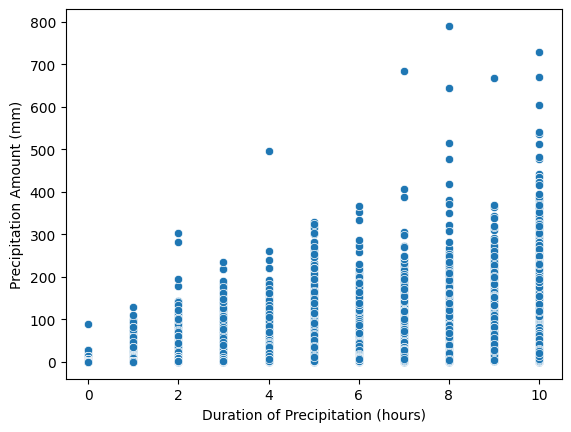

In [47]:
# Filter the DataFrame
df_filtered = df[~df['Duration of Precipitation (hours)'].isin([14, 15, 39])]

# Scatterplot for 'Duration of Precipitation (hours)' and 'Precipitation Amount (mm)'
sns.scatterplot(data=df_filtered, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)')
plt.show()

based on the scatterplot we do see that it is possible to separete them based on the DOP

Let's check the values by stations like previously done

In [48]:
df.groupby('Station ID').apply(lambda x: x.isna().sum())


C:\Users\kenar\AppData\Local\Temp\ipykernel_1908\1235984672.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Station ID').apply(lambda x: x.isna().sum())


Date (YYYY-MM-DD)  Station ID  Hour  \
Station ID                                        
209                         0           0     0   
210                         0           0     0   
215                         0           0     0   
225                         0           0     0   
235                         0           0     0   
240                         0           0     0   
242                         0           0     0   
248                         0           0     0   
249                         0           0     0   
251                         0           0     0   
257                         0           0     0   
258                         0           0     0   
260                         0           0     0   
265                         0           0     0   
267                         0           0     0   
269                         0           0     0   
270                         0           0     0   
273                         0           0     0   
275                         0           0     0   
277                         0           0     0   
278                         0           0     0   
279                         0           0     0   
280                         0           0     0   
283                         0           0     0   
285                         0           0     0   
286                         0           0     0   
290                         0           0     0   
308                         0           0     0   
310                         0           0     0   
311                         0           0     0   
312                         0           0     0   
313                         0           0     0   
315                         0           0     0   
316                         0           0     0   
319                         0           0     0   
323                         0           0     0   
324                         0           0     0   
330                         0           0     0   
331                         0           0     0   
340                         0           0     0   
343                         0           0     0   
344                         0           0     0   
348                         0           0     0   
350                         0           0     0   
356                         0           0     0   
370                         0           0     0   
375                         0           0     0   
377                         0           0     0   
380                         0           0     0   
391                         0           0     0   

            Hourly Average Wind Speed (m/s)  Wind Speed (m/s)  \
Station ID                                                      
209                                    5586              5576   
210                                  175383               343   
215                                      10                 9   
225                                   99149              2947   
235                                      22                22   
240                                  175295                 0   
242                                    3857              2288   
248                                    1221              1218   
249                                     159               158   
251                                     459               458   
257                                  200760            200760   
258                                    4709              4703   
260                                       0                 0   
265                                  169451              2298   
267                                    2793              2789   
269                                      39                27   
270                                  175295                 0   
273                                     122              7360   
275                                  175424             193

as expected, the most are in 375, however let us see what it also looks like hourly for everything, sinve there are quite a lot fo missing values (current)


In [49]:
df.groupby('Hour').apply(lambda x: x.isna().sum())

C:\Users\kenar\AppData\Local\Temp\ipykernel_1908\960120785.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Hour').apply(lambda x: x.isna().sum())


Date (YYYY-MM-DD)  Station ID  Hour  Hourly Average Wind Speed (m/s)  \
Hour                                                                         
1                     0           0     0                            92560   
2                     0           0     0                            92590   
3                     0           0     0                            92586   
4                     0           0     0                            92576   
5                     0           0     0                            92585   
6                     0           0     0                            92640   
7                     0           0     0                            92559   
8                     0           0     0                            92536   
9                     0           0     0                            92539   
10                    0           0     0                            92554   
11                    0           0     0                            92538   
12                    0           0     0                            92627   
13                    0           0     0                            92506   
14                    0           0     0                            92474   
15                    0           0     0                            92456   
16                    0           0     0                            92450   
17                    0           0     0                            92455   
18                    0           0     0                            92551   
19                    0           0     0                            92498   
20                    0           0     0                            92524   
21                    0           0     0                            92542   
22                    0           0     0                            92554   
23                    0           0     0                            92569   
24                    0           0     0                            92668   

      Wind Speed (m/s)  Highest Wind Gust (m/s)   Temperature (0.1°C)  \
Hour                                                                    
1                19157                    123652                    0   
2                19168                    123713                    0   
3                17209                    123775                    0   
4                15996                    123773                    0   
5                15741                    123848                    0   
6                14625                    124304                    0   
7                14585                    123839                    0   
8                14472                    123870                    0   
9                14567                    124042                    0   
10               14569                    124041                    0   
11               14573                    123893                    0   
12               14687                    124430                    0   
13               14697                    123762                    0   
14               14557                    123627                    0   
15               14906                    123461                    0   
16               15092                    123247                    0   
17               15115                    123206                    0   
18               15137                    123774                    0   
19               15315                    123343                    0   
20               15999                    123369                    0   
21               16172                    123554                    0   
22               18431                    123472                    0   
23               18500                    123589                    0   
24               17264                    124272                    0   

      Duration of Precipitation (hours)  Precipitation Amount (mm)  \
Hour    

Let's start grouping by the duration of precipitation that seems reasonable

In [50]:
def categorize_dop(duration_of_precipitation):
    if pd.isna(duration_of_precipitation):
        return 0
    elif duration_of_precipitation <= 2:
        return 1
    elif duration_of_precipitation <= 9:
        return 2
    else:
        return 3

df['DOP Sector'] = df['Duration of Precipitation (hours)'].apply(categorize_dop)

df['DOP Sector'].unique()

array([0, 1, 2, 3], dtype=int64)

Let's fill in the missing values based on the categories that we gave them 

In [51]:
df['Precipitation Amount (mm)'] = df.groupby('DOP Sector')['Precipitation Amount (mm)'].transform(lambda x: x.fillna(x.mean()))

df['Precipitation Amount (mm)'].fillna(df['Precipitation Amount (mm)'].mean(), inplace=True)

df

C:\Users\kenar\AppData\Local\Temp\ipykernel_1908\1474255968.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precipitation Amount (mm)'].fillna(df['Precipitation Amount (mm)'].mean(), inplace=True)


Date (YYYY-MM-DD)  Station ID  Hour  Hourly Average Wind Speed (m/s)  \
0               1951-01-01         380    23                             98.0   
1               1951-01-01         310     3                             87.0   
2               1951-01-01         310     2                             93.0   
3               1951-01-01         310     1                             93.0   
4               1951-01-01         290    24                              NaN   
...                    ...         ...   ...                              ...   
19188670        2024-03-25         273     4                             20.0   
19188671        2024-03-25         273     3                             20.0   
19188672        2024-03-25         273     2                             20.0   
19188673        2024-03-25         273     8                             20.0   
19188674        2024-03-25         375     5                             20.0   

          Wind Speed (m/s)  Highest Wind Gust (m/s)   Temperature (0.1°C)  \
0                      0.0                       NaN                 22.0   
1                     87.0                       NaN                 14.0   
2                      0.0                       NaN                 11.0   
3                      0.0                       NaN                  9.0   
4                     62.0                       NaN                 21.0   
...                    ...                       ...                  ...   
19188670              30.0                      40.0                 52.0   
19188671              20.0                      30.0                 52.0   
19188672              20.0                      40.0                 50.0   
19188673              20.0                      40.0                 75.0   
19188674              20.0                      30.0                 -4.0   

          Duration of Precipitation (hours)  Precipitation Amount (mm)  \
0                                       NaN                    0.83167   
1                                       NaN                    0.83167   
2                                       NaN                    0.83167   
3                                       NaN                    0.83167   
4                                       NaN                    0.83167   
...                                     ...                        ...   
19188670                                0.0                    0.00000   
19188671                                0.0                    0.00000   
19188672                                0.0                    0.00000   
19188673                                0.0                    0.00000   
19188674                                0.0                    0.00000   

          Visibility (m)  Fog Indicator  Rainfall Indicator  Snow Indicator  \
0              53.267449            0.0                 0.0             0.0   
1              51.162157            0.0                 0.0             0.0   
2              51.603766            0.0                 0.0             0.0   
3              52.037477            0.0                 0.0             0.0   
4              52.616341            0.0                 0.0             0.0   
...                  ...            ...                 ...             ...   
19188670       70.000000            0.0                 0.0             0.0   
19188671       70.000000            0.0                 0.0             0.0   
19188672       70.000000            0.0                 0.0             0.0   
19188673       70.000000            0.0                 0.0             0.0   
19188674       56.000000            0.0                 0.0             0.0   

          Thunderstorm Indicator  Ice Formation Indicator  Month  Season  \
0                            0.0                      0.0      1  Winter   
1                            0.0                      0.0      1  Winter   
2                            0.0             

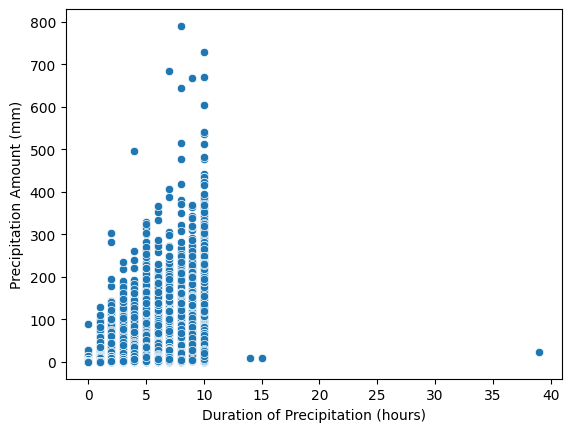

In [52]:
#Scatterplot for 'Duration of Precipitation (hours)' and 'Precipitation Amount (mm)'
sns.scatterplot(data=df, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)')
plt.show()

c:\Users\kenar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\kenar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\kenar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


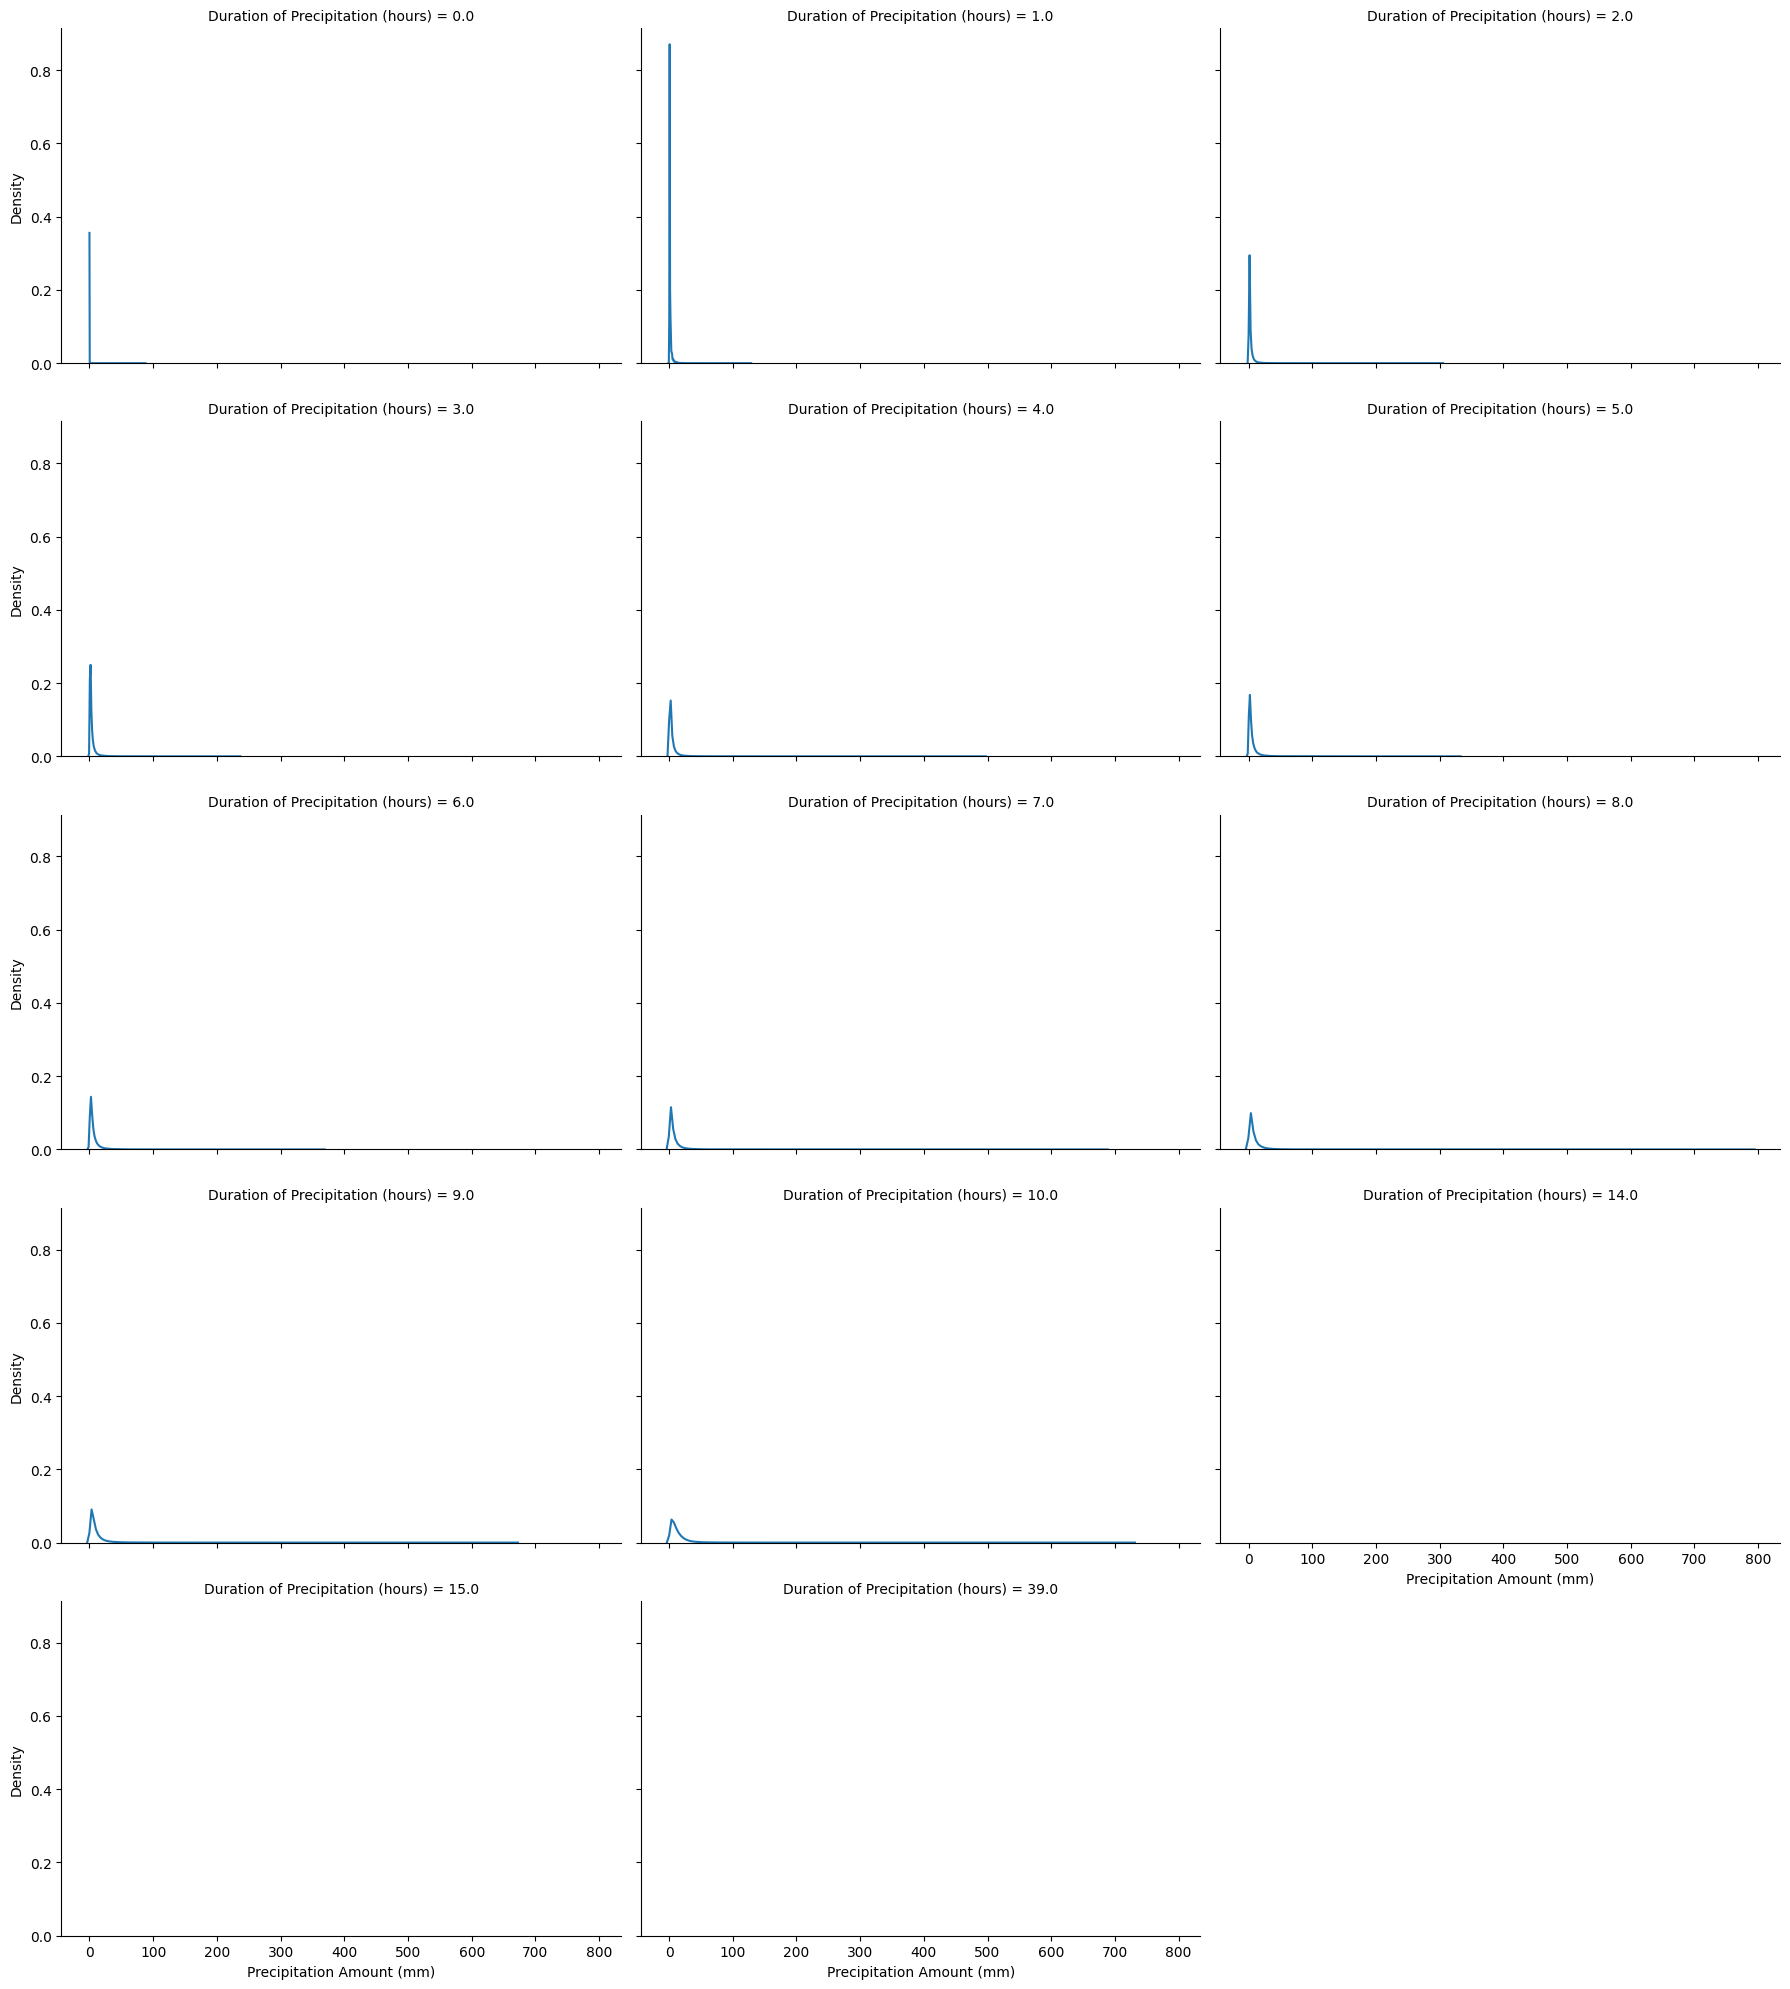

In [53]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='Duration of Precipitation (hours)', col_wrap=3, height=4, aspect=1.5)

# Map to KDE plots
g.map(sns.kdeplot, 'Precipitation Amount (mm)')

plt.show()

### Duration of precipitation:


By the wat we previously did the PA, it would seem a good idea to do the DOP the same way, since it also does seem like it correlates mainly with the PA

In [54]:
df.groupby('Station ID').apply(lambda x: x.isna().sum())

C:\Users\kenar\AppData\Local\Temp\ipykernel_1908\3374962553.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Station ID').apply(lambda x: x.isna().sum())


Date (YYYY-MM-DD)  Station ID  Hour  \
Station ID                                        
209                         0           0     0   
210                         0           0     0   
215                         0           0     0   
225                         0           0     0   
235                         0           0     0   
240                         0           0     0   
242                         0           0     0   
248                         0           0     0   
249                         0           0     0   
251                         0           0     0   
257                         0           0     0   
258                         0           0     0   
260                         0           0     0   
265                         0           0     0   
267                         0           0     0   
269                         0           0     0   
270                         0           0     0   
273                         0           0     0   
275                         0           0     0   
277                         0           0     0   
278                         0           0     0   
279                         0           0     0   
280                         0           0     0   
283                         0           0     0   
285                         0           0     0   
286                         0           0     0   
290                         0           0     0   
308                         0           0     0   
310                         0           0     0   
311                         0           0     0   
312                         0           0     0   
313                         0           0     0   
315                         0           0     0   
316                         0           0     0   
319                         0           0     0   
323                         0           0     0   
324                         0           0     0   
330                         0           0     0   
331                         0           0     0   
340                         0           0     0   
343                         0           0     0   
344                         0           0     0   
348                         0           0     0   
350                         0           0     0   
356                         0           0     0   
370                         0           0     0   
375                         0           0     0   
377                         0           0     0   
380                         0           0     0   
391                         0           0     0   

            Hourly Average Wind Speed (m/s)  Wind Speed (m/s)  \
Station ID                                                      
209                                    5586              5576   
210                                  175383               343   
215                                      10                 9   
225                                   99149              2947   
235                                      22                22   
240                                  175295                 0   
242                                    3857              2288   
248                                    1221              1218   
249                                     159               158   
251                                     459               458   
257                                  200760            200760   
258                                    4709              4703   
260                                       0                 0   
265                                  169451              2298   
267                                    2793              2789   
269                                      39                27   
270                                  175295                 0   
273                                     122              7360   
275                                  175424             193

In [55]:
df.groupby('Hour').apply(lambda x: x.isna().sum())

C:\Users\kenar\AppData\Local\Temp\ipykernel_1908\960120785.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Hour').apply(lambda x: x.isna().sum())


Date (YYYY-MM-DD)  Station ID  Hour  Hourly Average Wind Speed (m/s)  \
Hour                                                                         
1                     0           0     0                            92560   
2                     0           0     0                            92590   
3                     0           0     0                            92586   
4                     0           0     0                            92576   
5                     0           0     0                            92585   
6                     0           0     0                            92640   
7                     0           0     0                            92559   
8                     0           0     0                            92536   
9                     0           0     0                            92539   
10                    0           0     0                            92554   
11                    0           0     0                            92538   
12                    0           0     0                            92627   
13                    0           0     0                            92506   
14                    0           0     0                            92474   
15                    0           0     0                            92456   
16                    0           0     0                            92450   
17                    0           0     0                            92455   
18                    0           0     0                            92551   
19                    0           0     0                            92498   
20                    0           0     0                            92524   
21                    0           0     0                            92542   
22                    0           0     0                            92554   
23                    0           0     0                            92569   
24                    0           0     0                            92668   

      Wind Speed (m/s)  Highest Wind Gust (m/s)   Temperature (0.1°C)  \
Hour                                                                    
1                19157                    123652                    0   
2                19168                    123713                    0   
3                17209                    123775                    0   
4                15996                    123773                    0   
5                15741                    123848                    0   
6                14625                    124304                    0   
7                14585                    123839                    0   
8                14472                    123870                    0   
9                14567                    124042                    0   
10               14569                    124041                    0   
11               14573                    123893                    0   
12               14687                    124430                    0   
13               14697                    123762                    0   
14               14557                    123627                    0   
15               14906                    123461                    0   
16               15092                    123247                    0   
17               15115                    123206                    0   
18               15137                    123774                    0   
19               15315                    123343                    0   
20               15999                    123369                    0   
21               16172                    123554                    0   
22               18431                    123472                    0   
23               18500                    123589                    0   
24               17264                    124272                    0   

      Duration of Precipitation (hours)  Precipitation Amount (mm)  \
Hour    

In [56]:
mean_precipitation = df.groupby('Duration of Precipitation (hours)')['Precipitation Amount (mm)'].mean()
mean_precipitation

Duration of Precipitation (hours)
0.0      0.088969
1.0      1.963026
2.0      2.903602
3.0      3.821299
4.0      4.771728
5.0      5.793832
6.0      6.792854
7.0      7.939799
8.0      9.097283
9.0     10.422857
10.0    13.156870
14.0     9.000000
15.0     9.000000
39.0    23.000000
Name: Precipitation Amount (mm), dtype: float64

Now with the help of a function we can fill in the places where the DOP values are empty, but the PA values are filled in, with a mean

In [57]:
# Function to find the 'Duration of Precipitation (hours)' value with the closest mean 'Precipitation Amount (mm)'
def find_closest_duration(row):
    return (mean_precipitation - row['Precipitation Amount (mm)']).abs().idxmin()

# Apply the function to the rows where 'Duration of Precipitation (hours)' is missing
df.loc[df['Duration of Precipitation (hours)'].isna(), 'Duration of Precipitation (hours)'] = df[df['Duration of Precipitation (hours)'].isna()].apply(find_closest_duration, axis=1)

Now let's see what the changes look like 

In [58]:
df.sample(15)

Date (YYYY-MM-DD)  Station ID  Hour  Hourly Average Wind Speed (m/s)  \
14892288        2013-10-02         375    21                             40.0   
15293686        2014-09-19         324     2                             20.0   
9752445         2001-05-18         316    18                             60.0   
9359288         2000-05-21         280    18                             30.0   
17777884        2020-09-27         313     9                            160.0   
16909705        2018-08-19         249     9                             50.0   
13585465        2010-08-22         308     5                             40.0   
19122971        2024-01-26         348    18                             40.0   
13275732        2009-11-20         248     8                             90.0   
14341171        2012-06-10         285     2                            120.0   
17208628        2019-05-11         242    22                             60.0   
11652383        2005-12-27         343     3                             40.0   
8211112         1997-05-19         242    13                             80.0   
15278775        2014-09-06         290     5                              0.0   
7072354         1994-01-03         391     3                             41.0   

          Wind Speed (m/s)  Highest Wind Gust (m/s)   Temperature (0.1°C)  \
14892288              40.0                      60.0                109.0   
15293686              20.0                      40.0                177.0   
9752445               60.0                      70.0                105.0   
9359288               40.0                      50.0                109.0   
17777884             160.0                     200.0                156.0   
16909705              50.0                      80.0                189.0   
13585465              40.0                      60.0                191.0   
19122971              30.0                      70.0                 40.0   
13275732             100.0                     120.0                153.0   
14341171             120.0                     150.0                140.0   
17208628              60.0                      80.0                 88.0   
11652383              50.0                      80.0                -14.0   
8211112               60.0                     100.0                171.0   
15278775               0.0                      10.0                111.0   
7072354               41.0                      72.0                 57.0   

          Duration of Precipitation (hours)  Precipitation Amount (mm)  \
14892288                                0.0                    0.00000   
15293686                                0.0                    0.83167   
9752445                                 0.0                    0.83167   
9359288                                 7.0                    2.00000   
17777884                                0.0                    0.83167   
16909705                                0.0                    0.00000   
13585465                                0.0                    0.83167   
19122971                                0.0                    0.00000   
13275732                                0.0                    0.83167   
14341171                                0.0                    0.83167   
17208628                                0.0                    0.83167   
11652383                                0.0                    0.83167   
8211112                                 0.0                    0.83167   
15278775                                0.0                    0.00000   
7072354                                 0.0                    0.00000   

          Visibility (m)  Fog Indicator  Rainfall Indicator  Snow Indicator  \
14892288       80.000000            0.0                 0.0             0.0   
15293686       56.759891            0.0                 0.0             0.0   
9752445        66.086999            0.0                 0

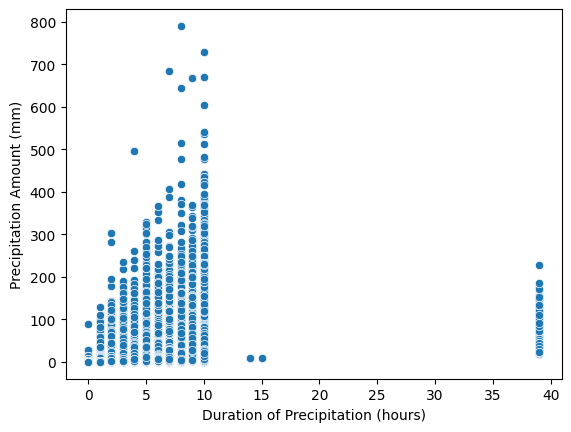

In [59]:
#Scatterplot for 'Duration of Precipitation (hours)' and 'Precipitation Amount (mm)'
sns.scatterplot(data=df, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)')
plt.show()

In [60]:
df.isna().sum()

Date (YYYY-MM-DD)                          0
Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Wind Speed (m/s)                      380534
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                        0
Duration of Precipitation (hours)          0
Precipitation Amount (mm)                  0
Visibility (m)                             0
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    0
Month                                      0
Season                                     0
DOP Sector                                 0
dtype: int64

Hours, DOP, PA, Hours - Scatterplot

In [61]:
df.sample(15)

Date (YYYY-MM-DD)  Station ID  Hour  Hourly Average Wind Speed (m/s)  \
18118036        2021-07-30         312     6                             60.0   
17255411        2019-06-22         319     4                             10.0   
5955804         1990-04-10         285     6                             82.0   
9846252         2001-08-09         290    15                             30.0   
3976867         1980-01-05         235    19                             46.0   
12711039        2008-07-08         210    15                             70.0   
354227          1953-12-09         260    12                             41.0   
7100433         1994-02-04         283    18                             21.0   
18242254        2021-11-19         235    14                             70.0   
8862025         1999-02-12         251    12                             50.0   
10565629        2003-05-08         340    19                             30.0   
13003969        2009-03-24         257    15                              NaN   
8374541         1997-10-28         312    18                             80.0   
14900437        2013-10-09         377     4                             30.0   
7995553         1996-10-09         279    14                             20.0   

          Wind Speed (m/s)  Highest Wind Gust (m/s)   Temperature (0.1°C)  \
18118036              50.0                      70.0                148.0   
17255411              20.0                      20.0                 76.0   
5955804               82.0                      98.0                 91.0   
9846252               20.0                      50.0                155.0   
3976867               51.0                      62.0                 57.0   
12711039              80.0                     110.0                162.0   
354227                26.0                      46.0                 81.0   
7100433               21.0                      36.0                 57.0   
18242254              70.0                     110.0                130.0   
8862025               60.0                      70.0                 10.0   
10565629              30.0                      60.0                124.0   
13003969               NaN                       NaN                 64.0   
8374541               80.0                     110.0                 21.0   
14900437              30.0                      40.0                139.0   
7995553               20.0                      30.0                124.0   

          Duration of Precipitation (hours)  Precipitation Amount (mm)  \
18118036                                0.0                    0.83167   
17255411                                0.0                    0.00000   
5955804                                 0.0                    0.83167   
9846252                                 6.0                    1.00000   
3976867                                 0.0                    1.00000   
12711039                                0.0                    0.00000   
354227                                 10.0                    5.00000   
7100433                                 0.0                    0.00000   
18242254                                0.0                    0.00000   
8862025                                 0.0                    0.00000   
10565629                                0.0                    0.83167   
13003969                                0.0                    0.00000   
8374541                                 0.0                    0.83167   
14900437                                0.0                    0.00000   
7995553                                 0.0                    1.00000   

          Visibility (m)  Fog Indicator  Rainfall Indicator  Snow Indicator  \
18118036       54.388482            0.0                 0.0             0.0   
17255411        2.000000            1.0                 0.0             0.0   
5955804        54.388482            0.0                 0

# Cleaning the wind-related columns

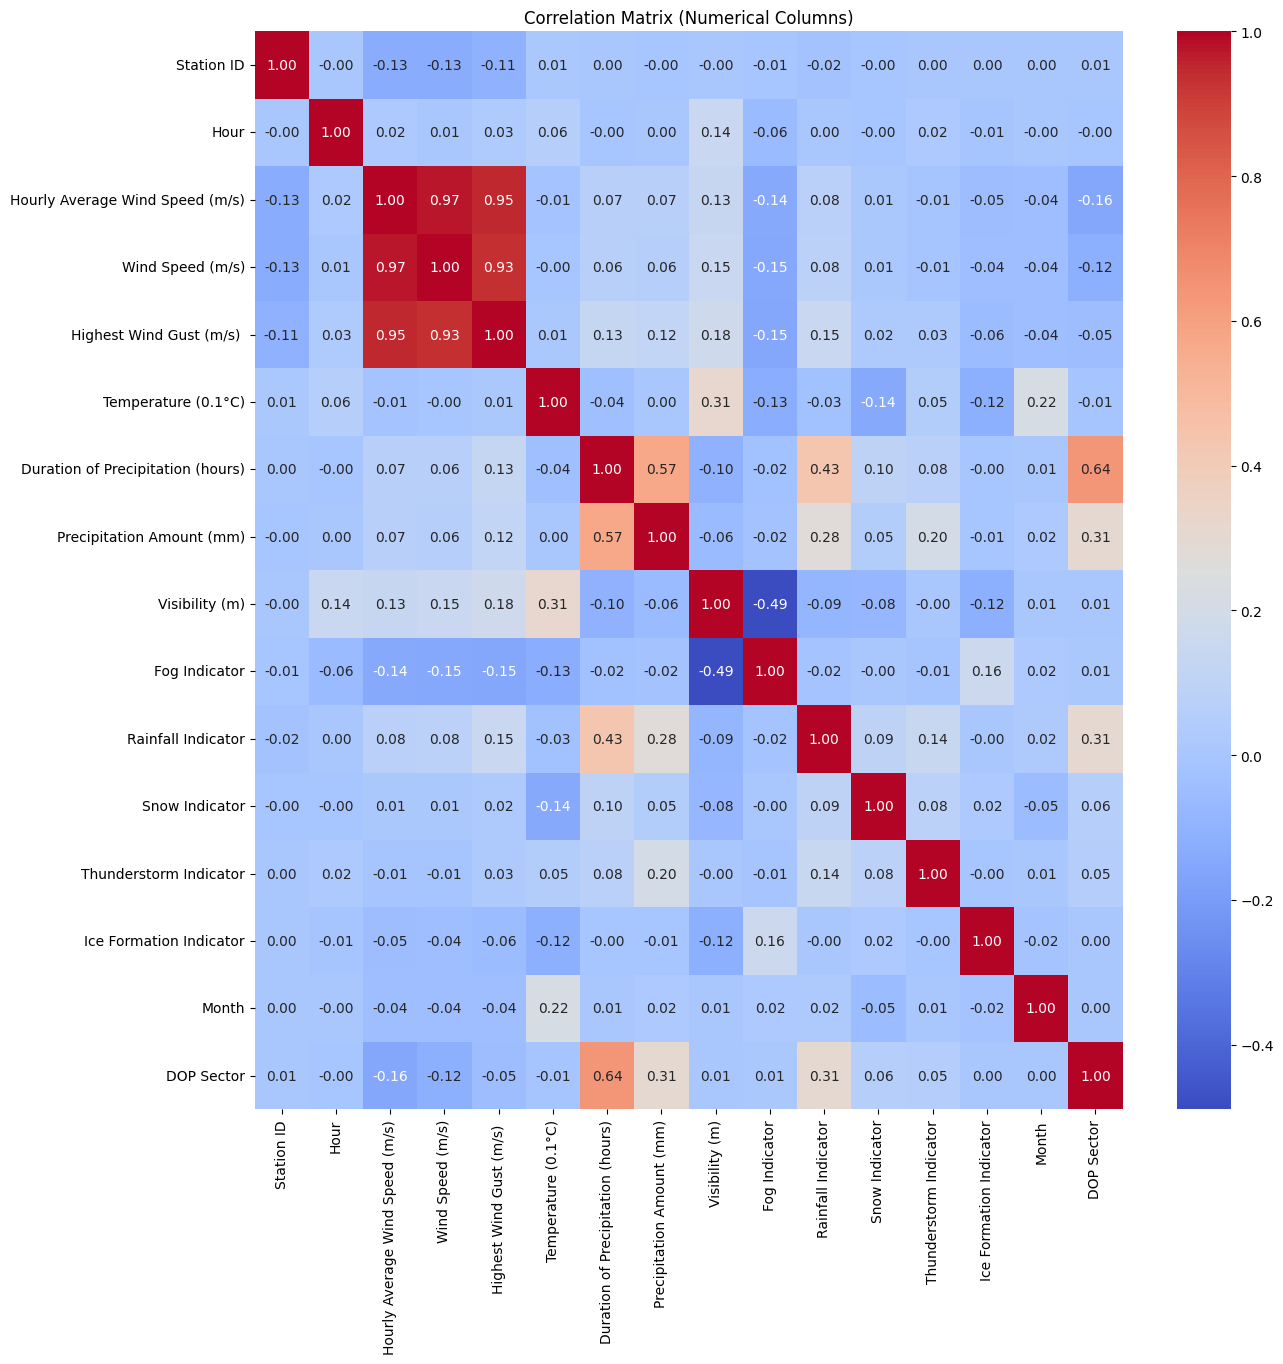

In [62]:
df_numerical_columns = df.select_dtypes(include=['int64', 'float64', 'int32'])

alex_correlation_matrix = df_numerical_columns.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(alex_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

In [63]:
df.isna().sum()

Date (YYYY-MM-DD)                          0
Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Wind Speed (m/s)                      380534
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                        0
Duration of Precipitation (hours)          0
Precipitation Amount (mm)                  0
Visibility (m)                             0
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    0
Month                                      0
Season                                     0
DOP Sector                                 0
dtype: int64

All 3 wind-related columns correlate the most with the 'Visibility (m)' column. The correlation aren't strong (between 0.21-0.25) but they are the best we've got. We should keep in mind that computing the correlation coefficients only works when conparing 2 continuous variables. We will have to look into the discrete and binary ones separately (at least the logical ones). We will skip the ones that have NAs in them, because they won't fully resolve the issue of removing the NAs in our 3 columns.

First, we will clean the Hourly Average Wind Speed column.

Text(0, 0.5, 'Hourly Average Wind Speed (m/s)')

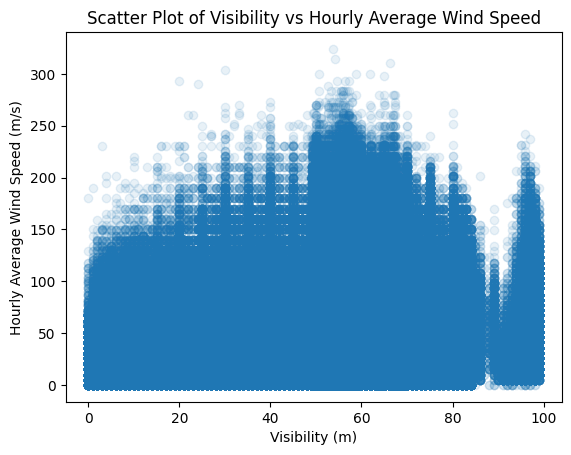

In [64]:
plt.scatter(df['Visibility (m)'], df['Hourly Average Wind Speed (m/s)'], alpha=0.1)
plt.title('Scatter Plot of Visibility vs Hourly Average Wind Speed')
plt.xlabel('Visibility (m)')
plt.ylabel('Hourly Average Wind Speed (m/s)')

We can see that visibility does impact the hourly average wind speed, but it only affects the upper limit of the range. A large percent of the hourly average wind speed values can be seen across the whole visibility range. Therefore, it would be difficult to clean this column based on the visibility.

In [65]:
filtered_df = df[df['Station ID'].isin([356, 375, 380])]   # If we decide to include more stations in the modeling, they can just be added here.

mean_hr_avg_wind_speed = filtered_df.groupby('Station ID')['Hourly Average Wind Speed (m/s)'].mean()
mean_hr_avg_wind_speed

Station ID
356    40.646505
375    37.879854
380    42.157849
Name: Hourly Average Wind Speed (m/s), dtype: float64

We can see that the mean of the hourly average wind speed is different for the different stations. Geographically, it makes sense that some places will experience more/stronger wind than others. Still, the stations are relatively close to each other and the differences are small.

In [66]:
df.groupby('Hour')['Hourly Average Wind Speed (m/s)'].mean()

Hour
1     46.205811
2     46.140760
3     46.125428
4     46.173284
5     46.404942
6     47.189555
7     48.720573
8     50.626621
9     52.731710
10    54.901271
11    56.768224
12    58.085303
13    58.714293
14    58.648759
15    57.814517
16    56.183988
17    54.029226
18    51.674633
19    49.398143
20    47.758667
21    46.966253
22    46.663577
23    46.498606
24    46.333855
Name: Hourly Average Wind Speed (m/s), dtype: float64

We can also see that the hour of the day has an impact on the mean of the hourly average wind speed.

In [67]:
df.groupby('Fog Indicator')['Hourly Average Wind Speed (m/s)'].mean()

Fog Indicator
0.0    51.555132
1.0    21.923518
Name: Hourly Average Wind Speed (m/s), dtype: float64

Whether fog is present or not has a BIG impact on the hourly average wind speed which makes sense as stronger winds would disperse the fog.

In [68]:
df.groupby('Rainfall Indicator')['Hourly Average Wind Speed (m/s)'].mean()

Rainfall Indicator
0.0    49.986745
1.0    57.920470
Name: Hourly Average Wind Speed (m/s), dtype: float64

In [69]:
df.groupby('Snow Indicator')['Hourly Average Wind Speed (m/s)'].mean()

Snow Indicator
0.0    50.832300
1.0    54.771908
Name: Hourly Average Wind Speed (m/s), dtype: float64

In [70]:
df.groupby('Thunderstorm Indicator')['Hourly Average Wind Speed (m/s)'].mean()

Thunderstorm Indicator
0.0    50.878260
1.0    47.601743
Name: Hourly Average Wind Speed (m/s), dtype: float64

The rainfall, snow and thunderstorm indicators have a much smaller impact on the hourly average wind speed.

In [71]:
df.groupby('Ice Formation Indicator')['Hourly Average Wind Speed (m/s)'].mean()

Ice Formation Indicator
0.0    50.981796
1.0    31.678302
Name: Hourly Average Wind Speed (m/s), dtype: float64

The ice formation indicator also plays a big role in whether the average wind speed will be high or not.

In [72]:
df.groupby('Month')['Hourly Average Wind Speed (m/s)'].mean()

Month
1     59.946489
2     57.456085
3     54.449339
4     49.108059
5     47.717586
6     45.393925
7     44.852414
8     43.566136
9     45.159498
10    51.001003
11    53.848349
12    57.837815
Name: Hourly Average Wind Speed (m/s), dtype: float64

The mean of the hourly average wind speed is different for the different months. Instead of the ice formation indicator, we can use the month, since whether there are conditions for ice or not depends a lot on the month.

Based on everything above, we can clean the hourly average wind speed column by grouping the data by month, hour and fog indicator and filling in the missing values with the mean. For instance, a value that is missing in January, at 12 pm, with no fog present, will be filled with the mean of all non-missing values in January at 12 pm, with no fog present.

In [73]:
# Group by 'Month', 'Hour', and 'Hourly Average Wind Speed (m/s)' and calculate mean wind speed for each group
grouped_means = df.groupby(['Month', 'Hour', 'Fog Indicator'])['Hourly Average Wind Speed (m/s)'].mean().reset_index()

# Merge the calculated means back to the original dataframe
df_filled = pd.merge(df, grouped_means, on=['Month', 'Hour', 'Fog Indicator'], suffixes=('', '_mean'))

# Fill missing values in 'Hourly Average Wind Speed (m/s)' column with corresponding group means
df_filled['Hourly Average Wind Speed (m/s)'] = df_filled['Hourly Average Wind Speed (m/s)'].fillna(df_filled['Hourly Average Wind Speed (m/s)_mean'])

# Replacing the column in the initial dataset
df['Hourly Average Wind Speed (m/s)'] = df_filled['Hourly Average Wind Speed (m/s)']

In [74]:
df.isna().sum()

Date (YYYY-MM-DD)                          0
Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)            0
Wind Speed (m/s)                      380534
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                        0
Duration of Precipitation (hours)          0
Precipitation Amount (mm)                  0
Visibility (m)                             0
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    0
Month                                      0
Season                                     0
DOP Sector                                 0
dtype: int64

This column was cleaned successfully. Continuing with the Wind Speed (m/s) column:

Text(0, 0.5, 'Wind Speed (m/s)')

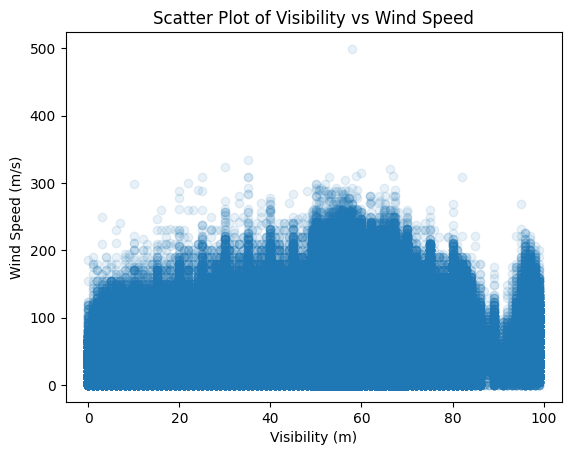

In [75]:
plt.scatter(df['Visibility (m)'], df['Wind Speed (m/s)'], alpha=0.1)
plt.title('Scatter Plot of Visibility vs Wind Speed')
plt.xlabel('Visibility (m)')
plt.ylabel('Wind Speed (m/s)')

The case here is the same as in the previous column. We can see that visibility does impact the wind speed, but it only affects the upper limit of the range. A large percent of the wind speed values can be seen across the whole visibility range. Therefore, it would be difficult to clean this column based on the visibility.

In [76]:
mean_wind_speed = filtered_df.groupby('Station ID')['Wind Speed (m/s)'].mean()
mean_wind_speed

Station ID
356    40.629386
375    37.839396
380    42.560599
Name: Wind Speed (m/s), dtype: float64

We can see that the mean of the wind speed is different for the different stations too. The values are almost identical to the ones of the hourly average wind speed.

In [77]:
df.groupby('Hour')['Wind Speed (m/s)'].mean()

Hour
1     45.309248
2     45.284382
3     45.371629
4     45.430175
5     45.801738
6     46.906838
7     48.766146
8     50.835973
9     53.115898
10    55.323922
11    57.046910
12    58.129066
13    58.498637
14    58.139367
15    56.918356
16    54.936937
17    52.523926
18    50.032516
19    47.831303
20    46.495666
21    45.961311
22    45.710299
23    45.551326
24    45.480821
Name: Wind Speed (m/s), dtype: float64

We can also see that the hour of the day has an impact on the mean of the wind speed as well.

In [78]:
df.groupby('Fog Indicator')['Wind Speed (m/s)'].mean()

Fog Indicator
0.0    51.004511
1.0    21.393952
Name: Wind Speed (m/s), dtype: float64

Whether fog is present or not has a BIG impact on the wind speed too.

In [79]:
df.groupby('Rainfall Indicator')['Wind Speed (m/s)'].mean()

Rainfall Indicator
0.0    49.265758
1.0    57.423087
Name: Wind Speed (m/s), dtype: float64

In [80]:
df.groupby('Snow Indicator')['Wind Speed (m/s)'].mean()

Snow Indicator
0.0    50.194617
1.0    53.871506
Name: Wind Speed (m/s), dtype: float64

In [81]:
df.groupby('Thunderstorm Indicator')['Wind Speed (m/s)'].mean()

Thunderstorm Indicator
0.0    50.250740
1.0    45.842425
Name: Wind Speed (m/s), dtype: float64

The rainfall, snow and thunderstorm indicators have a much smaller impact on the wind speed - same as in the previous column.

In [82]:
df.groupby('Ice Formation Indicator')['Wind Speed (m/s)'].mean()

Ice Formation Indicator
0.0    50.331619
1.0    32.644539
Name: Wind Speed (m/s), dtype: float64

Again, the ice formation indicator plays a big role in whether the wind speed will be high or not.

In [83]:
df.groupby('Month')['Wind Speed (m/s)'].mean()

Month
1     59.081988
2     56.489065
3     53.900145
4     48.776957
5     47.251131
6     44.870230
7     44.437678
8     43.107276
9     44.624267
10    49.962443
11    53.262695
12    57.003403
Name: Wind Speed (m/s), dtype: float64

The mean of the wind speed is different for the different months - the same as the previous column. In general, all the values for this column are very close to the values of the previous one. Instead of the ice formation indicator, we can use the month, since whether there are conditions for ice or not depends a lot on the month.

Based on everything above, we can clean the wind speed column in the same way we cleaned the hourly average wind speed column.

In [84]:
# Group by 'Month', 'Hour', and 'Hourly Average Wind Speed (m/s)' and calculate mean wind speed for each group
grouped_means_2 = df.groupby(['Month', 'Hour', 'Fog Indicator'])['Wind Speed (m/s)'].mean().reset_index()

# Merge the calculated means back to the original dataframe
df_filled_2 = pd.merge(df, grouped_means_2, on=['Month', 'Hour', 'Fog Indicator'], suffixes=('', '_mean'))

# Fill missing values in 'Hourly Average Wind Speed (m/s)' column with corresponding group means
df_filled_2['Wind Speed (m/s)'] = df_filled_2['Wind Speed (m/s)'].fillna(df_filled_2['Wind Speed (m/s)_mean'])

# Replacing the column in the initial dataset
df['Wind Speed (m/s)'] = df_filled_2['Wind Speed (m/s)']

In [85]:
df.isna().sum()

Date (YYYY-MM-DD)                          0
Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)            0
Wind Speed (m/s)                           0
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                        0
Duration of Precipitation (hours)          0
Precipitation Amount (mm)                  0
Visibility (m)                             0
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    0
Month                                      0
Season                                     0
DOP Sector                                 0
dtype: int64

Wind Speed has been successfully cleaned too. Continuing with the Highest Wind Gust (m/s) column:

Text(0, 0.5, 'Highest Wind Gust (m/s)')

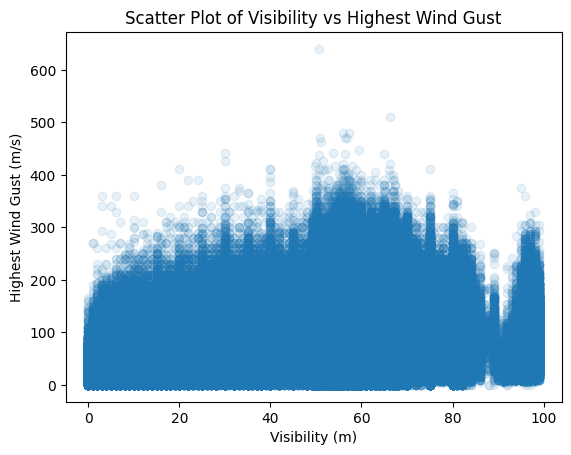

In [86]:
plt.scatter(df['Visibility (m)'], df['Highest Wind Gust (m/s) '], alpha=0.1)
plt.title('Scatter Plot of Visibility vs Highest Wind Gust')
plt.xlabel('Visibility (m)')
plt.ylabel('Highest Wind Gust (m/s)')

The case here is the same as in the previous 2 columns. We can see that visibility does impact the highest wind gust, but it only affects the upper limit of the range. A large percent of the wind gust values can be seen across the whole visibility range. Therefore, it would be difficult to clean this column based on the visibility.

In [87]:
mean_highest_wind_gust = filtered_df.groupby('Station ID')['Highest Wind Gust (m/s) '].mean()
mean_highest_wind_gust

Station ID
356    67.627561
375    63.091482
380    67.996906
Name: Highest Wind Gust (m/s) , dtype: float64

We can see that the mean of the highest wind gust is different for the different stations too. The values of station 356 and 380 are very close. Overall, all 3 values are close to one another, so, again, stations don't make a big difference.

In [88]:
df.groupby('Hour')['Highest Wind Gust (m/s) '].mean()

Hour
1     69.460580
2     69.278770
3     69.238975
4     69.294288
5     69.775937
6     71.379557
7     74.059210
8     77.143101
9     80.730227
10    84.452391
11    87.666856
12    89.938088
13    91.087814
14    91.064750
15    89.768402
16    87.127547
17    83.574313
18    79.737866
19    76.042573
20    73.084325
21    71.371143
22    70.637979
23    70.182511
24    69.752500
Name: Highest Wind Gust (m/s) , dtype: float64

We can also see that the hour of the day has an impact on the mean of the highest wind gust as well.

In [89]:
df.groupby('Fog Indicator')['Highest Wind Gust (m/s) '].mean()

Fog Indicator
0.0    78.717499
1.0    34.812650
Name: Highest Wind Gust (m/s) , dtype: float64

Whether fog is present or not has a BIG impact on the highest wind gust too.

In [90]:
df.groupby('Rainfall Indicator')['Highest Wind Gust (m/s) '].mean()

Rainfall Indicator
0.0    75.618395
1.0    95.491526
Name: Highest Wind Gust (m/s) , dtype: float64

In [91]:
df.groupby('Snow Indicator')['Highest Wind Gust (m/s) '].mean()

Snow Indicator
0.0    77.660215
1.0    89.016991
Name: Highest Wind Gust (m/s) , dtype: float64

In [92]:
df.groupby('Thunderstorm Indicator')['Highest Wind Gust (m/s) '].mean()

Thunderstorm Indicator
0.0    77.677532
1.0    94.859551
Name: Highest Wind Gust (m/s) , dtype: float64

The rainfall, snow and thunderstorm indicators have a much smaller impact on the highest wind gust - same as in the previous columns.

In [93]:
df.groupby('Ice Formation Indicator')['Highest Wind Gust (m/s) '].mean()

Ice Formation Indicator
0.0    77.928199
1.0    48.234526
Name: Highest Wind Gust (m/s) , dtype: float64

Again, the ice formation indicator plays a big role in whether the highest wind gust will be high or not.

In [94]:
df.groupby('Month')['Highest Wind Gust (m/s) '].mean()

Month
1     90.224629
2     86.688542
3     82.129274
4     75.079590
5     73.721833
6     70.736080
7     69.814693
8     67.620839
9     69.579685
10    78.074843
11    81.940295
12    87.255379
Name: Highest Wind Gust (m/s) , dtype: float64

The mean of the highest wind gust is different for the different months - the same as the previous columns. Instead of the ice formation indicator, we can use the month, since whether there are conditions for ice or not depends a lot on the month.

Based on everything above, we can clean the highest wind gust column in the same way we cleaned the previous two.

In [95]:
# Group by 'Month', 'Hour', and 'Hourly Average Wind Speed (m/s)' and calculate mean wind speed for each group
grouped_means_3 = df.groupby(['Month', 'Hour', 'Fog Indicator'])['Highest Wind Gust (m/s) '].mean().reset_index()

# Merge the calculated means back to the original dataframe
df_filled_3 = pd.merge(df, grouped_means_3, on=['Month', 'Hour', 'Fog Indicator'], suffixes=('', '_mean'))

# Fill missing values in 'Hourly Average Wind Speed (m/s)' column with corresponding group means
df_filled_3['Highest Wind Gust (m/s) '] = df_filled_3['Highest Wind Gust (m/s) '].fillna(df_filled_3['Highest Wind Gust (m/s) _mean'])

# Replacing the column in the initial dataset
df['Highest Wind Gust (m/s) '] = df_filled_3['Highest Wind Gust (m/s) ']

In [96]:
df.isna().sum()

Date (YYYY-MM-DD)                    0
Station ID                           0
Hour                                 0
Hourly Average Wind Speed (m/s)      0
Wind Speed (m/s)                     0
Highest Wind Gust (m/s)              0
Temperature (0.1°C)                  0
Duration of Precipitation (hours)    0
Precipitation Amount (mm)            0
Visibility (m)                       0
Fog Indicator                        0
Rainfall Indicator                   0
Snow Indicator                       0
Thunderstorm Indicator               0
Ice Formation Indicator              0
Month                                0
Season                               0
DOP Sector                           0
dtype: int64

All 3 wind-related columns have been cleaned.

#### Distribution of the data per each year

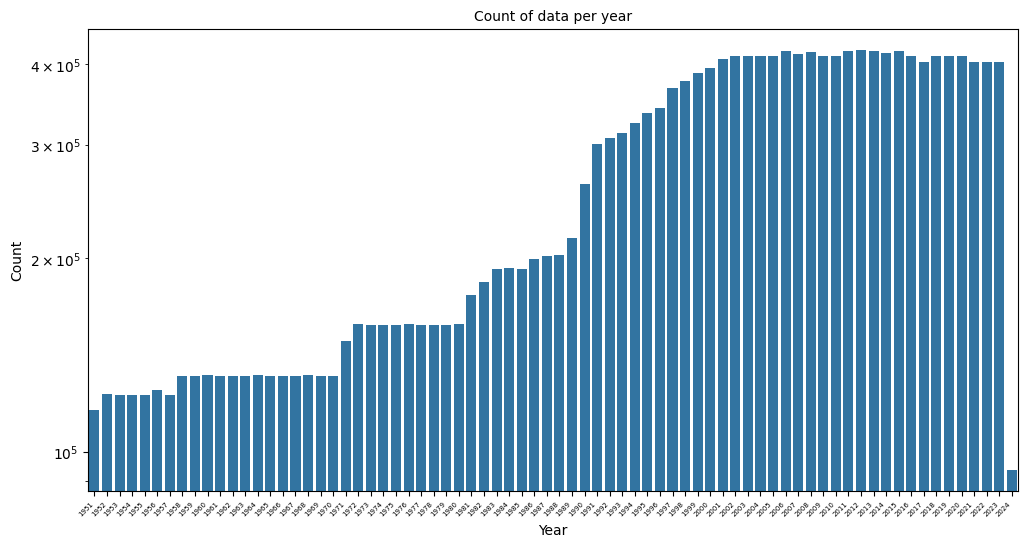

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))
sns.countplot(data=df_sorted, x='Date (YYYY-MM-DD)')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of data per year', fontsize=10)

plt.yscale('log')
plt.xticks(rotation=45, ha='right', fontsize=5) 
plt.show()

This plots represents the number of data for each year from 1951 until 2024. However, still 2024 is not over and this is why we lack of data there. 

In [98]:
df_sorted = df_sorted[df_sorted['Date (YYYY-MM-DD)'] >= 2015]

print(df_sorted)

          Date (YYYY-MM-DD)  Station ID  Hour  \
15693677               2015         391    17   
15693678               2015         391    16   
15693679               2015         391    15   
15693676               2015         391    19   
15693680               2015         391    14   
...                     ...         ...   ...   
19126110               2024         391    11   
19126109               2024         391    10   
19126108               2024         391     8   
19126106               2024         391     7   
19188674               2024         375     5   

          Hourly Average Wind Speed (m/s)  Wind Speed (m/s)  \
15693677                             20.0              20.0   
15693678                             20.0              20.0   
15693679                             30.0              30.0   
15693676                             20.0              20.0   
15693680                             30.0              20.0   
...                              

In [99]:
df_sorted.shape

(3775320, 16)

# Traffic data

## List of abbreviations, related to the traffic jam dataset
Since there are quite a few abbreviations, related to this traffic dataset, we decided to create this list which contains more information about the meaning of each abbreviation. The list is sorted in ascending alphabetical order.

* **DATEX** - Provides a widely accepted European standard for the traffic and travel information sector in order to share data for delivering a comprehensive information service to the users of road infrastructure.
* **NDW** - Nationaal Dataportaal Wegverkeer (in translation: National Road Traffic Data Portal)
* **RWS** - Rijkswaterstaat (in translation: Ministry of Infrastructure and Water Management)
* **VILD** - VerkeersInformatie Locatie Database (in translation: Traffic Information Location Database)

## Importing the data

In [100]:
traffic_jam = pd.read_parquet('datasets/part-00000-tid-5723335361199544621-d336d8d1-1073-410a-866c-3445c2fec160-222-1-c000.snappy.parquet')

traffic_jam.shape

(1581781, 26)

Checking if the table got imported properly.

In [101]:
traffic_jam.sample(3)

NLSitNummer DatumFileBegin DatumFileEind TijdFileBegin TijdFileEind  \
927113      2620474     2019-09-10    2019-09-10      17:57:00     18:02:49   
174121      3274963     2022-11-15    2022-11-15      16:07:28     16:13:01   
1022598     2700016     2019-12-06    2019-12-06      17:58:00     18:04:00   

        FileZwaarte GemLengte FileDuur HectometerKop HectometerStaart  ...  \
927113       14,467  2487,106    5,817          92,3             95,3  ...   
174121       16,127  2906,000    5,550          65,1             62,3  ...   
1022598      18,000  3000,000    6,000           6,1              3,1  ...   

            TrajVan    TrajNaar               OorzaakGronddetail  \
927113    Gorinchem  Ridderkerk  Spitsfile (geen oorzaak gemeld)   
174121   Amersfoort   Apeldoorn  Spitsfile (geen oorzaak gemeld)   
1022598   Hoofddorp   Amsterdam  Spitsfile (geen oorzaak gemeld)   

                                  OorzaakVerloop OorzaakCodeVerloop  \
927113   [Geen oorzaakcode opgegeven door VWM 6]              [000]   
174121   [Geen oorzaakcode opgegeven door VWM 6]              [000]   
1022598  [Geen oorzaakcode opgegeven door VWM 6]              [000]   

        OorzaakCode                        Oorzaak_1            Oorzaak_2  \
927113          001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
174121          001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
1022598         001  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   

        Oorzaak_3         Oorzaak_4  
927113     Drukte  Hoge intensiteit  
174121     Drukte  Hoge intensiteit  
1022598    Drukte  Hoge intensiteit  

[3 rows x 26 columns]

## Data dictionary for traffic data
Since many of the columns are not visible in the printed version above, we have decided to take a look at all the names by printing them in a separate chunk. 

In [102]:
traffic_jam.columns

Index(['NLSitNummer', 'DatumFileBegin', 'DatumFileEind', 'TijdFileBegin',
       'TijdFileEind', 'FileZwaarte', 'GemLengte', 'FileDuur', 'HectometerKop',
       'HectometerStaart', 'RouteLet', 'RouteNum', 'RouteOms',
       'hectometreringsrichting', 'KopWegvakVan', 'KopWegvakNaar', 'TrajVan',
       'TrajNaar', 'OorzaakGronddetail', 'OorzaakVerloop',
       'OorzaakCodeVerloop', 'OorzaakCode', 'Oorzaak_1', 'Oorzaak_2',
       'Oorzaak_3', 'Oorzaak_4'],
      dtype='object')

We deduce that the names are in Dutch and they seem like they are abbreviated, which makes it even more challenging for non-Dutch speaking students to gain a grasp of the meaning of the columns. Therefore, we decided to check if there is any available metadata or explanation about the file.

We first took a random name from the column names such as KopWegvakVan and we pasted it in Google together with the source name Rijkswaterstaat, hoping that we would get some information. Fortunately, after playing around with the links we got, we eventually arrived at this link: https://downloads.rijkswaterstaatdata.nl/filedata/
Then, inside of it, we found two very important files:
* the metadata file: https://downloads.rijkswaterstaatdata.nl/filedata/rws_filedata_metadata.csv
* and the column names explanations: https://downloads.rijkswaterstaatdata.nl/filedata/kolombeschrijving_rws_filedata.txt 

Since we are mostly interested in the column names at the moment, we had a look into the second file and we found the following informationn (which we also structured to make it more readable and extract only the relevant parts):

**Type of data**: Floating Car Data

**Data source**: NDW (Nationaal Dataportaal Wegverkeer, in translation: national road traffic data portal)

**Definition of traffic jam**: Queues of more than *2 kilometers* in length are classified as traffic jams or road sections where *the travel time exceeds a threshold value*.

**Code allocation procedure**: The traffic jam messages are approved in the RWS traffic jam control room and provided with a reason code.

*NB: The descriptions of the column names have been automatically translated with Google Translate and, therefore, might contain inadequate translations.*

Sure, here are all the values in the first column bolded:

<table>
  <tr>
    <th><b>Original Column Name</b></th>
    <th>Translated Description</th>
    <th>Translated Column Name</th>
    <th>Data Type</th>
    <th>Range of Data</th>
    <th>Notes</th>
  </tr>
  <tr>
    <td><b>NLSitNummer</b></td>
    <td>Unique number of the traffic jam situation assigned by RWS</td>
    <td>TrafficJamNum</td>
    <td>object</td>
    <td>Between 1471895 and 3967084</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>DatumFileBegin</b></td>
    <td>Date of the first file message associated with this file</td>
    <td>StartDate</td>
    <td>datetime[ns]</td>
    <td>Between 2015-01-01 and 2024-02-29</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Format: YYYY-MM-DD</p>
    </td>
  </tr>
  <tr>
    <td><b>DatumFileEind</b></td>
    <td>Date of completion of the last file message associated with this file</td>
    <td>EndDate</td>
    <td>datetime[ns]</td>
    <td>Between 2015-01-01 and 2024-02-29</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Format: YYYY-MM-DD</p>
    </td>
  </tr>
  <tr>
    <td><b>TijdFileBegin</b></td>
    <td>Time of the first traffic jam message associated with this file</td>
    <td>StartTime</td>
    <td>object</td>
    <td>Between 0:00:00 and 23:59:59</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Format: HH:MM:SS</p>
    </td>
  </tr>
  <tr>
    <td><b>TijdFileBegin</b></td>
    <td>Time of completion of the last traffic jam message associated with this file</td>
    <td>EndTime</td>
    <td>object</td>
    <td>Between 0:00:00 and 23:59:59</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Format: HH:MM:SS</p>
    </td>
  </tr>
  <tr>
    <td><b>FileZwaarte</b></td>
    <td>Traffic jam severity is the sum of the length * duration of the traffic jam messages (km min)</td>
    <td>Severity</td>
    <td>float64</td>
    <td>Between 0.033 and 10638.83</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>GemLengte</b></td>
    <td>This is the time-weighted average length of the file (meters)</td>
    <td>Length</td>
    <td>float64</td>
    <td>Between 47.0 and 171600.0</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Unit: Meters</p>
    </td>
  </tr>
  <tr>
    <td><b>FileDuur</b></td>
    <td>File duration is the total duration of the file (the difference between start time and end time)</td>
    <td>Duration</td>
    <td>float64</td>
    <td>Between 0.017 and 1740.483</td>
     <td><p>Null values are NOT acceptable.</p>
        <p>Unit: Minutes</p>
    </td>
  </tr>
  <tr>
    <td><b>HectometerKop</b></td>
    <td>The value of the hectometer sign associated with the first traffic jam message at the head of the traffic jam</td>
    <td>HectometerStart</td>
    <td>float64</td>
    <td>Between 0.0 and 312.1</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Unit: Hectometers</p></td>
  </tr>
  <tr>
    <td><b>HectometerStaart</b></td>
    <td>The value of the hectometer sign associated with the last traffic jam message at the tail of the traffic jam</td>
    <td>HectometerEnd</td>
    <td>float64</td>
    <td>Between 0.0 and 312.1</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Unit: Hectometers</p></td>
  </tr>
  <tr>
    <td><b>RouteLet</b></td>
    <td>The letter of the road name</td>
    <td>RoadLetter</td>
    <td>object</td>
    <td>1 character</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Only A or N values are accepted.</p>
        <p>A stands for a motorway <a href="https://www.iamexpat.nl/expat-info/driving-netherlands/dutch-roads-traffic-signs#:~:text=N%2Droads%20(autowegen),are%20national%20or%20provincial%20roads.">(source)</a></p>
        <p>N stands for a non-motorway road <a href="https://www.iamexpat.nl/expat-info/driving-netherlands/dutch-roads-traffic-signs#:~:text=N%2Droads%20(autowegen),are%20national%20or%20provincial%20roads.">(source)</a></p>
    </td>
  </tr>
  <tr>
    <td><b>RouteNum</b></td>
    <td>The numerical value of the road name</td>
    <td>RoadNumber</td>
    <td>int32</td>
    <td>Between 1 and 999</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>RouteOms</b></td>
    <td>The merger of RouteLet and RouteNum</td>
    <td>RoadDescr</td>
    <td>object</td>
    <td>Between 2 and 4

 characters </td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Always a combination of exactly one letter (A or N) and at least 1 number.</p>
    </td>
  </tr>
  <tr>
    <td><b>hectometreringsrichting</b></td>
    <td>Ascending hectometer direction belongs to Re and descending belongs to Li</td>
    <td>HectometerDirection</td>
    <td>object</td>
    <td>8 characters</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Only aflopend and oplopend values are accepted.</p>
        <p>Aflopend = descending</p>
        <p>Oplopend = ascending</p>
    </td>
  </tr>
  <tr>
    <td><b>KopWegvakVan</b></td>
    <td>The VILD road name of the road section of the head location (the point before the end of the traffic jam)</td>
    <td>RoadSectionFrom</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>KopWegvakNaar</b></td>
    <td>The VILD road name of the road section of the head location (the point beyond the end of the traffic jam)</td>
    <td>RoadSectionTo</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>TrajVan</b></td>
    <td>The higher VILD route (such as Amsterdam - Amersfoort) associated with the traffic jam</td>
    <td>MainRoadFrom</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>TrajNaar</b></td>
    <td>The higher VILD route (such as Amsteream - Amersfoort) associated with the traffic jam</td>
    <td>MainRoadTo</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>OorzaakGronddetail</b></td>
    <td>Detail Description of the reason code registered with this file</td>
    <td>CauseCodeDescr</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>OorzaakVerloop</b></td>
    <td>A collection of the various causes that are logged in the underlying file messages</td>
    <td>CauseClass</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>OorzaakCodeVerloop</b></td>
    <td>The coding (DATEX1) of the causes of the file.</td>
    <td>CauseCodeClass</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>OorzaakCode</b></td>
    <td>The coding (DATEX1) of the causes of the file.</td>
    <td>CauseCode</td>
    <td>object</td>
    <td>2 or 3 characters</td>
    <td><p>Null values are NOT acceptable.</p>
        <p>Combinations of letters and numbers are possible.</p></td>
  </tr>
  <tr>
    <td><b>Oorzaak_1</b></td>
    <td>A cause aggregation at 1st level used by RWS</td>
    <td>Cause_1</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>Oorzaak_2</b></td>
    <td>A cause aggregation at 2nd level used by RWS</td>
    <td>Cause_2</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>Oorzaak_3</b></td>
    <td>A cause aggregation at 3rd level used by RWS</td>
    <td>Cause_3</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
  <tr>
    <td><b>Oorzaak_4</b></td>
    <td>A cause aggregation at 4th level used by RWS</td>
    <td>Cause_4</td>
    <td>object</td>
    <td>-</td>
    <td>Null values are NOT acceptable.</td>
  </tr>
</table>

## Renaming columns 

Changing the names of the columns with English names, based on the column names descriptions, identified in the data dictionary.

In [103]:
english_column_names = [
    'TrafficJamNum', 'StartDate', 'EndDate', 'StartTime', 'EndTime', 'Severity', 'Length', 'Duration',
    'HectometerStart', 'HectometerEnd', 'RoadLetter', 'RoadNumber', 'RoadDescr', 'HectometerDirection',
    'RoadSectionFrom', 'RoadSectionTo', 'MainRoadFrom', 'MainRoadTo', 'CauseCodeDescr', 'CauseClass', 
    'CauseCodeClass', 'CauseCode', 'Cause_1', 'Cause_2', 'Cause_3', 'Cause_4'
]

traffic_jam.columns = english_column_names

traffic_jam.sample(3)

TrafficJamNum   StartDate     EndDate StartTime   EndTime Severity  \
497594       3643629  2023-07-11  2023-07-11  17:50:28  18:07:00   53,627   
682553       3344912  2023-01-10  2023-01-10  17:24:32  17:58:00   22,257   
990297       1810883  2015-10-12  2015-10-12   6:26:00   6:32:43   18,483   

          Length Duration HectometerStart HectometerEnd  ... MainRoadFrom  \
497594  3244,000   16,533           186,8         184,5  ...    Eindhoven   
682553   665,000   33,467           162,2         162,2  ...    Gorinchem   
990297  2751,861    6,717            51,7          53,7  ...    Apeldoorn   

        MainRoadTo                   CauseCodeDescr  \
497594  Maastricht  Spitsfile (geen oorzaak gemeld)   
682553    Nijmegen  Spitsfile (geen oorzaak gemeld)   
990297   Amsterdam  Spitsfile (geen oorzaak gemeld)   

                                      CauseClass CauseCodeClass CauseCode  \
497594  [Geen oorzaakcode opgegeven door VWM 17]          [000]       001   
682553  [Geen oorzaakcode opgegeven door VWM 33]          [000]       001   
990297   [Geen oorzaakcode opgegeven door VWM 7]          [000]       001   

                                Cause_1              Cause_2 Cause_3  \
497594  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   
682553  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   
990297  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   

                 Cause_4  
497594  Hoge intensiteit  
682553  Hoge intensiteit  
990297  Hoge intensiteit  

[3 rows x 26 columns]

The names got properly changed. Now, let's perform the data cleaning and data validation.

## Tackling data types

In [104]:
traffic_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581781 entries, 0 to 1581780
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   TrafficJamNum        1581781 non-null  object
 1   StartDate            1581781 non-null  object
 2   EndDate              1581781 non-null  object
 3   StartTime            1581781 non-null  object
 4   EndTime              1581781 non-null  object
 5   Severity             1581781 non-null  object
 6   Length               1581781 non-null  object
 7   Duration             1581781 non-null  object
 8   HectometerStart      1581781 non-null  object
 9   HectometerEnd        1581781 non-null  object
 10  RoadLetter           1581781 non-null  object
 11  RoadNumber           1581781 non-null  object
 12  RoadDescr            1581781 non-null  object
 13  HectometerDirection  1581781 non-null  object
 14  RoadSectionFrom      1581770 non-null  object
 15  RoadSectionTo  

We can see that **all datatypes are "object"**, even though many of them should be numerical. Furthermore, we have just a few nulls and it seems that there could be some **dependency in the way the data is missing** as the same number of missing values is repeated for 4 of the columns and, therefore, that needs to be investigated further. 
In essence, some **data cleaning** needs to be done before proceeding further. 

In [105]:
#Converting the date columns to date datatype
date_columns = ['StartDate', 'EndDate']
traffic_jam[date_columns] = traffic_jam[date_columns].apply(pd.to_datetime)

#Since I couldn't create a proper time format, I created two additional columns with start datetime and end datetime
traffic_jam['StartDateTime'] = pd.to_datetime(traffic_jam['StartDate'].astype(str) + ' ' + traffic_jam['StartTime'].astype(str))
traffic_jam['EndDateTime'] = pd.to_datetime(traffic_jam['EndDate'].astype(str) + ' ' + traffic_jam['EndTime'].astype(str))

# Converting numerical columns to float and changing the coma to a point in order to help python recognize the format
columns_to_convert = ['Severity', 
                      'Length', 
                      'Duration', 
                      'HectometerStart', 
                      'HectometerEnd']
for col in columns_to_convert:
    traffic_jam[col] = traffic_jam[col].str.replace(',', '.').astype(float)
    
#Converting the integer column to integer format
traffic_jam['RoadNumber'] = traffic_jam['RoadNumber'].astype(int)

Let's check whether the float columns got their floating comma replaced by a floating point:

In [106]:
traffic_jam.sample(3)

TrafficJamNum  StartDate    EndDate StartTime   EndTime  Severity  \
20144         3583285 2023-06-10 2023-06-10  12:29:27  12:32:00     5.198   
482948        3635588 2023-07-06 2023-07-06  17:58:29  18:00:05     7.840   
1214790       1800764 2015-09-25 2015-09-25  13:29:00  13:43:46    29.533   

         Length  Duration  HectometerStart  HectometerEnd  ...  \
20144    2039.0     2.550             96.1           98.1  ...   
482948   4900.0     1.600             93.9           89.0  ...   
1214790  2000.0    14.767             32.9           34.9  ...   

                                  CauseCodeDescr  \
20144                   Opgehoogde werkzaamheden   
482948           Spitsfile (geen oorzaak gemeld)   
1214790  File buiten spits (geen oorzaak gemeld)   

                                       CauseClass CauseCodeClass CauseCode  \
20144     [Geen oorzaakcode opgegeven door VWM 3]          [000]       998   
482948    [Geen oorzaakcode opgegeven door VWM 2]          [000]       001   
1214790  [Geen oorzaakcode opgegeven door VWM 15]          [000]       003   

                                         Cause_1  \
20144                   Opgehoogde werkzaamheden   
482948           Spitsfile (geen oorzaak gemeld)   
1214790  File buiten spits (geen oorzaak gemeld)   

                                         Cause_2        Cause_3  \
20144    Werkzaamheden gevonden door WiFi-script  Werkzaamheden   
482948                       Geen oorzaak gemeld         Drukte   
1214790                      Geen oorzaak gemeld         Drukte   

                             Cause_4       StartDateTime         EndDateTime  
20144    Aanleg en gepland onderhoud 2023-06-10 12:29:27 2023-06-10 12:32:00  
482948              Hoge intensiteit 2023-07-06 17:58:29 2023-07-06 18:00:05  
1214790             Hoge intensiteit 2015-09-25 13:29:00 2015-09-25 13:43:46  

[3 rows x 28 columns]

It seems that the code above got successfully implemented. Now, let's check whether the data types are correct now:

In [107]:
traffic_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581781 entries, 0 to 1581780
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   TrafficJamNum        1581781 non-null  object        
 1   StartDate            1581781 non-null  datetime64[ns]
 2   EndDate              1581781 non-null  datetime64[ns]
 3   StartTime            1581781 non-null  object        
 4   EndTime              1581781 non-null  object        
 5   Severity             1581781 non-null  float64       
 6   Length               1581781 non-null  float64       
 7   Duration             1581781 non-null  float64       
 8   HectometerStart      1581781 non-null  float64       
 9   HectometerEnd        1581781 non-null  float64       
 10  RoadLetter           1581781 non-null  object        
 11  RoadNumber           1581781 non-null  int32         
 12  RoadDescr            1581781 non-null  object        
 1

It seems that all of the data types are fixed now.

## Data validation
Most columns have a logical range in which they are supposed to be. In this section we are going to make sure that the columns with available ranges indeed contain values within these ranges.

### Severity and Duration

Checking why some and which values for "Severity" are negative, even though it should logically have positive value based on the way it is calculated. This could be heavily connected to the reason we also have negative lower range for "Duration", which, again, should logically be positive.

In [108]:
traffic_jam[traffic_jam["Severity"] < 0]

TrafficJamNum  StartDate    EndDate StartTime   EndTime  Severity  \
134285       3510932 2023-05-01 2023-05-01  18:39:00  17:40:01   -12.752   
170523       3544389 2023-05-22 2023-05-22  18:47:16  18:20:03  -263.553   
498320       3647798 2023-07-14 2023-07-14  14:11:06  13:57:36   -43.410   

        Length  Duration  HectometerStart  HectometerEnd  ...  \
134285  2300.0   -58.983             19.4           21.7  ...   
170523  7600.0   -27.217             92.4           84.8  ...   
498320  2900.0   -13.500             52.1           55.0  ...   

                                 CauseCodeDescr  \
134285              Ongeval op aansluitende weg   
170523          Spitsfile (geen oorzaak gemeld)   
498320  File buiten spits (geen oorzaak gemeld)   

                                               CauseClass CauseCodeClass  \
134285  [Geen oorzaakcode opgegeven door VWM -74], [On...   [000], [N65]   
170523          [Geen oorzaakcode opgegeven door VWM -27]          [000]   
498320          [Geen oorzaakcode opgegeven door VWM -14]          [000]   

       CauseCode                                  Cause_1  \
134285       N65              Ongeval op aansluitende weg   
170523       001          Spitsfile (geen oorzaak gemeld)   
498320       003  File buiten spits (geen oorzaak gemeld)   

                    Cause_2  Cause_3           Cause_4       StartDateTime  \
134285       Ongeval elders  Ongeval           Ongeval 2023-05-01 18:39:00   
170523  Geen oorzaak gemeld   Drukte  Hoge intensiteit 2023-05-22 18:47:16   
498320  Geen oorzaak gemeld   Drukte  Hoge intensiteit 2023-07-14 14:11:06   

               EndDateTime  
134285 2023-05-01 17:40:01  
170523 2023-05-22 18:20:03  
498320 2023-07-14 13:57:36  

[3 rows x 28 columns]

In [109]:
traffic_jam[traffic_jam["Duration"] < 0]

TrafficJamNum  StartDate    EndDate StartTime   EndTime  Severity  \
134285       3510932 2023-05-01 2023-05-01  18:39:00  17:40:01   -12.752   
170523       3544389 2023-05-22 2023-05-22  18:47:16  18:20:03  -263.553   
498320       3647798 2023-07-14 2023-07-14  14:11:06  13:57:36   -43.410   

        Length  Duration  HectometerStart  HectometerEnd  ...  \
134285  2300.0   -58.983             19.4           21.7  ...   
170523  7600.0   -27.217             92.4           84.8  ...   
498320  2900.0   -13.500             52.1           55.0  ...   

                                 CauseCodeDescr  \
134285              Ongeval op aansluitende weg   
170523          Spitsfile (geen oorzaak gemeld)   
498320  File buiten spits (geen oorzaak gemeld)   

                                               CauseClass CauseCodeClass  \
134285  [Geen oorzaakcode opgegeven door VWM -74], [On...   [000], [N65]   
170523          [Geen oorzaakcode opgegeven door VWM -27]          [000]   
498320          [Geen oorzaakcode opgegeven door VWM -14]          [000]   

       CauseCode                                  Cause_1  \
134285       N65              Ongeval op aansluitende weg   
170523       001          Spitsfile (geen oorzaak gemeld)   
498320       003  File buiten spits (geen oorzaak gemeld)   

                    Cause_2  Cause_3           Cause_4       StartDateTime  \
134285       Ongeval elders  Ongeval           Ongeval 2023-05-01 18:39:00   
170523  Geen oorzaak gemeld   Drukte  Hoge intensiteit 2023-05-22 18:47:16   
498320  Geen oorzaak gemeld   Drukte  Hoge intensiteit 2023-07-14 14:11:06   

               EndDateTime  
134285 2023-05-01 17:40:01  
170523 2023-05-22 18:20:03  
498320 2023-07-14 13:57:36  

[3 rows x 28 columns]

As expected, it seems that the end time of the traffic jam is actually earlier than the start time of the traffic jam, occuring in the same day. This happens for 3 records in the whole dataset. This makes both the columns in question have a negative lower range, which seems to be the case for only these 3 records in both cases. There could be a few reasons for this input:

* The values for "EndTime" and "StartTime" were mistankenly swaped when inputting the data
* The "EndDate" should have been the following day (highly unlikely)
* The values filled in are simply wrong

As we do not know for sure what happened here, we could just remove the 3 rows. 

### Length
Now, let's see what happens for the cases where "Length" = 0, as it seems strange for it to not display even one meter.

In [110]:
traffic_jam[traffic_jam["Length"]== 0]

TrafficJamNum  StartDate    EndDate StartTime   EndTime  Severity  \
21208         3582552 2023-06-09 2023-06-09  17:16:59  17:21:12       0.0   
38368         3615875 2023-06-26 2023-06-26  18:05:31  18:42:14       0.0   
107650        3745944 2023-10-03 2023-10-03  11:57:28  11:57:37       0.0   
170484        3542629 2023-05-21 2023-05-21  19:29:51  19:40:12       0.0   
478109        3958235 2024-02-26 2024-02-26   5:57:23   6:07:12       0.0   
491993        3658077 2023-07-24 2023-07-24   5:21:17   5:25:12       0.0   
633319        3389287 2023-02-09 2023-02-09  19:39:28  19:48:08       0.0   
1342206       1744351 2015-04-27 2015-04-27  16:06:00  16:11:00       0.0   
1356467       2279637 2018-01-20 2018-01-20   0:00:00   1:40:33       0.0   
1367176       2097817 2017-02-01 2017-02-01   7:17:00   7:32:25       0.0   
1387900       2946271 2022-02-28 2022-02-28  11:05:42  11:23:16       0.0   
1387901       2946272 2022-02-28 2022-02-28  11:06:21  11:23:11       0.0   
1570874       2928246 2022-01-28 2022-01-28   7:06:39   7:24:04       0.0   

         Length  Duration  HectometerStart  HectometerEnd  ...  \
21208       0.0     4.217            169.2          169.2  ...   
38368       0.0    36.717            142.6          142.6  ...   
107650      0.0     0.150             16.0           16.0  ...   
170484      0.0    10.350            158.6          158.6  ...   
478109      0.0     9.817             50.7           50.7  ...   
491993      0.0     3.917              8.5            8.5  ...   
633319      0.0     8.667            132.7          132.7  ...   
1342206     0.0     5.000             22.9           22.9  ...   
1356467     0.0   100.550              3.7            3.7  ...   
1367176     0.0    15.417              5.8            5.8  ...   
1387900     0.0    17.567             48.6           48.6  ...   
1387901     0.0    16.833             48.6           48.6  ...   
1570874     0.0    17.417             57.2           57.2  ...   

                                  CauseCodeDescr  \
21208                 Ongeval met vrachtwagen(s)   
38368                               Ongeval(len)   
107650                          Defecte bus(sen)   
170484                       Veiligheidsincident   
478109           Spitsfile (geen oorzaak gemeld)   
491993               Ongeval op aansluitende weg   
633319                              Ongeval(len)   
1342206                                  Ongeval   
1356467  File buiten spits (geen oorzaak gemeld)   
1367176                             Ongeval(len)   
1387900                             Ongeval(len)   
1387901                             Ongeval(len)   
1570874               Ongeval met vrachtwagen(s)   

                                        CauseClass CauseCodeClass CauseCode  \
21208               [Ongeval met vrachtwagen(s) 4]          [ACH]       ACH   
38368                            [Ongeval(len) 37]          [ACI]       ACI   
107650                        [Defecte bus(sen) 0]          [BDB]       BDB   
170484                    [Veiligheidsincident 10]          [ESI]       ESI   
478109    [Geen oorzaakcode opgegeven door VWM 10]          [000]       001   
491993             [Ongeval op aansluitende weg 4]          [N65]       N65   
633319                            [Ongeval(len) 9]          [ACI]       ACI   
1342206                   geen verloop beschikbaar          [ACI]       ACI   
1356467  [Geen oorzaakcode opgegeven door VWM 101]          [000]       003   
1367176                          [Ongeval(len) 15]          [ACI]       ACI   
1387900                          [Ongeval(len) 18]          [ACI]       ACI   
1387901                          [Ongeval(len) 17]          [ACI]       ACI   
1570874            [Ongeval met vrachtwagen(s) 17]          [ACH]       ACH   

                                         Cause_1               Cause_2  \
21208                 Ongeval met vrachtwagen(s)   Ongeval vrachtwagen   
38368               

We only see 13 rows where this happens, and it seems that the length is consistent with the hectometer start and end: as the length is 0, the other 2 values are equal to each other, so it all makes sense. To understand further why this happens, we looked at the causes, to see if they give any insights into the reason for these values. Once translated, most of these rows seem to have an accident as a cause for the traffic jam. Therefore, the accident might have blocked the road, leading to the need for passing cars to go on a side road/ make only one band instead of 2, which could have caused the delays. This explains also why the value for the length might have been stored as 0 in the dataframe: there is one car that blocked the road, which is where the traffic is being crowded only. 

However, these accidents are only exceptional causes, and we can not rely on them for a reliable prediction. Therefore, we could remove the rows and proceed like this further with the cleaning.

### HectometerStart and HectometerEnd
Next, we could have a look at the values below 0 in the case of "HectometerStart" and "HectometerEnd".

In [111]:
var = traffic_jam[traffic_jam["HectometerEnd"]<0]
var[["RoadDescr", "HectometerEnd", "HectometerStart"]]

RoadDescr  HectometerEnd  HectometerStart
171802        N59           -5.0              7.7
180915        N59           -5.1              7.3
184146        N59           -4.7              7.8
184353        N59           -5.0              7.8
185452        N59           -3.6              6.5
...           ...            ...              ...
1458659       A44           -0.1              7.7
1458883       A44           -0.1              5.6
1510799        A2          -12.8             35.2
1570937       A44           -0.1             21.5
1571675       A35           -0.1             48.3

[130 rows x 3 columns]

In [112]:
var = traffic_jam[traffic_jam["HectometerStart"]<0]
var[["RoadDescr", "HectometerEnd", "HectometerStart"]]

RoadDescr  HectometerEnd  HectometerStart
172065        N59            5.3             -3.2
179209        A76            4.3             -2.2
179410        N59            5.5             -3.0
179529        N59            5.7             -3.7
180965        N59            8.3             -5.1
...           ...            ...              ...
1388486       A76            6.6             -3.6
1389107       A76            5.5             -3.5
1389108       A76            6.0             -4.0
1390669       A76            6.5             -3.6
1392234       A76            6.4             -3.6

[100 rows x 3 columns]

We can see, in both cases, that there are all kinds of roads with negative values for either"HectometerEnd", "HectometerStart". To see if these values could be even possible, we checked on the Hectometer Marker Database (https://www.hmpaal.nl/). As expected, negative values are non-existent. However, a good guess of ours was that the person who filled in the data added a minus sign by mistake in front of the real value, so to validate this hyphotesis, we checked the values on the same website mentioned before, to see if they match with the road and the street name. Sadly, our hypothesis was rejected, as they did not match, so we can not proceed further with these rows, as we do not know what their real values were and it could provide erroneous information.

Therefore, we will drop all the inconsistent and invalid rows mentioned before.

### Dropping inconsistent and invalid data

In [113]:
condition_1 = traffic_jam[traffic_jam["Duration"] < 0].index #By dropping the inconsistent duration we also drop the inconsistent severity
condition_2 = traffic_jam[traffic_jam["HectometerStart"] < 0].index
condition_3 = traffic_jam[traffic_jam["HectometerEnd"] < 0].index
condition_4 = traffic_jam[traffic_jam["Length"] == 0].index

traffic_jam = traffic_jam.drop(condition_1)
traffic_jam = traffic_jam.drop(condition_2)
traffic_jam = traffic_jam.drop(condition_3)
traffic_jam = traffic_jam.drop(condition_4)

traffic_jam.shape

(1581535, 28)

It seems that the number of rows droped by only 246, meaning that the number is quite insignificant compared to the overall dataset. More specifically, we only drop about 0.02% of the total number of rows, leaving us with 99.98% of the original traffic data. This is insignificant, so it will not affect our model.

## Missing values handling
Now, all of the columns are in the correct data type and the invalid rows of data have been removed. Let's check if we have any connection between the missing information. First, we are going to extract
 the column names of columns with NAs.

In [114]:
traffic_jam.isna().sum()

TrafficJamNum            0
StartDate                0
EndDate                  0
StartTime                0
EndTime                  0
Severity                 0
Length                   0
Duration                 0
HectometerStart          0
HectometerEnd            0
RoadLetter               0
RoadNumber               0
RoadDescr                0
HectometerDirection      0
RoadSectionFrom         11
RoadSectionTo            0
MainRoadFrom             0
MainRoadTo               0
CauseCodeDescr         109
CauseClass             109
CauseCodeClass         109
CauseCode              109
Cause_1                  0
Cause_2                  0
Cause_3                  0
Cause_4                 13
StartDateTime            0
EndDateTime              0
dtype: int64

In [115]:
columns_with_missing_data = traffic_jam.columns[traffic_jam.isnull().any()].tolist()
columns_with_missing_data

['RoadSectionFrom',
 'CauseCodeDescr',
 'CauseClass',
 'CauseCodeClass',
 'CauseCode',
 'Cause_4']

Then, we are only getting the columns the rows with missing data.

In [116]:
missing_data = traffic_jam[traffic_jam[columns_with_missing_data].isna().any(axis=1)][columns_with_missing_data]
missing_data

RoadSectionFrom                                     CauseCodeDescr  \
304110         Emmen-Oost                Let op:  langza(a)m(e) voertuig(en)   
816546               None                                       Ongeval(len)   
914353               None                                       Ongeval(len)   
959778    Heerenveen-West                Let op:  langza(a)m(e) voertuig(en)   
987906           Randwyck                                               None   
...                   ...                                                ...   
1536767    Beverwijk-Oost                                               None   
1540901    Amc Ziekenhuis  Dit bericht is voor testdoeleinden. Gelieve he...   
1547650              None            File buiten spits (geen oorzaak gemeld)   
1568355       Kerensheide         Spitsstrook aan de rechterzijde in gebruik   
1581752  Havens 8220-8325                Speciale parkeerverboden van kracht   

                                                CauseClass  \
304110   [Geen oorzaakcode opgegeven door VWM 16], [Let...   
816546       [Ongeval(len) 28], [Eerder(e) ongeval(len) 6]   
914353   [Geen oorzaakcode opgegeven door VWM 0], [Onge...   
959778   [Geen oorzaakcode opgegeven door VWM 15], [Let...   
987906                                                None   
...                                                    ...   
1536767                                               None   
1540901  [Dit bericht is voor testdoeleinden. Gelieve h...   
1547650           [Geen oorzaakcode opgegeven door VWM 54]   
1568355  [Geen oorzaakcode opgegeven door VWM 1], [Spit...   
1581752  [Geen oorzaakcode opgegeven door VWM 3], [Spec...   

              CauseCodeClass CauseCode           Cause_4  
304110          [000], [VSM]       VSM              None  
816546          [ACI], [ACA]       ACI           Ongeval  
914353   [000], [ACI], [ACA]       ACI           Ongeval  
959778          [000], [VSM]       VSM              None  
987906                  None      None  Hoge intensiteit  
...                      ...       ...               ...  
1536767                 None      None  Hoge intensiteit  
1540901                [TMO]       TMO              None  
1547650                [000]       003  Hoge intensiteit  
1568355         [000], [N48]       N48              None  
1581752         [000], [PSR]       PSR              None  

[133 rows x 6 columns]

Apparently, in Python, apart from NaN, **None** is also identified as a missing value. Based on the definition of w3schools, "The None keyword is used to define a null value, or no value at all. None is not the same as 0, False, or an empty string". I tried to also check what is the difference between NaN and None and according to Medium (https://medium.com/data-and-beyond/none-nan-null-and-zero-in-python-ac326cfb73a2):

* **None**: Represents **the absence of a value or a null value** in Python. It signifies that a variable or object doesn’t refer to any specific data. It’s essentially **a placeholder for the absence of a meaningful value**.

* **NaN (Not a Number)**: Stands for undefined or nonsensical numerical values in Python, particularly in the context of numerical computations. It’s a marker used in numeric operations to **represent invalid or undefined results**.

That means that in our case, simply no data was recorded at all and we got a **placeholder for the absence of a meaningful value**. 

Now, let's try to ivestigate whether there is any dependency in the way the data is missing by checking all the combinations of missing values that exist:

In [117]:
missing_data_counts = missing_data.isna().apply(tuple, axis=1).value_counts().reset_index()
missing_data_counts.columns = ['Columns With Missing Data', 'Missing Data Count']
missing_data_counts['Columns With Missing Data'] = missing_data_counts['Columns With Missing Data'].astype(str)
missing_data_counts['Columns With Missing Data'] = missing_data_counts['Columns With Missing Data'].apply(lambda x: str(x).strip('()'))
split_data = missing_data_counts['Columns With Missing Data'].str.split(', ', expand=True)
split_data.columns = columns_with_missing_data
split_data = split_data.astype(str)
split_data.replace({'True': 'missing', 'False': 'full'}, inplace=True)
missing_data_df = pd.concat([split_data, missing_data_counts['Missing Data Count']], axis=1)

missing_data_df


RoadSectionFrom CauseCodeDescr CauseClass CauseCodeClass CauseCode  Cause_4  \
0            full        missing    missing        missing   missing     full   
1            full           full       full           full      full  missing   
2         missing           full       full           full      full     full   

   Missing Data Count  
0                 109  
1                  13  
2                  11

We can deduce that:
* The *RoadSectionFrom* column is always **missing independently from other columns** and there are 11 such instances
* The *Cause_4* column is always **missing independently from other columns** and there are 13 such instances
* The *CauseCodeDescr*, *CauseClass*, *CauseCodeClass* and *CauseCode* columns are **always missing in a combination** in 119 instances, which might indicate that they have some **dependency** in the way they are missing.

### RoadSectionFrom
So, first we are going to observe the missing values in the RoadSectionFrom column as they seem the least connected to any other kind of values. Therefore, we will inspect them individually from the other columns with missing values. 

In [118]:
missing_start_from = traffic_jam.loc[traffic_jam["RoadSectionFrom"].isna(), ["RoadSectionFrom", "RoadSectionTo", "MainRoadFrom", "MainRoadTo", "RoadDescr", "HectometerDirection", "HectometerStart", "HectometerEnd"]]
missing_start_from

RoadSectionFrom RoadSectionTo MainRoadFrom MainRoadTo RoadDescr  \
816546             None  Ekkersweijer    Eindhoven        Oss       A50   
914353             None  Ekkersweijer    Eindhoven        Oss       A50   
1108150            None  Ekkersweijer    Eindhoven        Oss       A50   
1177739            None  Ekkersweijer    Eindhoven        Oss       A50   
1263702            None  Ekkersweijer    Eindhoven        Oss       A50   
1286921            None  Ekkersweijer    Eindhoven        Oss       A50   
1340867            None  Ekkersweijer    Eindhoven        Oss       A50   
1347628            None  Ekkersweijer    Eindhoven        Oss       A50   
1375527            None  Ekkersweijer    Eindhoven        Oss       A50   
1454483            None  Ekkersweijer    Eindhoven        Oss       A50   
1547650            None    Rijkevoort     Nijmegen   Duisburg       A77   

        HectometerDirection  HectometerStart  HectometerEnd  
816546             oplopend             95.4           93.4  
914353             oplopend             95.5           93.5  
1108150            oplopend             95.5           93.5  
1177739            oplopend             95.5           93.5  
1263702            oplopend             95.4           93.4  
1286921            oplopend             95.4           93.4  
1340867            oplopend             95.3           93.3  
1347628            oplopend             95.5           93.5  
1375527            oplopend             95.5           93.5  
1454483            oplopend             95.5           93.5  
1547650            oplopend              2.1            0.1

We can observe that most missing values in "HectometerStart" reffer to the same route, with the same start city (Eindhoven) and destination city (Oss). Moreover, we see more or less the same "HectometerStart" and "HectometerEnd" for this road, meaning that we are looking at the same sector of a road. To fill in the NAs, we could try searching for records with the same values in these column, to see if they all have a known "HectometerStart" and if they are the same we can fill the correct value in.

In [119]:
specific_values = {
    "RoadSectionTo": "Ekkersweijer",
    "MainRoadFrom": "Eindhoven",
    "MainRoadTo": "Oss",
    "RoadDescr": "A50",
    "HectometerDirection": "oplopend"
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    (traffic_jam["RoadSectionTo"] == specific_values["RoadSectionTo"]) &
    (traffic_jam["MainRoadFrom"] == specific_values["MainRoadFrom"]) &
    (traffic_jam["MainRoadTo"] == specific_values["MainRoadTo"]) &
    (traffic_jam["RoadDescr"] == specific_values["RoadDescr"]) &
    (traffic_jam["HectometerDirection"] == specific_values["HectometerDirection"]),
    ["RoadSectionFrom", "RoadSectionTo", "MainRoadFrom", "MainRoadTo", "RoadDescr", "HectometerDirection", "HectometerStart", "HectometerEnd"]
]

traffic_jam_filtered_specific

RoadSectionFrom RoadSectionTo MainRoadFrom MainRoadTo RoadDescr  \
49950      Ekkersweijer  Ekkersweijer    Eindhoven        Oss       A50   
126594     Ekkersweijer  Ekkersweijer    Eindhoven        Oss       A50   
246766     Ekkersweijer  Ekkersweijer    Eindhoven        Oss       A50   
251414     Ekkersweijer  Ekkersweijer    Eindhoven        Oss       A50   
349008     Ekkersweijer  Ekkersweijer    Eindhoven        Oss       A50   
670059     Ekkersweijer  Ekkersweijer    Eindhoven        Oss       A50   
675948     Ekkersweijer  Ekkersweijer    Eindhoven        Oss       A50   
684490     Ekkersweijer  Ekkersweijer    Eindhoven        Oss       A50   
816546             None  Ekkersweijer    Eindhoven        Oss       A50   
856517     Ekkersweijer  Ekkersweijer    Eindhoven        Oss       A50   
914353             None  Ekkersweijer    Eindhoven        Oss       A50   
1108150            None  Ekkersweijer    Eindhoven        Oss       A50   
1177739            None  Ekkersweijer    Eindhoven        Oss       A50   
1263702            None  Ekkersweijer    Eindhoven        Oss       A50   
1286921            None  Ekkersweijer    Eindhoven        Oss       A50   
1340867            None  Ekkersweijer    Eindhoven        Oss       A50   
1347628            None  Ekkersweijer    Eindhoven        Oss       A50   
1375527            None  Ekkersweijer    Eindhoven        Oss       A50   
1454483            None  Ekkersweijer    Eindhoven        Oss       A50   

        HectometerDirection  HectometerStart  HectometerEnd  
49950              oplopend             94.7           93.4  
126594             oplopend             95.4           93.4  
246766             oplopend             95.4           93.4  
251414             oplopend             95.5           93.5  
349008             oplopend             95.4           93.4  
670059             oplopend             95.5           93.4  
675948             oplopend             95.5           93.4  
684490             oplopend             95.3           93.4  
816546             oplopend             95.4           93.4  
856517             oplopend             95.5           93.5  
914353             oplopend             95.5           93.5  
1108150            oplopend             95.5           93.5  
1177739            oplopend             95.5           93.5  
1263702            oplopend             95.4           93.4  
1286921            oplopend             95.4           93.4  
1340867            oplopend             95.3           93.3  
1347628            oplopend             95.5           93.5  
1375527            oplopend             95.5           93.5  
1454483            oplopend             95.5           93.5

In [120]:
specific_hectometer = traffic_jam[(traffic_jam["HectometerStart"] <= missing_start_from["HectometerStart"].max()) & 
                                   (traffic_jam["HectometerEnd"] >= missing_start_from["HectometerEnd"].min()) & 
                                   (traffic_jam["HectometerDirection"] == "oplopend") & 
                                   (traffic_jam["MainRoadFrom"] == "Eindhoven") & 
                                   (traffic_jam["MainRoadTo"] == "Oss")& 
                                   (traffic_jam["RoadSectionTo"] == "Ekkersweijer")]
specific_hectometer["RoadSectionFrom"].unique()

array(['Ekkersweijer', None], dtype=object)

By checking for values in all columns observed before, where we saw a pattern, we can confidently fill in the "None" values with the same value in the "RoadSectionTo" column. But before doing that, we need to further investigate the only record that had different end and start cities.

In [121]:
specific_hectometer = traffic_jam[(traffic_jam["HectometerStart"] <= missing_start_from["HectometerStart"].max()) & 
                                   (traffic_jam["HectometerEnd"] >= missing_start_from["HectometerEnd"].min()) & 
                                   (traffic_jam["HectometerDirection"] == "oplopend") & 
                                   (traffic_jam["MainRoadFrom"] == "Nijmegen") & 
                                   (traffic_jam["MainRoadTo"] == "Duisburg") & 
                                   (traffic_jam["RoadSectionTo"] == "Rijkevoort")]
specific_hectometer["RoadSectionFrom"].unique()

array([None], dtype=object)

In [122]:
specific_values = {
    "RoadSectionTo": "Rijkevoort",
    "MainRoadFrom": "Nijmegen",
    "MainRoadTo": "Duisburg",
    "RoadDescr": "A77",
    "HectometerDirection": "oplopend"
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    (traffic_jam["RoadSectionTo"] == specific_values["RoadSectionTo"]) &
    (traffic_jam["MainRoadFrom"] == specific_values["MainRoadFrom"]) &
    (traffic_jam["MainRoadTo"] == specific_values["MainRoadTo"]) &
    (traffic_jam["RoadDescr"] == specific_values["RoadDescr"]) &
    (traffic_jam["HectometerDirection"] == specific_values["HectometerDirection"]),
    ["RoadSectionFrom", "RoadSectionTo", "MainRoadFrom", "MainRoadTo", "RoadDescr", "HectometerDirection", "HectometerStart", "HectometerEnd"]
]

traffic_jam_filtered_specific

RoadSectionFrom RoadSectionTo MainRoadFrom MainRoadTo RoadDescr  \
1547650            None    Rijkevoort     Nijmegen   Duisburg       A77   

        HectometerDirection  HectometerStart  HectometerEnd  
1547650            oplopend              2.1            0.1

Based on the results, we can deduce that the the Rijkevoort case is unique in the whole dataset and therefore, we cannot find enough information in the dataset. However, we validated what we should input in the place of the missing values by refering to Hectometer marker database: https://www.hmpaal.nl/. Based on the route description and the hectometer marker, we could easily identify on which road section the traffic jam started. 

We can see that, as expected, all values match, hinting that the NAs might have just been **MCAR (Missing Completely at Random)** and it might just be that the creator by accident ommitted these values.

After making the finding that in each and every case the Start "RoadSectionFrom" that was missing was the same as the "RoadSectionTo" values, we decided to fill in the Nones with the values from the known column:

In [123]:
traffic_jam['RoadSectionFrom'].fillna(traffic_jam['RoadSectionTo'], inplace=True)
traffic_jam.isna().sum()

C:\Users\kenar\AppData\Local\Temp\ipykernel_1908\1582339734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traffic_jam['RoadSectionFrom'].fillna(traffic_jam['RoadSectionTo'], inplace=True)


TrafficJamNum            0
StartDate                0
EndDate                  0
StartTime                0
EndTime                  0
Severity                 0
Length                   0
Duration                 0
HectometerStart          0
HectometerEnd            0
RoadLetter               0
RoadNumber               0
RoadDescr                0
HectometerDirection      0
RoadSectionFrom          0
RoadSectionTo            0
MainRoadFrom             0
MainRoadTo               0
CauseCodeDescr         109
CauseClass             109
CauseCodeClass         109
CauseCode              109
Cause_1                  0
Cause_2                  0
Cause_3                  0
Cause_4                 13
StartDateTime            0
EndDateTime              0
dtype: int64

Therefore, we can observe no missing values left in the Start Section From column.

### CauseCodeDescr, CauseClass, CauseCodeClass,	CauseCode	

In [124]:
missing_causes = traffic_jam.loc[traffic_jam["CauseCodeDescr"].isna(), ['CauseCodeDescr', 'CauseClass', 'CauseCodeClass', 'CauseCode', 'Cause_1', 'Cause_2', 'Cause_3', 'Cause_4']]
missing_causes

CauseCodeDescr CauseClass CauseCodeClass CauseCode  \
987906            None       None           None      None   
1036470           None       None           None      None   
1043571           None       None           None      None   
1044332           None       None           None      None   
1075111           None       None           None      None   
...                ...        ...            ...       ...   
1498406           None       None           None      None   
1501206           None       None           None      None   
1501290           None       None           None      None   
1502157           None       None           None      None   
1536767           None       None           None      None   

                                     Cause_1              Cause_2 Cause_3  \
987906   Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1036470  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1043571  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1044332  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1075111  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
...                                      ...                  ...     ...   
1498406  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1501206  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1501290  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1502157  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   
1536767  Geen oorzaakcode opgegeven door VWM  Geen oorzaak gemeld  Drukte   

                  Cause_4  
987906   Hoge intensiteit  
1036470  Hoge intensiteit  
1043571  Hoge intensiteit  
1044332  Hoge intensiteit  
1075111  Hoge intensiteit  
...                   ...  
1498406  Hoge intensiteit  
1501206  Hoge intensiteit  
1501290  Hoge intensiteit  
1502157  Hoge intensiteit  
1536767  Hoge intensiteit  

[109 rows x 8 columns]

At a first glance, we can see that the 4 cause columns contain the same values in the same order for every missing record. However, we have a limited view of that at the moment and we need to validate our assumption, by executing the code below:

In [125]:
combined_columns = missing_causes['Cause_1'].astype(str) + \
                   missing_causes['Cause_2'].astype(str) + missing_causes['Cause_3'].astype(str) + \
                   missing_causes['Cause_4'].astype(str)

combined_columns.unique()

array(['Geen oorzaakcode opgegeven door VWMGeen oorzaak gemeldDrukteHoge intensiteit'],
      dtype=object)

In the code above, we pasted each cause in a string with the other causes to see how many unique combinations of them there are and we can deduce that it's just one, which means that our guess was correct and the same causes are valid for all of the missing rows. Now, we are going to check if for the same combination of causes there are actual values for the missing observations in the original big traffic dataset.

In [126]:
specific_values = {
    "Cause_1": missing_causes['Cause_1'].unique()[0],
    "Cause_2": missing_causes['Cause_2'].unique()[0],
    "Cause_3": missing_causes['Cause_3'].unique()[0],
    "Cause_4": missing_causes['Cause_4'].unique()[0]
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    (traffic_jam["Cause_1"] == specific_values["Cause_1"]) &
    (traffic_jam["Cause_2"] == specific_values["Cause_2"]) &
    (traffic_jam["Cause_3"] == specific_values["Cause_3"]) &
    (traffic_jam["Cause_4"] == specific_values["Cause_4"]),
    ['StartDate', 'EndDate', 'StartTime', 'EndTime', 'CauseCodeDescr', 'CauseClass', 'CauseCodeClass', 'CauseCode', 'Cause_1', 'Cause_2', 'Cause_3', 'Cause_4']
]

traffic_jam_filtered_specific

StartDate    EndDate StartTime   EndTime CauseCodeDescr CauseClass  \
987906  2015-10-13 2015-10-13  20:44:00  22:23:45           None       None   
1036470 2016-05-19 2016-05-19  20:19:00  23:32:04           None       None   
1043571 2016-05-04 2016-05-04  14:33:00  14:44:40           None       None   
1044332 2016-05-02 2016-05-02  14:56:00  15:17:01           None       None   
1075111 2016-04-26 2016-04-26  10:31:00  10:40:06           None       None   
...            ...        ...       ...       ...            ...        ...   
1498406 2015-07-05 2015-07-05  17:13:00  18:45:10           None       None   
1501206 2015-07-04 2015-07-04   9:46:00  13:18:03           None       None   
1501290 2015-07-05 2015-07-05  17:15:00  18:45:17           None       None   
1502157 2015-07-13 2015-07-13  16:55:00  18:44:37           None       None   
1536767 2015-08-03 2015-08-04  21:07:00   4:36:36           None       None   

        CauseCodeClass CauseCode                              Cause_1  \
987906            None      None  Geen oorzaakcode opgegeven door VWM   
1036470           None      None  Geen oorzaakcode opgegeven door VWM   
1043571           None      None  Geen oorzaakcode opgegeven door VWM   
1044332           None      None  Geen oorzaakcode opgegeven door VWM   
1075111           None      None  Geen oorzaakcode opgegeven door VWM   
...                ...       ...                                  ...   
1498406           None      None  Geen oorzaakcode opgegeven door VWM   
1501206           None      None  Geen oorzaakcode opgegeven door VWM   
1501290           None      None  Geen oorzaakcode opgegeven door VWM   
1502157           None      None  Geen oorzaakcode opgegeven door VWM   
1536767           None      None  Geen oorzaakcode opgegeven door VWM   

                     Cause_2 Cause_3           Cause_4  
987906   Geen oorzaak gemeld  Drukte  Hoge intensiteit  
1036470  Geen oorzaak gemeld  Drukte  Hoge intensiteit  
1043571  Geen oorzaak gemeld  Drukte  Hoge intensiteit  
1044332  Geen oorzaak gemeld  Drukte  Hoge intensiteit  
1075111  Geen oorzaak gemeld  Drukte  Hoge intensiteit  
...                      ...     ...               ...  
1498406  Geen oorzaak gemeld  Drukte  Hoge intensiteit  
1501206  Geen oorzaak gemeld  Drukte  Hoge intensiteit  
1501290  Geen oorzaak gemeld  Drukte  Hoge intensiteit  
1502157  Geen oorzaak gemeld  Drukte  Hoge intensiteit  
1536767  Geen oorzaak gemeld  Drukte  Hoge intensiteit  

[109 rows x 12 columns]

In [127]:
specific_values = {
    "Cause_1": missing_causes['Cause_1'].unique()[0],
    "Cause_2": missing_causes['Cause_2'].unique()[0],
    "Cause_3": missing_causes['Cause_3'].unique()[0],
    "Cause_4": missing_causes['Cause_4'].unique()[0]
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    (traffic_jam["Cause_2"] == specific_values["Cause_2"]) &
    (traffic_jam["Cause_3"] == specific_values["Cause_3"]) &
    (traffic_jam["Cause_4"] == specific_values["Cause_4"]),
    ['StartDate', 'EndDate', 'StartTime', 'EndTime', 'CauseCodeDescr', 'CauseClass', 'CauseCodeClass', 'CauseCode', 'Cause_1', 'Cause_2', 'Cause_3', 'Cause_4']
]

traffic_jam_filtered_specific

StartDate    EndDate StartTime   EndTime  \
0       2023-06-13 2023-06-13  16:54:29  17:00:06   
1       2023-06-13 2023-06-13  16:54:29  17:09:01   
2       2023-06-13 2023-06-13  16:54:29  16:56:05   
3       2023-06-13 2023-06-13  16:54:29  17:06:00   
4       2023-06-13 2023-06-13  16:54:29  17:04:00   
...            ...        ...       ...       ...   
1581733 2020-04-23 2020-04-23  16:57:00  17:02:28   
1581737 2020-04-17 2020-04-17  16:17:00  16:24:27   
1581745 2020-04-16 2020-04-16  16:30:00  16:40:26   
1581747 2020-04-16 2020-04-16  16:44:00  17:12:28   
1581779 2020-04-09 2020-04-09  16:03:00  16:15:27   

                          CauseCodeDescr  \
0        Spitsfile (geen oorzaak gemeld)   
1        Spitsfile (geen oorzaak gemeld)   
2        Spitsfile (geen oorzaak gemeld)   
3        Spitsfile (geen oorzaak gemeld)   
4        Spitsfile (geen oorzaak gemeld)   
...                                  ...   
1581733  Spitsfile (geen oorzaak gemeld)   
1581737  Spitsfile (geen oorzaak gemeld)   
1581745  Spitsfile (geen oorzaak gemeld)   
1581747  Spitsfile (geen oorzaak gemeld)   
1581779  Spitsfile (geen oorzaak gemeld)   

                                       CauseClass CauseCodeClass CauseCode  \
0         [Geen oorzaakcode opgegeven door VWM 6]          [000]       001   
1        [Geen oorzaakcode opgegeven door VWM 15]          [000]       001   
2         [Geen oorzaakcode opgegeven door VWM 2]          [000]       001   
3        [Geen oorzaakcode opgegeven door VWM 12]          [000]       001   
4        [Geen oorzaakcode opgegeven door VWM 10]          [000]       001   
...                                           ...            ...       ...   
1581733   [Geen oorzaakcode opgegeven door VWM 5]          [000]       001   
1581737   [Geen oorzaakcode opgegeven door VWM 7]          [000]       001   
1581745  [Geen oorzaakcode opgegeven door VWM 10]          [000]       001   
1581747  [Geen oorzaakcode opgegeven door VWM 28]          [000]       001   
1581779  [Geen oorzaakcode opgegeven door VWM 12]          [000]       001   

                                 Cause_1              Cause_2 Cause_3  \
0        Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   
1        Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   
2        Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   
3        Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   
4        Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   
...                                  ...                  ...     ...   
1581733  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   
1581737  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   
1581745  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   
1581747  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   
1581779  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld  Drukte   

                  Cause_4  
0        Hoge intensiteit  
1        Hoge intensiteit  
2        Hoge intensiteit  
3        Hoge intensiteit  
4        Hoge intensiteit  
...                   ...  
1581733  Hoge intensiteit  
1581737  Hoge intensiteit  
1581745  Hoge intensiteit  
1581747  Hoge intensiteit  
1581779  Hoge intensiteit  

[1444429 rows x 12 columns]

It seems that the combination of the different causes is unique and valid only for the rows with missing values, which means that we cannot deduce based on the big traffic dataset what the possible missing values could be. One interesting thing that we found is that the combination of Cause_2, Cause_3 and Cause_4 can be found in a lot of other records, but with a different Cause_1, such as Spitsfile (geen oorzaak gemeld) instead of our version with Geen oorzaakcode opgegeven door VWM. Both of them have more or less the same meaning, when translated from Dutch. The major difference is that Spitsfile (geen oorzaak gemeld) means Rush hour traffic jam (no cause) and we thought the missing data could be because the traffic jams happened outside of rush hours in this case, but it turned out that they happened in various hours of the day, including rush hours, which rejected our hypothesis.

Therefore, since these cases with missing values are exceptions with no reason, provided for the absence of values, we could later on drop them.

### Cause_4
Let's try to see which records have NAs and if we can fill them in based on any pattern.

In [128]:
missing_cause4 = traffic_jam[traffic_jam["Cause_4"].isna()]
missing_cause4

TrafficJamNum  StartDate    EndDate StartTime   EndTime  Severity  \
304110        3102292 2022-06-29 2022-06-29  23:17:21  23:45:54    64.657   
959778        2324942 2018-04-14 2018-04-14  13:18:00  14:16:38   117.267   
1033311       2705632 2019-12-13 2019-12-13   9:47:00  11:11:21   175.000   
1108804       2397648 2018-09-07 2018-09-07  10:16:00  10:17:40     5.533   
1115003       2397647 2018-09-07 2018-09-07  10:14:00  10:15:42     5.767   
1262577       2600209 2019-07-15 2019-07-15  14:33:00  15:19:46    93.533   
1318795       1721931 2015-03-07 2015-03-07  18:51:00  18:51:43     1.433   
1518153       2755665 2020-03-24 2020-03-24  11:30:00  15:13:53   447.767   
1518344       2755662 2020-03-24 2020-03-24  10:30:00  15:14:02   568.067   
1518717       2755661 2020-03-24 2020-03-24  10:29:00  15:13:58   569.933   
1540901       2392474 2018-08-29 2018-08-29  13:09:00  13:10:04     3.200   
1568355       2812199 2021-04-20 2021-04-20   7:30:00   7:38:42    17.400   
1581752       2756442 2020-04-05 2020-04-05  15:06:00  16:16:52   330.433   

           Length  Duration  HectometerStart  HectometerEnd  ...  \
304110   2265.000    28.550             39.4           36.7  ...   
959778   2000.000    58.633            140.0          142.0  ...   
1033311  2074.689    84.350             51.9           53.9  ...   
1108804  3320.000     1.667             24.0           11.3  ...   
1115003  3392.157     1.700             12.1           15.1  ...   
1262577  2000.000    46.767             21.0           19.0  ...   
1318795  2000.000     0.717             33.7           31.7  ...   
1518153  2000.000   223.883             12.0           10.0  ...   
1518344  2000.000   284.033            240.0          238.0  ...   
1518717  2000.000   284.967             40.0           38.0  ...   
1540901  3000.000     1.067             12.1           15.1  ...   
1568355  2000.000     8.700            239.1          241.1  ...   
1581752  4662.747    70.867             13.1           18.1  ...   

                                            CauseCodeDescr  \
304110                 Let op:  langza(a)m(e) voertuig(en)   
959778                 Let op:  langza(a)m(e) voertuig(en)   
1033311                Let op:  langza(a)m(e) voertuig(en)   
1108804  Dit bericht is voor testdoeleinden. Gelieve he...   
1115003  Dit bericht is voor testdoeleinden. Gelieve he...   
1262577                        Wegwerkzaamheden be-eindigd   
1318795  Dit bericht is voor testdoeleinden. Gelieve he...   
1518153  Dit bericht is voor testdoeleinden. Gelieve he...   
1518344  Dit bericht is voor testdoeleinden. Gelieve he...   
1518717  Dit bericht is voor testdoeleinden. Gelieve he...   
1540901  Dit bericht is voor testdoeleinden. Gelieve he...   
1568355         Spitsstrook aan de rechterzijde in gebruik   
1581752                Speciale parkeerverboden van kracht   

                                                CauseClass  \
304110   [Geen oorzaakcode opgegeven door VWM 16], [Let...   
959778   [Geen oorzaakcode opgegeven door VWM 15], [Let...   
1033311  [Geen oorzaakcode opgegeven door VWM 3], [Let ...   
1108804  [Dit bericht is voor testdoeleinden. Gelieve h...   
1115003  [Dit bericht is voor testdoeleinden. Gelieve h...   
1262577  [Geen oorzaakcode opgegeven door VWM 26], [Weg...   
1318795  [Dit bericht is voor testdoeleinden. Gelieve h...   
1518153  [Grenscontrole 2], [Dit bericht is voor testdo...   
1518344  [Dit bericht is voor testdoeleinden. Gelieve h...   
1518717  [Dit bericht is voor testdoeleinden. Gelieve h...   
1540901  [Dit bericht is voor testdoeleinden. Gelieve h...   
1568355  [Geen oorzaakcode opgegeven door VWM 1], [Spit...   
1581752  [Geen oorzaakcode opgegeven door VWM 3], [Spec...   

                     CauseCodeClass CauseCode  \
304110                 [000], [VSM]       VSM   
959778                 [000], [VSM]       VSM   
1033311                [000], [VSM]       VSM   
1108804                       [TMO]       

In [129]:
specific_values = {
    "Cause_1": missing_cause4['Cause_1'].unique()[1]
}

traffic_jam_filtered_specific = traffic_jam.loc[ 
    
    (traffic_jam["Cause_1"] == specific_values["Cause_1"]), 
    ['CauseCodeDescr', 'CauseClass', 'CauseCodeClass', 'CauseCode', 'Cause_1', 'Cause_2', 'Cause_3', 'Cause_4']
]

traffic_jam_filtered_specific

CauseCodeDescr  \
1108804  Dit bericht is voor testdoeleinden. Gelieve he...   
1115003  Dit bericht is voor testdoeleinden. Gelieve he...   
1318795  Dit bericht is voor testdoeleinden. Gelieve he...   
1518153  Dit bericht is voor testdoeleinden. Gelieve he...   
1518344  Dit bericht is voor testdoeleinden. Gelieve he...   
1518717  Dit bericht is voor testdoeleinden. Gelieve he...   
1540901  Dit bericht is voor testdoeleinden. Gelieve he...   

                                                CauseClass CauseCodeClass  \
1108804  [Dit bericht is voor testdoeleinden. Gelieve h...          [TMO]   
1115003  [Dit bericht is voor testdoeleinden. Gelieve h...          [TMO]   
1318795  [Dit bericht is voor testdoeleinden. Gelieve h...          [TMO]   
1518153  [Grenscontrole 2], [Dit bericht is voor testdo...   [N39], [TMO]   
1518344  [Dit bericht is voor testdoeleinden. Gelieve h...          [TMO]   
1518717  [Dit bericht is voor testdoeleinden. Gelieve h...          [TMO]   
1540901  [Dit bericht is voor testdoeleinden. Gelieve h...          [TMO]   

        CauseCode                                            Cause_1  Cause_2  \
1108804       TMO  Dit bericht is voor testdoeleinden. Gelieve he...  Melding   
1115003       TMO  Dit bericht is voor testdoeleinden. Gelieve he...  Melding   
1318795       TMO  Dit bericht is voor testdoeleinden. Gelieve he...  Melding   
1518153       TMO  Dit bericht is voor testdoeleinden. Gelieve he...  Melding   
1518344       TMO  Dit bericht is voor testdoeleinden. Gelieve he...  Melding   
1518717       TMO  Dit bericht is voor testdoeleinden. Gelieve he...  Melding   
1540901       TMO  Dit bericht is voor testdoeleinden. Gelieve he...  Melding   

         Cause_3 Cause_4  
1108804  Melding    None  
1115003  Melding    None  
1318795  Melding    None  
1518153  Melding    None  
1518344  Melding    None  
1518717  Melding    None  
1540901  Melding    None

We checked for patterns related to the combinations with the missing "Cause_4", but it seems that the "Cause_1" appears for all of them exclusively and uniquely when the "Cause_4" is missing. Therefore, we are inclined to think that the values in "Cause_4" are **MNAR (Missing Not At Random)**.

In [130]:
traffic_jam[((traffic_jam["Cause_3"] == "Melding")|(traffic_jam["Cause_2"] == "Melding"))&(traffic_jam["Cause_4"].notna())]

Empty DataFrame
Columns: [TrafficJamNum, StartDate, EndDate, StartTime, EndTime, Severity, Length, Duration, HectometerStart, HectometerEnd, RoadLetter, RoadNumber, RoadDescr, HectometerDirection, RoadSectionFrom, RoadSectionTo, MainRoadFrom, MainRoadTo, CauseCodeDescr, CauseClass, CauseCodeClass, CauseCode, Cause_1, Cause_2, Cause_3, Cause_4, StartDateTime, EndDateTime]
Index: []

[0 rows x 28 columns]

We can also see that "Melding" is always the "Cause_3" for the missing "Cause 4" exclusively. Furthermore, "*Dit bericht is voor testdoeleinden*", which is one of the Cause_1 messages means "*This message is for testing purposes*". That indicates one more time that the values in Cause_4 are **MNAR** and are exclusive occurances in the whole dataset. Since we are aiming at creating a model that can identify regular patterns in ordinary life, we have decided to exclude unique unordinary cases like these. 

Therefore, we are going to drop these rows as well.

### Dropping values with NAs (*that could not be filled in.*)

In [131]:
traffic_jam = traffic_jam.dropna()
traffic_jam.isna().sum()

TrafficJamNum          0
StartDate              0
EndDate                0
StartTime              0
EndTime                0
Severity               0
Length                 0
Duration               0
HectometerStart        0
HectometerEnd          0
RoadLetter             0
RoadNumber             0
RoadDescr              0
HectometerDirection    0
RoadSectionFrom        0
RoadSectionTo          0
MainRoadFrom           0
MainRoadTo             0
CauseCodeDescr         0
CauseClass             0
CauseCodeClass         0
CauseCode              0
Cause_1                0
Cause_2                0
Cause_3                0
Cause_4                0
StartDateTime          0
EndDateTime            0
dtype: int64

## Data exploration on Traffic Data
Let's look at the data we are left with:

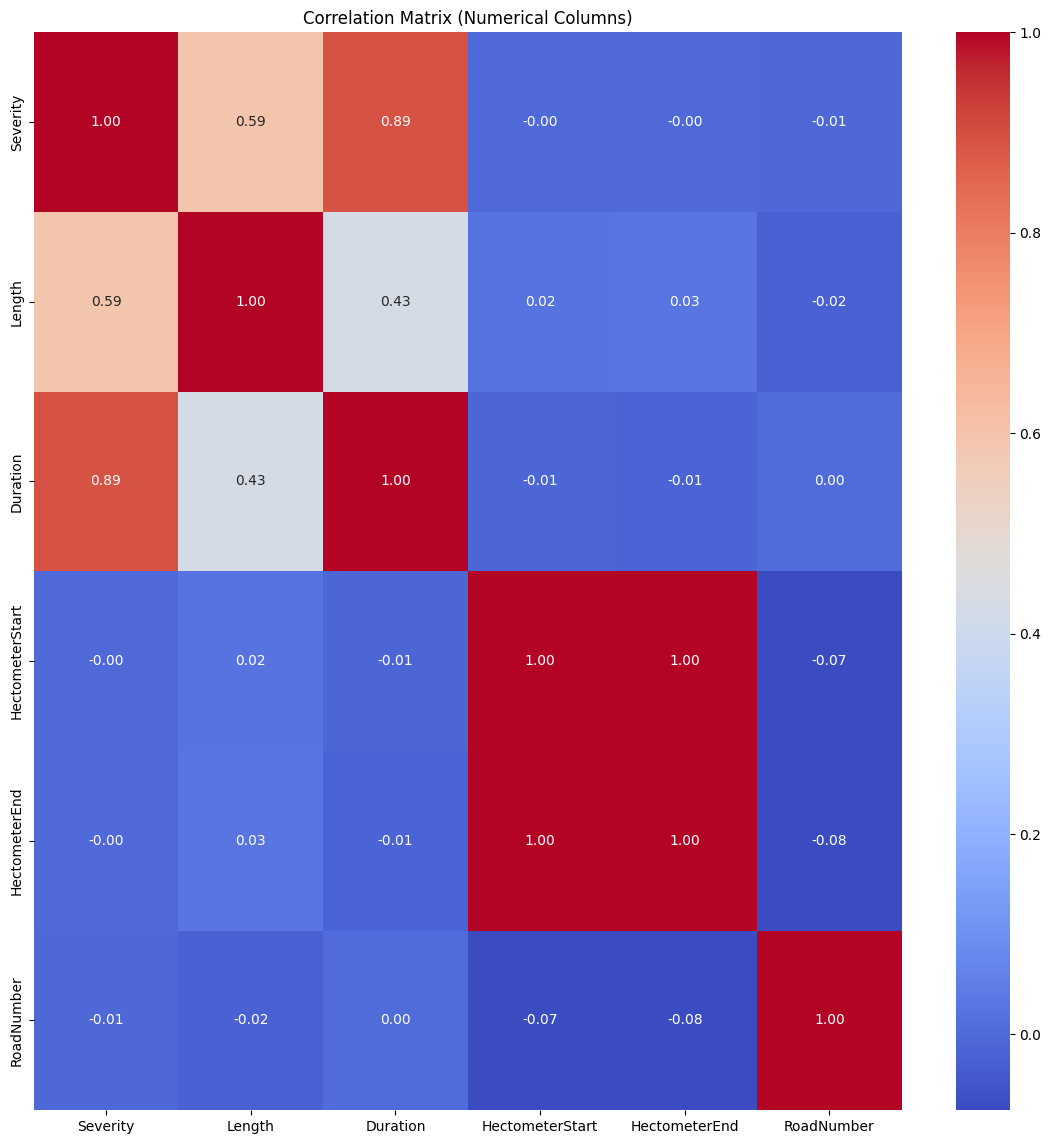

In [132]:
import matplotlib.pyplot as plt
# Selecting only the numerical columns
numerical_columns = traffic_jam.select_dtypes(include=['int64', 'float64', 'int32'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

## Weather stations data

In [133]:
weather_stations = pd.read_csv("datasets/weather_stations.csv")
weather_stations.head()

STN  LON(east)  LAT(north)  ALT(m)           NAME
0  209      4.518      52.465     0.0         IJmond
1  210      4.430      52.171    -0.2  Valkenburg Zh
2  215      4.437      52.141    -1.1    Voorschoten
3  225      4.555      52.463     4.4       IJmuiden
4  235      4.781      52.928     1.2        De Kooy

In [134]:
weather_stations.shape

(50, 5)

In [135]:
weather_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STN         50 non-null     int64  
 1   LON(east)   50 non-null     float64
 2   LAT(north)  50 non-null     float64
 3   ALT(m)      50 non-null     float64
 4   NAME        50 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


We can see that the datatypes seem to correspong to what is expected for each column.

In [136]:
weather_stations.isna().sum()

STN           0
LON(east)     0
LAT(north)    0
ALT(m)        0
NAME          0
dtype: int64

There seem to be no NAs in our data. Next, we should check the ranges and see if they fall in realistic categories.

In [137]:
weather_stations.describe()

STN  LON(east)  LAT(north)     ALT(m)
count   50.000000  50.000000   50.000000   50.00000
mean   295.240000   5.034120   52.155380    8.79000
std     47.221821   0.996242    0.675282   18.89544
min    209.000000   3.242000   50.906000   -4.30000
25%    261.250000   4.320250   51.536750    0.00000
50%    285.500000   4.957500   52.084500    1.30000
75%    328.500000   5.759500   52.641500   11.62500
max    391.000000   7.150000   53.575000  114.30000

At a first glance, the values look normal. The points as latitude and longitude seem to mostly fit in the Netherlands borders. As noted after research, Netherlands coresponds to the coordinates of ~53.51 LAT(north) and ~3.36 LON(east). We can have a look at approximate maximum and minimum:

* MAX LON : ~7.22 LON(east) 
* MAX LAT : ~53.51 LAT(north)
* MIN LON : ~3.36 LON(east)
* MIN LAT : ~50.75 LAT(north)

As specified, these seem to fit quite well in the ranges, with very slight, insignificant differences. We can, however, continue with our analysis. Later on, we will look into altitude as well.

We can have a look at the map, with each station's positioning. This would not only confirm, once again, the accuracy of the positions, but also give us an idea and overview of the exact positioning of each on the map.

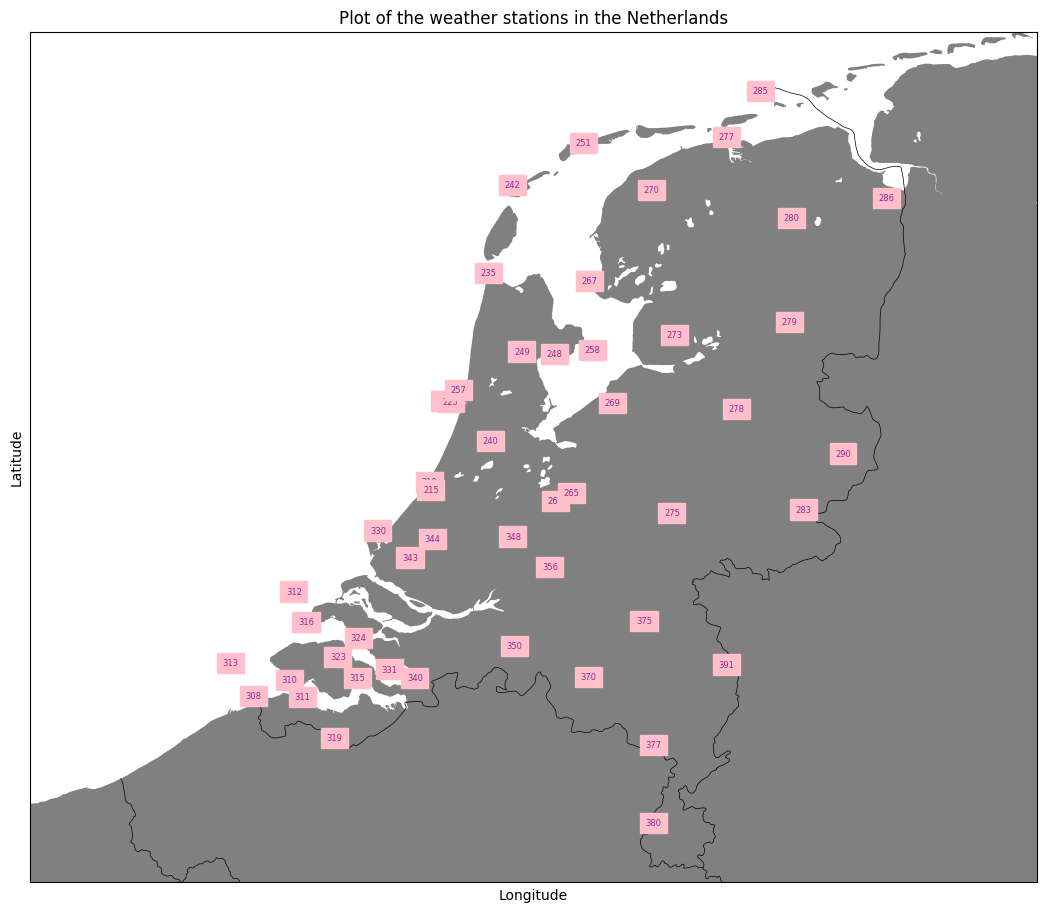

In [138]:
import numpy as np
from matplotlib import pyplot as plt


plt.figure(figsize=(13, 12))

map = Basemap(projection='merc', 
              resolution='f', 
              llcrnrlat=50.7, urcrnrlat=53.8, 
              llcrnrlon=2, urcrnrlon=8, 
              lat_ts=51)
# Plot map
map.drawcountries()
map.fillcontinents(color='grey', zorder=0)

# Plot weather station points with values as labels
x, y = map(weather_stations['LON(east)'], weather_stations['LAT(north)'])
for i in range(len(x)):
    # Adjust label placement and font size, offset labels, and use transparent background
    plt.text(x[i], y[i], f'{weather_stations["STN"][i]}', ha='right', va='bottom', fontsize=6, color='purple', backgroundcolor='pink', alpha=0.8)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of the weather stations in the Netherlands')

plt.show()

We can now check the distribution of the altitudes.

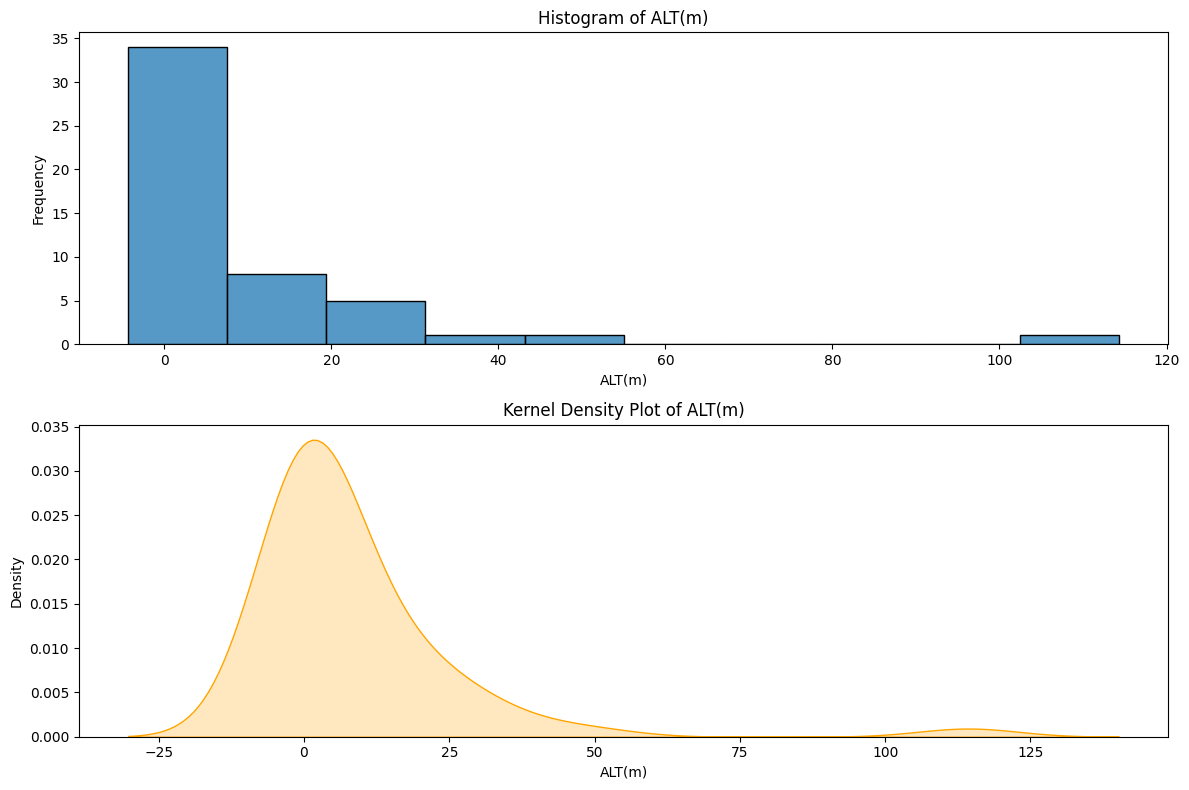

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

altitudes = weather_stations['ALT(m)']

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
sns.histplot(altitudes, ax=axes[0], bins=10, kde=False)  #histogram
axes[0].set_title('Histogram of ALT(m)')
axes[0].set_xlabel('ALT(m)')
axes[0].set_ylabel('Frequency')
sns.kdeplot(altitudes, ax=axes[1], color='orange', fill=True) #kernel density plot
axes[1].set_title('Kernel Density Plot of ALT(m)')
axes[1].set_xlabel('ALT(m)')
axes[1].set_ylabel('Density')
plt.tight_layout()
plt.show()

We can see that most weather stations are at an altitude of around 0 and slightly larger, which is expected from a country that does not have any mountains. There seems to be an outlier station, that is situated at a much higher altitude than the others. Let's see where that actually is and if it makes sense.

In [140]:
weather_stations[weather_stations['ALT(m)'] == max(altitudes)]

STN  LON(east)  LAT(north)  ALT(m)        NAME
48  380      5.762      50.906   114.3  Maastricht

We can see this is situated in Maastricht. When we look it up online, we can see the value is accurate and the station and its coordinates actually exists. Therefore, we can state that it is reliable and consider it correct. Similarly, we can check the lowest altitude we have in our dataset, to see if it is accurate.

![Screenshot 2024-04-09 205409.png](<attachment:Screenshot 2024-04-09 205409.png>)
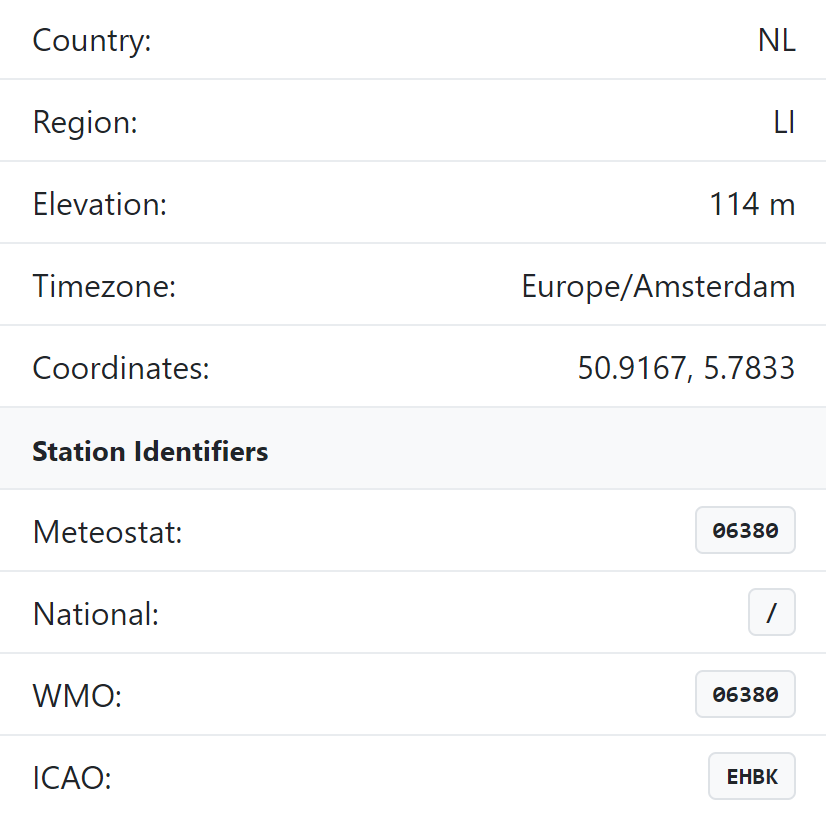

In [141]:
weather_stations[weather_stations['ALT(m)'] == min(altitudes)]

STN  LON(east)  LAT(north)  ALT(m)       NAME
41  344      4.447      51.962    -4.3  Rotterdam

This one seems to be located in Rotterdam. Since it is a harbour city, it makes sense that we have, in these kind of cities, stations under sea level. 

It might be relevant that we consider only data from weather stations that are close to the cities of interest. Initially, we tried considering the closest 3 stations to each city that our customer needs to travel to. However, due to large number of data, we were forced to reduce it to only one weather station per city. Below, I calculate the exact distance, in km, from the closest weather station for each city, as well as the number of the specific station.

In [142]:
from geopy.distance import geodesic

# Coordinates of Hertogenbosch, Sittard, and Boxmeer
cities = {
    'Hertogenbosch': (51.6978, 5.3037),
    'Sittard': (50.9989, 5.866),
    'Boxmeer': (51.6444, 5.9473)
}

# Function to calculate distance between two points using geopy
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Calculate distances for each city and sort weather stations based on distance
closest_stations = {}
for city, city_coords in cities.items():
    distances = {}
    for index, row in weather_stations.iterrows():
        station_coords = (row['LAT(north)'], row['LON(east)'])
        station_id = row['STN']
        distance = calculate_distance(city_coords, station_coords)
        distances[station_id] = distance
    closest_stations[city] = sorted(distances.items(), key=lambda x: x[1])[:2]

# Print the closest weather stations for each city
for city, stations in closest_stations.items():
    print(f"Closest weather stations to {city}:")
    for station_id, distance in stations:
        print(f"Station ID: {station_id}, Distance: {distance:.2f} km")
    print()

Closest weather stations to Hertogenbosch:
Station ID: 356, Distance: 20.98 km
Station ID: 370, Distance: 27.93 km

Closest weather stations to Sittard:
Station ID: 380, Distance: 12.66 km
Station ID: 377, Distance: 23.30 km

Closest weather stations to Boxmeer:
Station ID: 375, Distance: 16.71 km
Station ID: 391, Distance: 23.77 km



# Data preparation for joining

As we want to join based on only the closest weather station to each city of interest, we store these stations' names in a variable, that we later use to filter the weather data to only display records that are coming from these 3 stations of interest. 

In [143]:
unique_ids = set(id_ for station_list in closest_stations.values() for id_, _ in station_list)
unique_ids

{356, 370, 375, 377, 380, 391}

In [144]:
filtered_weather_data = df[df['Station ID'].isin(unique_ids)]
filtered_weather_data

Date (YYYY-MM-DD)  Station ID  Hour  Hourly Average Wind Speed (m/s)  \
0               1951-01-01         380    23                             98.0   
73              1951-01-01         380     4                             77.0   
74              1951-01-01         380     3                             72.0   
75              1951-01-01         380     2                             77.0   
76              1951-01-01         380     1                             82.0   
...                    ...         ...   ...                              ...   
19188527        2024-03-25         375    10                             30.0   
19188528        2024-03-25         375     8                             20.0   
19188534        2024-03-25         375     9                             30.0   
19188639        2024-03-25         380     4                             30.0   
19188674        2024-03-25         375     5                             20.0   

          Wind Speed (m/s)  Highest Wind Gust (m/s)   Temperature (0.1°C)  \
0                      0.0                 90.158365                 22.0   
73                    87.0                 89.319639                 18.0   
74                    72.0                 89.262892                 11.0   
75                     0.0                 89.261606                  0.0   
76                     0.0                 89.371168                  0.0   
...                    ...                       ...                  ...   
19188527              20.0                 50.000000                 85.0   
19188528              20.0                 30.000000                 62.0   
19188534              30.0                 40.000000                 79.0   
19188639              30.0                 30.000000                 11.0   
19188674              20.0                 30.000000                 -4.0   

          Duration of Precipitation (hours)  Precipitation Amount (mm)  \
0                                       0.0                    0.83167   
73                                      0.0                    0.83167   
74                                      0.0                    0.83167   
75                                      0.0                    0.83167   
76                                      0.0                    0.83167   
...                                     ...                        ...   
19188527                                0.0                    0.00000   
19188528                                0.0                    0.00000   
19188534                                0.0                    0.00000   
19188639                                0.0                    0.00000   
19188674                                0.0                    0.00000   

          Visibility (m)  Fog Indicator  Rainfall Indicator  Snow Indicator  \
0              53.267449            0.0                 0.0             0.0   
73             50.858531            0.0                 0.0             0.0   
74             51.162157            0.0                 0.0             0.0   
75             51.603766            0.0                 0.0             0.0   
76             52.037477            0.0                 0.0             0.0   
...                  ...            ...                 ...             ...   
19188527       66.000000            0.0                 0.0             0.0   
19188528       62.000000            0.0                 0.0             0.0   
19188534       65.000000            0.0                 0.0             0.0   
19188639       65.000000            0.0                 0.0             0.0   
19188674       56.000000            0.0                 0.0             0.0   

          Thunderstorm Indicator  Ice Formation Indicator  Month  Season  \
0                            0.0                      0.0      1  Winter   
73                           0.0                      0.0      1  Winter   
74                           0.0             

To join later on date and hour, we want to make a new column containing only the hour of the traffic jam start.

In [145]:
traffic_jam['Hour'] = traffic_jam['StartTime'].apply(lambda x: x.split(':')[0]).astype(int)
traffic_jam

TrafficJamNum  StartDate    EndDate StartTime   EndTime  Severity  \
0             3589057 2023-06-13 2023-06-13  16:54:29  17:00:06    13.480   
1             3589058 2023-06-13 2023-06-13  16:54:29  17:09:01    46.287   
2             3589060 2023-06-13 2023-06-13  16:54:29  16:56:05     5.120   
3             3589061 2023-06-13 2023-06-13  16:54:29  17:06:00    29.525   
4             3589062 2023-06-13 2023-06-13  16:54:29  17:04:00    28.952   
...               ...        ...        ...       ...       ...       ...   
1581776       2756774 2020-04-10 2020-04-10   6:31:00   7:14:41   102.150   
1581777       2756818 2020-04-10 2020-04-10  16:46:00  17:35:32   139.217   
1581778       2756726 2020-04-09 2020-04-09  14:14:00  14:17:40     7.333   
1581779       2756735 2020-04-09 2020-04-09  16:03:00  16:15:27    25.900   
1581780       2756909 2020-04-13 2020-04-13  16:40:00  17:41:19   122.633   

           Length  Duration  HectometerStart  HectometerEnd  ...  \
0        2400.000     5.617             45.6           47.9  ...   
1        3185.000    14.533             31.4           28.2  ...   
2        3200.000     1.600            166.5          169.7  ...   
3        2564.000    11.517             82.8           85.6  ...   
4        3042.000     9.517            144.3          140.6  ...   
...           ...       ...              ...            ...  ...   
1581776  2338.421    43.683             52.3           50.3  ...   
1581777  2810.565    49.533            146.2          144.2  ...   
1581778  2000.000     3.667             30.0           32.0  ...   
1581779  2080.321    12.450             51.5           53.5  ...   
1581780  2000.000    61.317            111.6          113.6  ...   

                                                CauseClass  \
0                  [Geen oorzaakcode opgegeven door VWM 6]   
1                 [Geen oorzaakcode opgegeven door VWM 15]   
2                  [Geen oorzaakcode opgegeven door VWM 2]   
3                 [Geen oorzaakcode opgegeven door VWM 12]   
4                 [Geen oorzaakcode opgegeven door VWM 10]   
...                                                    ...   
1581776  [Geen oorzaakcode opgegeven door VWM 1], [Opru...   
1581777  [Opruimingswerkzaamheden 46], [Eerder(e) ongev...   
1581778  [Geen oorzaakcode opgegeven door VWM 1], [Te h...   
1581779           [Geen oorzaakcode opgegeven door VWM 12]   
1581780  [Geen oorzaakcode opgegeven door VWM 1], [Onge...   

              CauseCodeClass CauseCode  \
0                      [000]       001   
1                      [000]       001   
2                      [000]       001   
3                      [000]       001   
4                      [000]       001   
...                      ...       ...   
1581776         [000], [CLE]       CLE   
1581777         [OCL], [ACA]       ACI   
1581778  [000], [OHW], [000]       OHW   
1581779                [000]       001   
1581780         [000], [ACI]       ACI   

                                                  Cause_1  \
0                         Spitsfile (geen oorzaak gemeld)   
1                         Spitsfile (geen oorzaak gemeld)   
2                         Spitsfile (geen oorzaak gemeld)   
3                         Spitsfile (geen oorzaak gemeld)   
4                         Spitsfile (geen oorzaak gemeld)   
...                                                   ...   
1581776                               Opruimwerkzaamheden   
1581777                                      Ongeval(len)   
1581778  Te hoog voertuig gesignaleerd, wordt afgehandeld   
1581779                   Spitsfile (geen oorzaak gemeld)   
1581780                                      Ongeval(len)   

                     Cause_2                         Cause_3  \
0        Geen oorzaak gemeld                          Drukte   
1        Geen oorzaak gemeld                          Drukte   
2        Geen oorzaak gemeld                          Drukte   
3        Geen oorzaak gemel

To get an overview of the times when most traffic jams happen, we can create a line/bar chart.

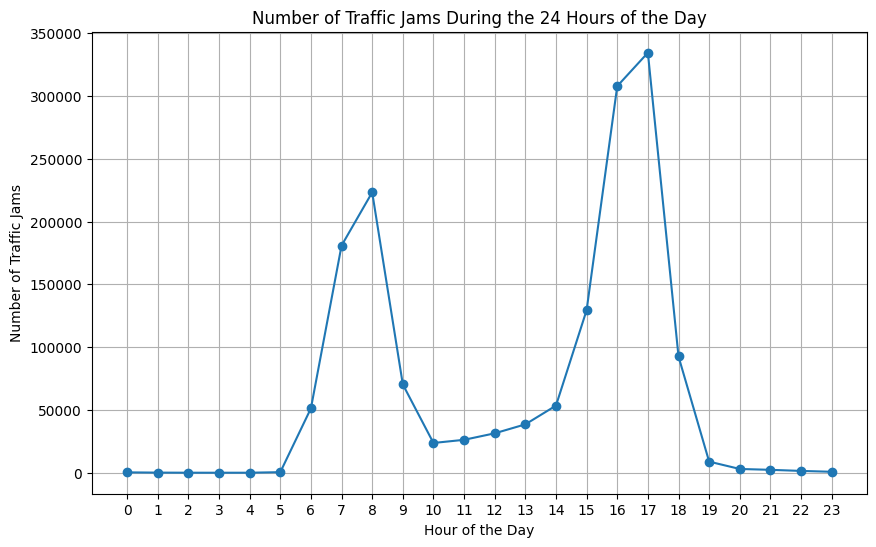

In [146]:
hourly_counts = traffic_jam['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Traffic Jams')
plt.title('Number of Traffic Jams During the 24 Hours of the Day')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

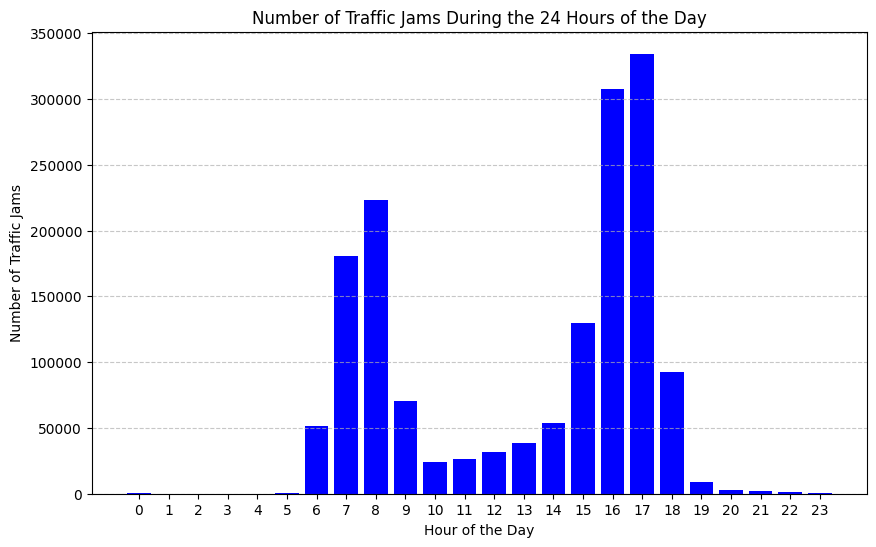

In [147]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Traffic Jams')
plt.title('Number of Traffic Jams During the 24 Hours of the Day')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As expected, it seems that most traffic jams happen during the morning, mainly between 7 and 9, as well as at the end of the workday, approximately from 16 to 18. This matches perfectly with the 9 to 17 schedule most people work by.

#### A2 and A73 

As we want to only have the specific roads that our client can possibly use to reach the offices, we will prepare the data for joining by filtering on the roads A2 and A73.

In [148]:
filtered_traffic= traffic_jam[(traffic_jam['RoadDescr'] == 'A73') | (traffic_jam['RoadDescr'] == 'A2')]
filtered_traffic


TrafficJamNum  StartDate    EndDate StartTime   EndTime  Severity  \
7             3589149 2023-06-13 2023-06-13  17:03:29  17:17:00    32.867   
41            3589794 2023-06-13 2023-06-13  18:37:28  18:43:00    16.465   
61            3590025 2023-06-14 2023-06-14   7:12:25   7:25:02    41.488   
66            3590065 2023-06-14 2023-06-14   7:25:25   8:07:00   216.928   
74            3590164 2023-06-14 2023-06-14   7:49:26   7:51:00     3.447   
...               ...        ...        ...       ...       ...       ...   
1581684       2757675 2020-04-23 2020-04-23  12:12:00  12:32:56    57.350   
1581715       2757792 2020-04-24 2020-04-24  13:35:00  13:45:06    20.200   
1581760       2756631 2020-04-08 2020-04-08  12:58:00  15:06:07   405.883   
1581765       2756680 2020-04-09 2020-04-09   6:25:00   6:31:41    13.367   
1581772       2756682 2020-04-09 2020-04-09   6:31:00   7:02:04    62.200   

           Length  Duration  HectometerStart  HectometerEnd  ...  \
7        2432.000    13.517            115.9          118.1  ...   
41       2976.000     5.533             92.0           89.5  ...   
61       3288.000    12.617             43.8           41.4  ...   
66       5217.000    41.583             44.2           40.0  ...   
74       2200.000     1.567            105.5          103.3  ...   
...           ...       ...              ...            ...  ...   
1581684  2739.650    20.933            162.3          164.3  ...   
1581715  2000.000    10.100            219.2          221.2  ...   
1581760  3168.076   128.117             90.6           92.6  ...   
1581765  2000.000     6.683             68.9           70.9  ...   
1581772  2002.146    31.067             69.1           71.1  ...   

                                                CauseClass  \
7                 [Geen oorzaakcode opgegeven door VWM 14]   
41                 [Geen oorzaakcode opgegeven door VWM 6]   
61                [Geen oorzaakcode opgegeven door VWM 13]   
66                [Geen oorzaakcode opgegeven door VWM 42]   
74                 [Geen oorzaakcode opgegeven door VWM 2]   
...                                                    ...   
1581684  [Geen oorzaakcode opgegeven door VWM 1], [Defe...   
1581715  [Geen oorzaakcode opgegeven door VWM 1], [Onge...   
1581760  [Geen oorzaakcode opgegeven door VWM 3], [Opru...   
1581765       [Ongeval(len) 5], [Eerder(e) ongeval(len) 2]   
1581772  [Geen oorzaakcode opgegeven door VWM 1], [Eerd...   

                     CauseCodeClass CauseCode  \
7                             [000]       001   
41                            [000]       001   
61                            [000]       001   
66                            [000]       001   
74                            [000]       001   
...                             ...       ...   
1581684         [000], [BKD], [000]       BKD   
1581715         [000], [ACI], [000]       ACI   
1581760  [000], [OCL], [HBD], [OCL]       HBD   
1581765                [ACI], [ACA]       ACI   
1581772                [000], [ACA]       ACA   

                                 Cause_1              Cause_2  \
7        Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
41       Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
61       Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
66       Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
74       Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
...                                  ...                  ...   
1581684           Defect(e) voertuig(en)      Defect voertuig   
1581715                     Ongeval(len)              Ongeval   
1581760           Defecte vrachtwagen(s)  Defecte vrachtwagen   
1581765                     Ongeval(len)              Ongeval   
1581772           Eerder(e) ongeval(len)              Ongeval   

                              Cause_3           Cause_4       StartDateTime  \
7                              Drukte  Hoge intensiteit 2023-06-13 17:03

# Data joining

First, we join the weather data with the stations data, so we can have now the details of the stations and the daily weather values in one table.

In [149]:
merged_weather_data = pd.merge(weather_stations, filtered_weather_data, left_on='STN', right_on='Station ID')
merged_weather_data

STN  LON(east)  LAT(north)  ALT(m)       NAME Date (YYYY-MM-DD)  \
0        356      5.146      51.859     0.7  Herwijnen        1989-10-05   
1        356      5.146      51.859     0.7  Herwijnen        1989-10-05   
2        356      5.146      51.859     0.7  Herwijnen        1989-10-05   
3        356      5.146      51.859     0.7  Herwijnen        1989-10-05   
4        356      5.146      51.859     0.7  Herwijnen        1989-10-05   
...      ...        ...         ...     ...        ...               ...   
2731026  391      6.197      51.498    19.5      Arcen        2024-03-25   
2731027  391      6.197      51.498    19.5      Arcen        2024-03-25   
2731028  391      6.197      51.498    19.5      Arcen        2024-03-25   
2731029  391      6.197      51.498    19.5      Arcen        2024-03-25   
2731030  391      6.197      51.498    19.5      Arcen        2024-03-25   

         Station ID  Hour  Hourly Average Wind Speed (m/s)  Wind Speed (m/s)  \
0               356    24                        48.592240         47.575092   
1               356    23                        48.703325         47.523316   
2               356    22                        48.827219         47.667645   
3               356    21                        48.860701         47.708713   
4               356    20                        26.000000         26.000000   
...             ...   ...                              ...               ...   
2731026         391     4                        20.000000         10.000000   
2731027         391     3                        20.000000         20.000000   
2731028         391     2                        20.000000         20.000000   
2731029         391     1                        20.000000         20.000000   
2731030         391     6                        10.000000         20.000000   

         ...  Precipitation Amount (mm)  Visibility (m)  Fog Indicator  \
0        ...                    0.83167       52.772276            0.0   
1        ...                    0.83167       53.439274            0.0   
2        ...                    0.83167       53.990515            0.0   
3        ...                    0.83167       54.586565            0.0   
4        ...                    0.83167       55.201124            0.0   
...      ...                        ...             ...            ...   
2731026  ...                    0.00000       52.941793            0.0   
2731027  ...                    0.00000       54.311324            0.0   
2731028  ...                    0.00000       55.889735            0.0   
2731029  ...                    0.00000       57.121085            0.0   
2731030  ...                    0.00000       54.388482            0.0   

         Rainfall Indicator  Snow Indicator  Thunderstorm Indicator  \
0                       0.0             0.0                     0.0   
1                       0.0             0.0                     0.0   
2                       0.0             0.0                     0.0   
3                       0.0             0.0                     0.0   
4                       0.0             0.0                     0.0   
...                     ...             ...                     ...   
2731026                 0.0             0.0                     0.0   
2731027                 0.0             0.0                     0.0   
2731028                 0.0             0.0                     0.0   
2731029                 0.0             0.0                     0.0   
2731030                 0.0             0.0                     0.0   

         Ice Formation Indicator  Month  Season  DOP Sector  
0                            0.0     10  Autumn           0  
1                            0.0     10  Autumn           0  
2                            0.0     10  Autumn           0  
3                            0.0     10  Autumn           0  
4                            0.0     10  Autumn           0  
...                  

Finally, we reach our (initial) final table by performing a left join on the previously created table and the traffic data we filtered. We decided to join based on both date and hour, so in this way we can keep records of all days and hours recorded by the weather stations we selected. In the future, we can try reducing this number by removing some dates that might be too far in the past to be relevant, but this is the table we will keep for now.

In [150]:
merged_data = pd.merge(merged_weather_data, filtered_traffic, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['StartDate', 'Hour'], how = 'left')
merged_data

STN  LON(east)  LAT(north)  ALT(m)       NAME Date (YYYY-MM-DD)  \
0        356      5.146      51.859     0.7  Herwijnen        1989-10-05   
1        356      5.146      51.859     0.7  Herwijnen        1989-10-05   
2        356      5.146      51.859     0.7  Herwijnen        1989-10-05   
3        356      5.146      51.859     0.7  Herwijnen        1989-10-05   
4        356      5.146      51.859     0.7  Herwijnen        1989-10-05   
...      ...        ...         ...     ...        ...               ...   
3757194  391      6.197      51.498    19.5      Arcen        2024-03-25   
3757195  391      6.197      51.498    19.5      Arcen        2024-03-25   
3757196  391      6.197      51.498    19.5      Arcen        2024-03-25   
3757197  391      6.197      51.498    19.5      Arcen        2024-03-25   
3757198  391      6.197      51.498    19.5      Arcen        2024-03-25   

         Station ID  Hour  Hourly Average Wind Speed (m/s)  Wind Speed (m/s)  \
0               356    24                        48.592240         47.575092   
1               356    23                        48.703325         47.523316   
2               356    22                        48.827219         47.667645   
3               356    21                        48.860701         47.708713   
4               356    20                        26.000000         26.000000   
...             ...   ...                              ...               ...   
3757194         391     4                        20.000000         10.000000   
3757195         391     3                        20.000000         20.000000   
3757196         391     2                        20.000000         20.000000   
3757197         391     1                        20.000000         20.000000   
3757198         391     6                        10.000000         20.000000   

         ...  CauseCodeDescr  CauseClass  CauseCodeClass  CauseCode  Cause_1  \
0        ...             NaN         NaN             NaN        NaN      NaN   
1        ...             NaN         NaN             NaN        NaN      NaN   
2        ...             NaN         NaN             NaN        NaN      NaN   
3        ...             NaN         NaN             NaN        NaN      NaN   
4        ...             NaN         NaN             NaN        NaN      NaN   
...      ...             ...         ...             ...        ...      ...   
3757194  ...             NaN         NaN             NaN        NaN      NaN   
3757195  ...             NaN         NaN             NaN        NaN      NaN   
3757196  ...             NaN         NaN             NaN        NaN      NaN   
3757197  ...             NaN         NaN             NaN        NaN      NaN   
3757198  ...             NaN         NaN             NaN        NaN      NaN   

         Cause_2  Cause_3  Cause_4  StartDateTime  EndDateTime  
0            NaN      NaN      NaN            NaT          NaT  
1            NaN      NaN      NaN            NaT          NaT  
2            NaN      NaN      NaN            NaT          NaT  
3            NaN      NaN      NaN            NaT          NaT  
4            NaN      NaN      NaN            NaT          NaT  
...          ...      ...      ...            ...          ...  
3757194      NaN      NaN      NaN            NaT          NaT  
3757195      NaN      NaN      NaN            NaT          NaT  
3757196      NaN      NaN      NaN            NaT          NaT  
3757197      NaN      NaN      NaN            NaT          NaT  
3757198      NaN      NaN      NaN            NaT          NaT  

[3757199 rows x 51 columns]

## EDA on (initial) final dataset 
#### For the requested weather stations and roads

We will add a new column, that displays the weekday name of each date.

In [151]:
merged_data['Date (YYYY-MM-DD)']= pd.to_datetime(merged_data['Date (YYYY-MM-DD)'])

merged_data['Weekday Name'] = merged_data['Date (YYYY-MM-DD)'].dt.day_name()

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757199 entries, 0 to 3757198
Data columns (total 52 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   STN                                int64         
 1   LON(east)                          float64       
 2   LAT(north)                         float64       
 3   ALT(m)                             float64       
 4   NAME                               object        
 5   Date (YYYY-MM-DD)                  datetime64[ns]
 6   Station ID                         int32         
 7   Hour                               int32         
 8   Hourly Average Wind Speed (m/s)    float64       
 9   Wind Speed (m/s)                   float64       
 10  Highest Wind Gust (m/s)            float64       
 11  Temperature (0.1°C)                float64       
 12  Duration of Precipitation (hours)  float64       
 13  Precipitation Amount (mm)          float64       
 14  Vi

In [152]:
unique_dates_weekdays = merged_data.drop_duplicates(subset=['Date (YYYY-MM-DD)', 'Weekday Name'])

unique_dates_weekdays['Weekday Name'].value_counts()

Weekday Name
Thursday     3821
Friday       3821
Saturday     3821
Sunday       3821
Monday       3821
Tuesday      3821
Wednesday    3821
Name: count, dtype: int64

It seems that we have a perfectly even distribution of records for each weekday. It might be interesting to see how much out of each is days with traffic jams.

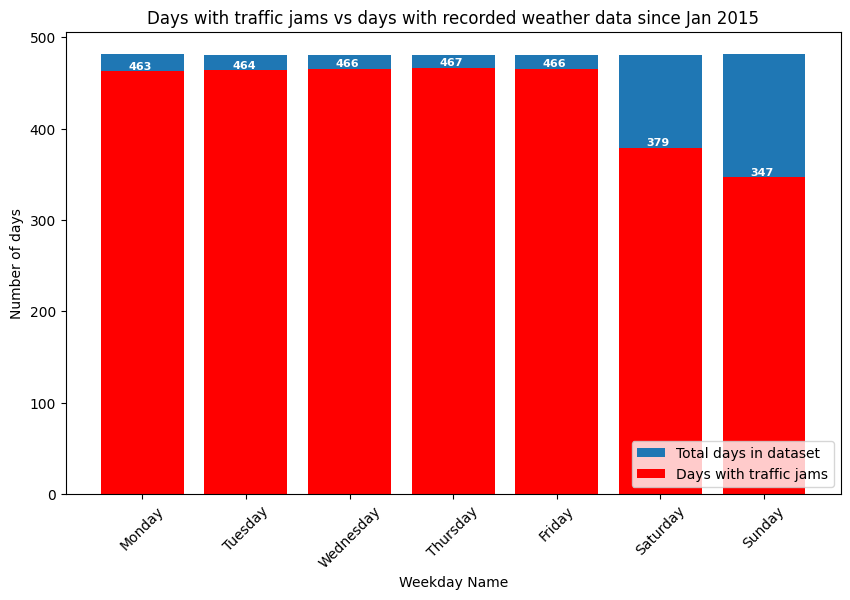

In [153]:
# Unique weekdays in the dataset with recorded weather data
unique_dates_weekdays = merged_data.drop_duplicates(subset=['Date (YYYY-MM-DD)', 'Weekday Name'])
min_date = merged_data['StartDate'].min()
unique_dates_weekdays = unique_dates_weekdays[unique_dates_weekdays['Date (YYYY-MM-DD)'] >= min_date]
value_counts = unique_dates_weekdays['Weekday Name'].value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_value_counts = value_counts.reindex(weekday_order)

# Unique days with traffic jams (one or more)
unique_weekdays_with_traffic = merged_data.drop_duplicates(subset=['StartDate', 'Weekday Name']) 
value_counts_traffic = unique_weekdays_with_traffic['Weekday Name'].value_counts()
sorted_value_counts_traffic = value_counts_traffic.reindex(weekday_order)

plt.figure(figsize=(10, 6))
bars1 =plt.bar(sorted_value_counts.index, sorted_value_counts.values)
bars = plt.bar(sorted_value_counts_traffic.index, sorted_value_counts_traffic.values, color = 'red')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3.0, yval, int(yval), va='bottom',fontsize=8, color='white',  fontweight='bold')

plt.xlabel('Weekday Name')
plt.ylabel('Number of days')
plt.title('Days with traffic jams vs days with recorded weather data since Jan 2015')
plt.xticks(rotation=45)
plt.legend([bars1, bars], ['Total days in dataset', 'Days with traffic jams'], loc='lower right')
plt.show()


We can see, as expected, that the weekends have significantly less traffic jams than the workdays. This could be due people not having to go to work.

Since we can see that the traffic data starts from 2015, whereas the weather data states even back to 1951, it created a huge number of NAs in our final table. We can, for the future, consider reducing the dataset to only records starting 2015.

In [154]:
print(merged_data['StartDate'].min())
print(merged_data['Date (YYYY-MM-DD)'].min())

2015-01-04 00:00:00
1951-01-01 00:00:00


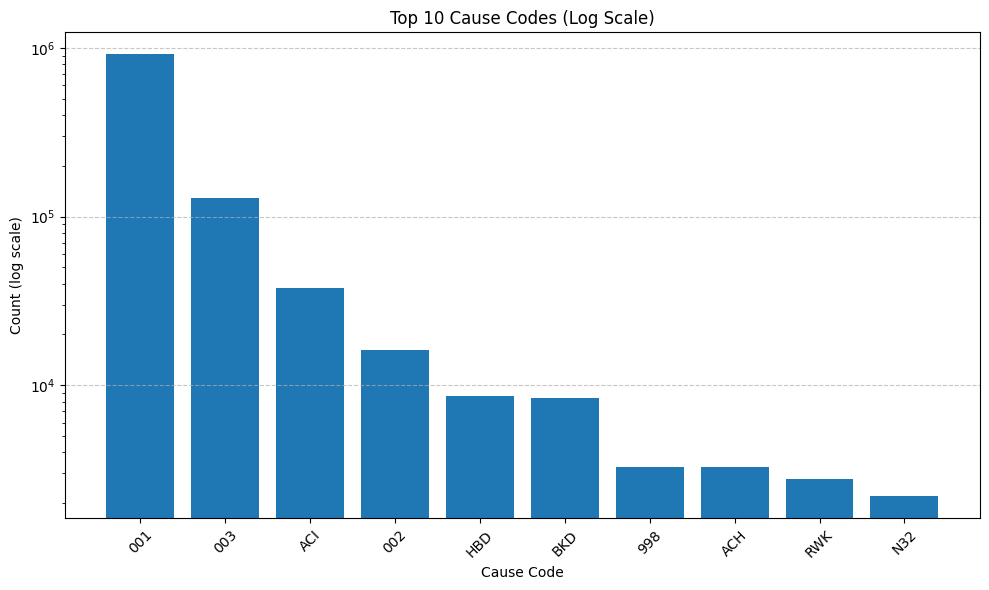

In [155]:
top_n = 10

cause_code_counts = merged_data['CauseCode'].value_counts()
#Since we see big differenc between causes, we will select the top 10
top_cause_code_counts = cause_code_counts.head(top_n)

plt.figure(figsize=(10, 6))
plt.bar(top_cause_code_counts.index, top_cause_code_counts)
plt.yscale('log') 
plt.title(f'Top {top_n} Cause Codes (Log Scale)')
plt.xlabel('Cause Code')
plt.ylabel('Count (log scale)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can try spotting some initial relationships between relevant variables by creating a pairplot.

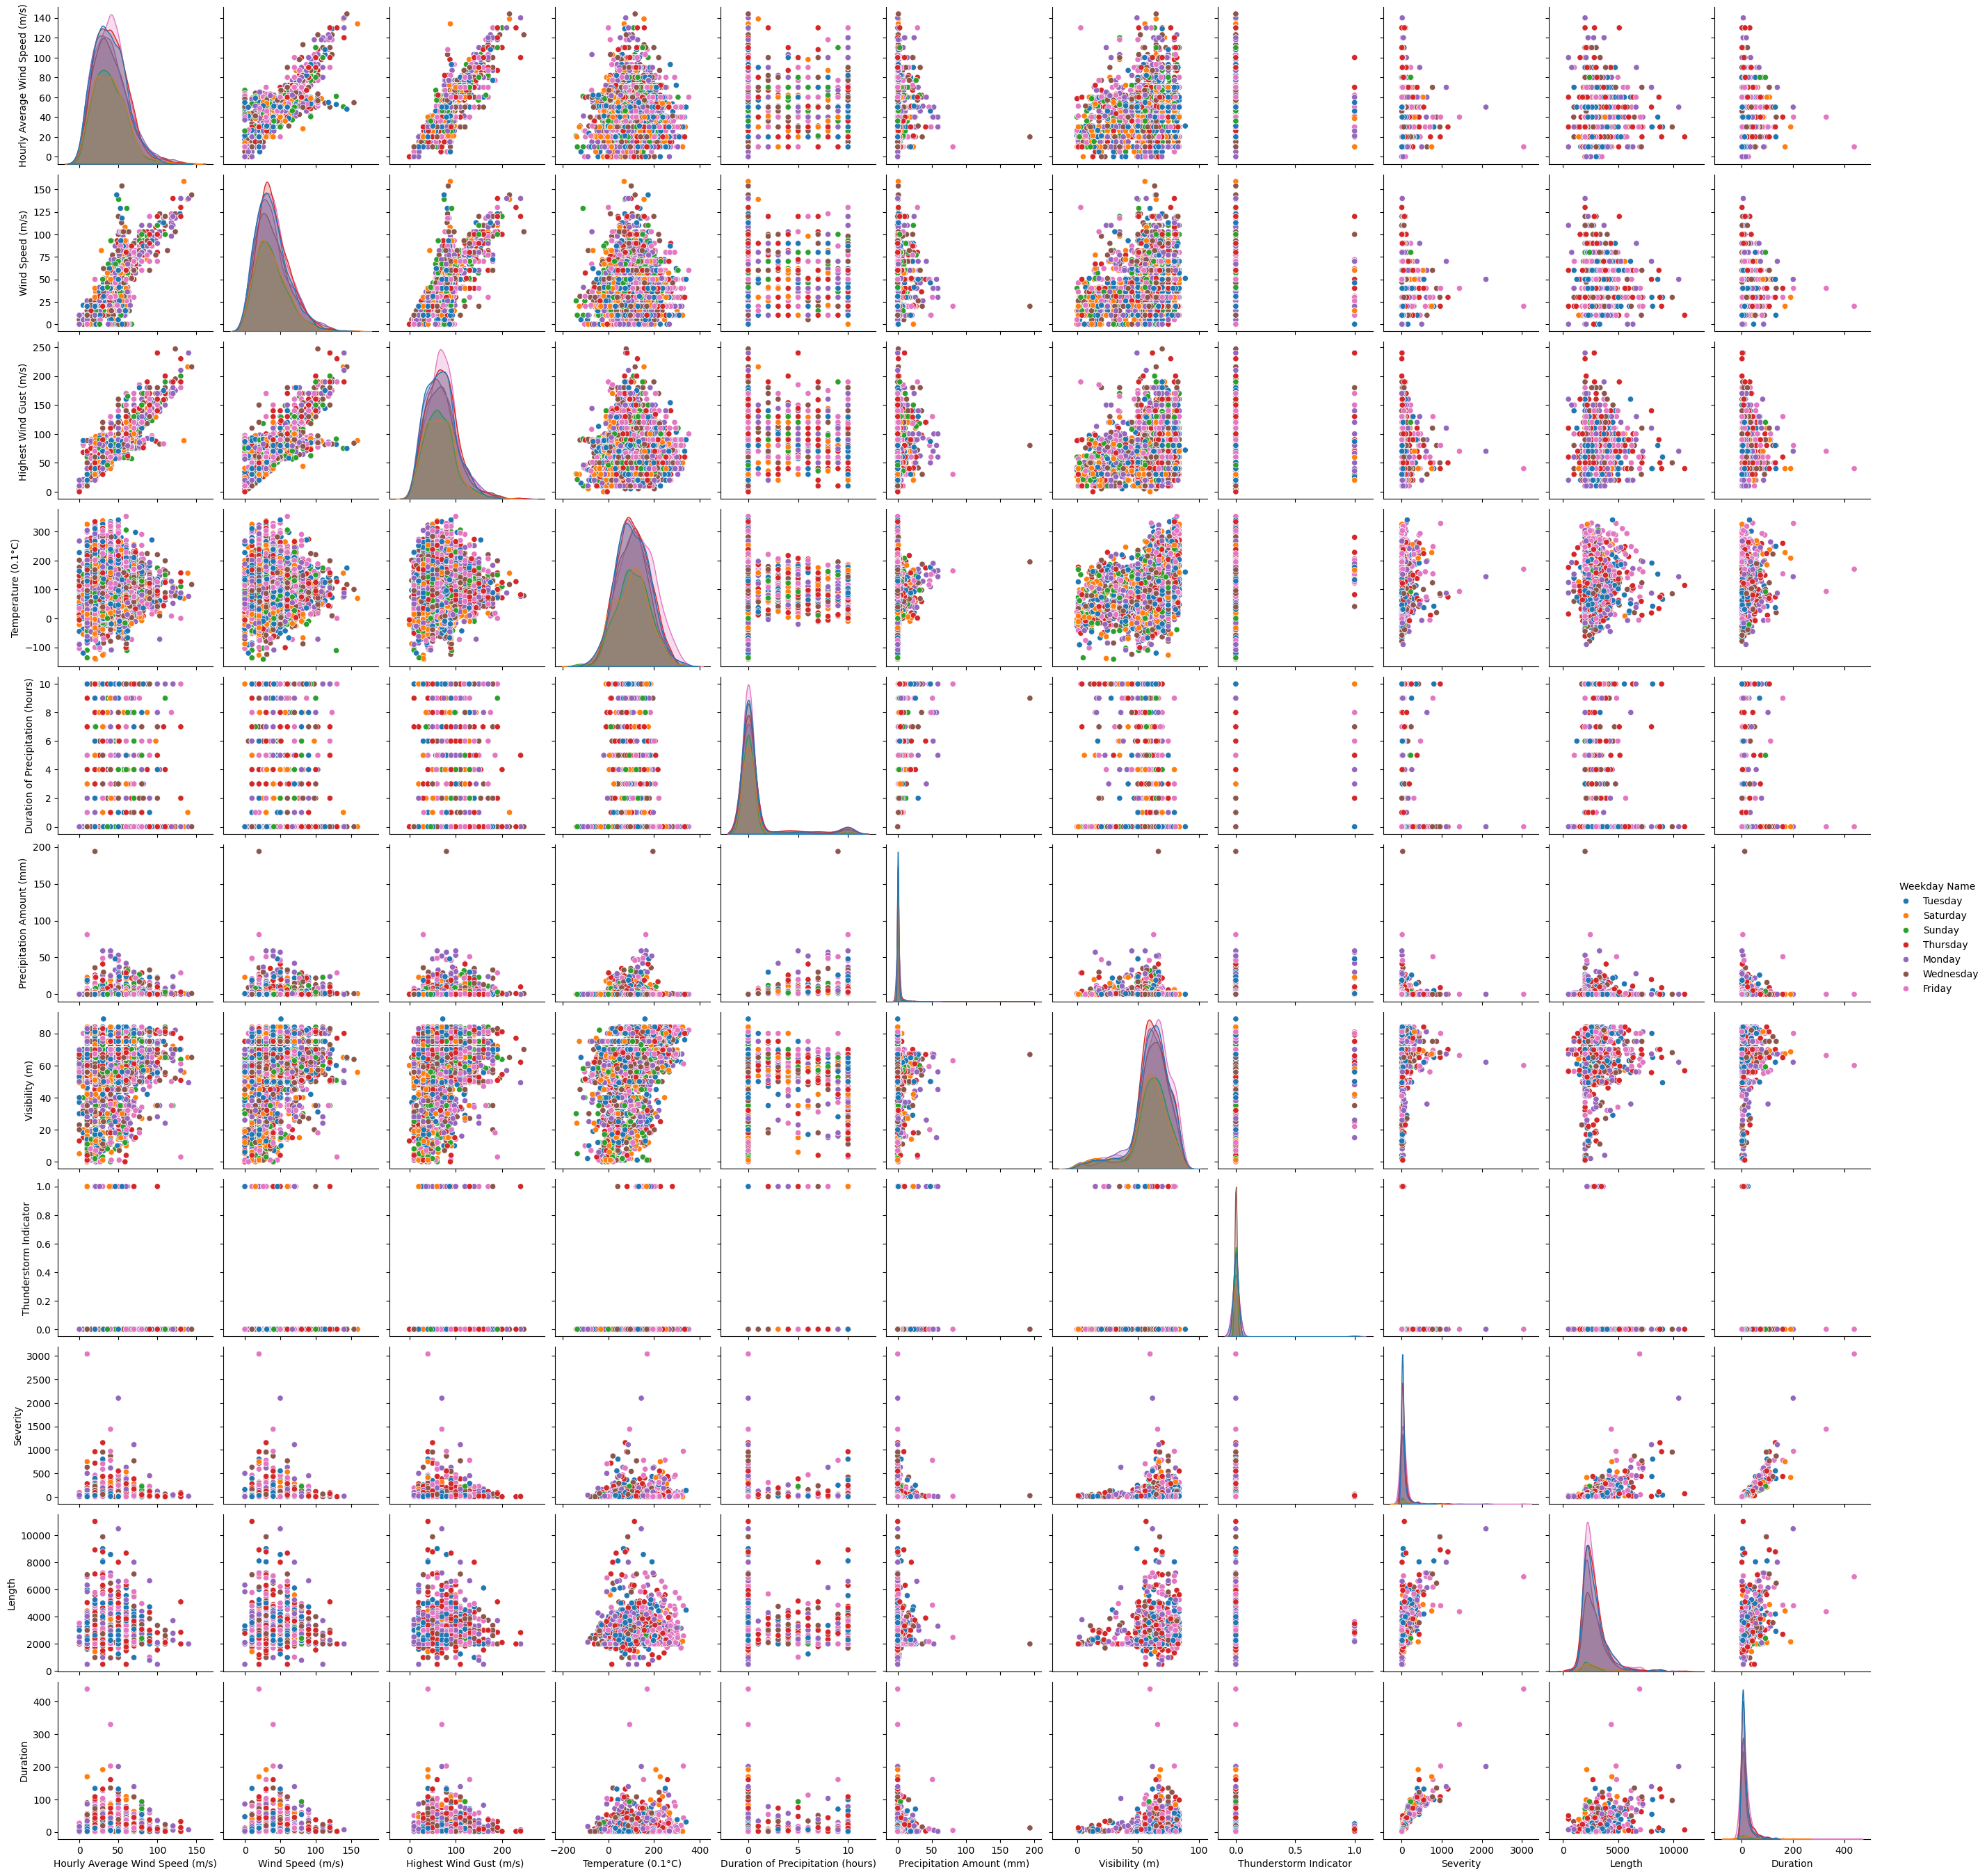

In [156]:
import seaborn as sns

columns_to_drop = ['LON(east)', 'LAT(north)', 'Rainfall Indicator', 'Snow Indicator',
       'Fog Indicator', 'Ice Formation Indicator', 'TrafficJamNum', 'RoadNumber', 'ALT(m)', 'HectometerStart', 'HectometerEnd' ]
categorical_data = merged_data.select_dtypes(exclude=['int32', 'int64'])
categorical_data = categorical_data.drop(columns=columns_to_drop)
sns.pairplot(categorical_data.sample(5000), hue="Weekday Name")

As the dataset has a lot of columns and rows, it would take to much time to try and see the results of a pairplot on all data. However, we could keep the number of relevant columns, but simply reduce the rows to a reasonable number, so that we can still spot a trend, while taking all columns into account.

We are specifically interested in **Duration of the traffic jam** and **Severity of the traffic jam**. We can observe already that these 2 form some kind of linear relationship, therefore leading us to think that the grade given for severity is heavily influenced also by duration. We can also see, for both of them, that they are somewhat displaying a linear relationship with the **Average Length**, although not as strong. 

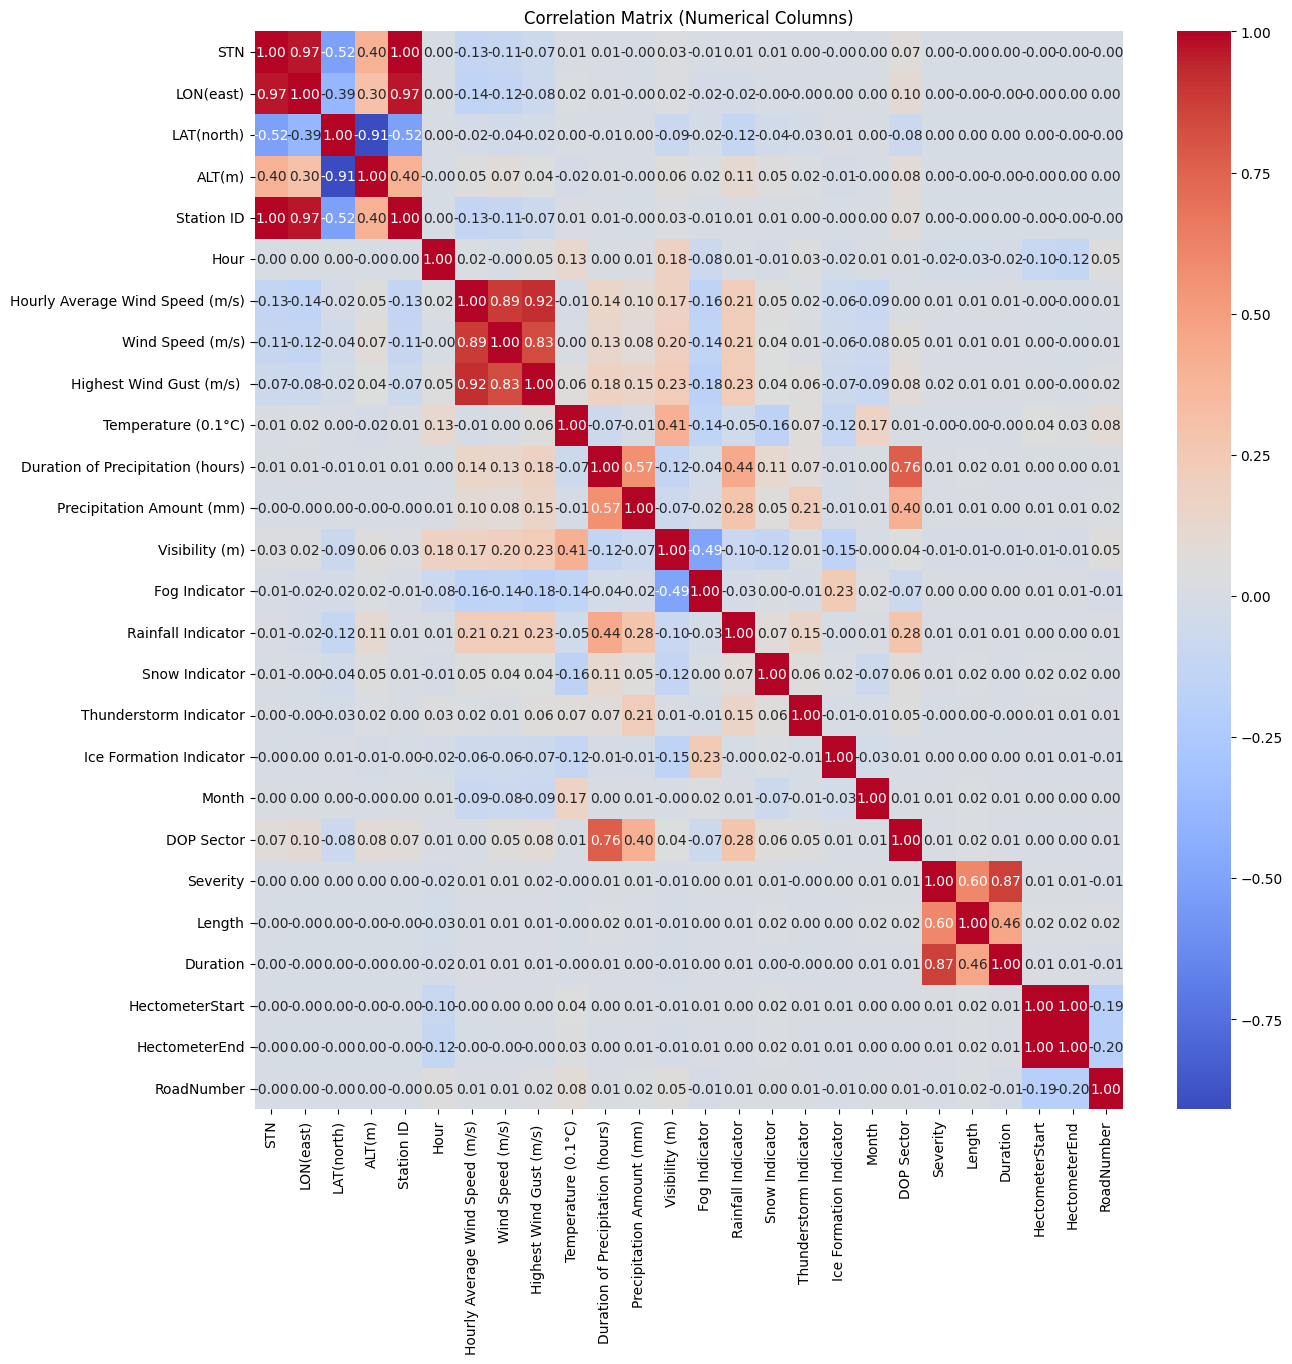

In [157]:
# Selecting only the numerical columns
numerical_columns = merged_data.select_dtypes(include=['int64', 'float64', 'int32'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

We can not observe any relevant correlations. :-( This, however, is constant with our discoveries from the pairplot, as we can only observe the same main correlations we could also spot from the initial graphs. I am making this message to test the push-commit-pull chain. ddd

# Data joining
## Data preparation for joining
### Weather data

As we want to join based on only the closest weather station to each city of interest, we store these stations' names in a variable, that we later use to filter the weather data to only display records that are coming from the stations of interest. 

In [158]:
unique_ids = set(id_ for station_list in closest_stations.values() for id_, _ in station_list)
unique_ids

{356, 370, 375, 377, 380, 391}

Apart from the weather stations, another important factor for the join is the date. We want to make sure that the dates in both dataset start and end at the same time.

In [159]:
print("Traffic data start:", traffic_jam['StartDate'].min())
print("Traffic data end:", traffic_jam['StartDate'].max())
print("Weather data start:", df['Date (YYYY-MM-DD)'].min())
print("Weather data end:", df['Date (YYYY-MM-DD)'].max())

max_start_date = max(traffic_jam['StartDate'].min(), df['Date (YYYY-MM-DD)'].min())
min_end_date = min(traffic_jam['StartDate'].max(), df['Date (YYYY-MM-DD)'].max())
print("--------------------------------------")
print("Start date:", max_start_date)
print("End date:", min_end_date)

Traffic data start: 2015-01-01 00:00:00
Traffic data end: 2024-02-29 00:00:00
Weather data start: 1951-01-01 00:00:00
Weather data end: 2024-03-25 00:00:00
--------------------------------------
Start date: 2015-01-01 00:00:00
End date: 2024-02-29 00:00:00


In [160]:
filtered_weather_data = df[(df['Date (YYYY-MM-DD)'] >= max_start_date) & (df['Date (YYYY-MM-DD)'] <= min_end_date)]
print("Minimum date:", filtered_weather_data['Date (YYYY-MM-DD)'].min(), "and maximum date:", filtered_weather_data['Date (YYYY-MM-DD)'].max())

Minimum date: 2015-01-01 00:00:00 and maximum date: 2024-02-29 00:00:00


In [161]:
filtered_weather_data = filtered_weather_data[filtered_weather_data['Station ID'].isin(unique_ids)]
print(filtered_weather_data.shape)
filtered_weather_data.sample(3)

(481968, 18)


Date (YYYY-MM-DD)  Station ID  Hour  Hourly Average Wind Speed (m/s)  \
16582233        2017-11-01         356    11                             50.0   
16287508        2017-02-07         377    13                             30.0   
18907472        2023-07-15         356    19                             50.0   

          Wind Speed (m/s)  Highest Wind Gust (m/s)   Temperature (0.1°C)  \
16582233              50.0                      70.0                123.0   
16287508              30.0                      50.0                 51.0   
18907472              40.0                     100.0                201.0   

          Duration of Precipitation (hours)  Precipitation Amount (mm)  \
16582233                                0.0                        0.0   
16287508                                0.0                        1.0   
18907472                                0.0                        0.0   

          Visibility (m)  Fog Indicator  Rainfall Indicator  Snow Indicator  \
16582233       56.806323            0.0                 0.0             0.0   
16287508       41.000000            0.0                 1.0             0.0   
18907472       66.750409            0.0                 0.0             0.0   

          Thunderstorm Indicator  Ice Formation Indicator  Month  Season  \
16582233                     0.0                      0.0     11  Autumn   
16287508                     0.0                      0.0      2  Winter   
18907472                     0.0                      0.0      7  Summer   

          DOP Sector  
16582233           1  
16287508           1  
18907472           1

After filtering for the relevant stations, we still have around half a million observations in the weather dataset.

In [162]:
hourlyobservations = filtered_weather_data.groupby(['Station ID', 'Date (YYYY-MM-DD)', 'Hour']).size()
hourlyobservations = hourlyobservations.reset_index(name='NumObs')
print("Min number of observations per hour:", hourlyobservations['NumObs'].min())
print("Max number of observations per hour:", hourlyobservations['NumObs'].max())

Min number of observations per hour: 1
Max number of observations per hour: 1


It seems that we have the weather indicators measured 1 time per hour in each relevant station. Therefore, we need to come up with a solution that would allow us to make sure that for each traffic jam we have weather data in place.

### Traffic data

It looks like there might be observations that contain traffic jams that continued from one day until the other. Therefore, when joining we need to carefully consider whether we want to join based on the start or end date and time.

In [163]:
traffic_jam[traffic_jam['StartDate'] != traffic_jam['EndDate']] 

TrafficJamNum  StartDate    EndDate StartTime  EndTime  Severity  \
6536          3568729 2023-06-03 2023-06-04  23:52:22  0:31:03   111.825   
11132         3571530 2023-06-05 2023-06-06  23:54:20  0:51:48   208.273   
11133         3571532 2023-06-05 2023-06-06  23:59:20  1:34:20   264.233   
13722         3576406 2023-06-07 2023-06-08  21:13:25  0:42:54   597.529   
14007         3576426 2023-06-07 2023-06-08  22:13:23  0:07:33   284.758   
...               ...        ...        ...       ...      ...       ...   
1566172       2762411 2020-06-06 2020-06-07  23:52:00  0:45:47   161.350   
1566195       2761918 2020-06-03 2020-06-04  23:46:00  0:27:21   123.900   
1569386       2811903 2021-04-16 2021-04-17  21:32:00  0:07:07   456.083   
1578962       2798351 2020-12-30 2020-12-31  18:57:00  1:16:19  1549.400   
1580629       2760871 2020-05-28 2020-05-29  14:27:00  0:02:37  4578.283   

           Length  Duration  HectometerStart  HectometerEnd  ...  \
6536     2891.000    38.683             62.6           59.0  ...   
11132    3624.000    57.467             55.1           50.1  ...   
11133    2781.000    95.000             79.1           76.7  ...   
13722    2852.000   209.483             44.1           41.3  ...   
14007    2494.000   114.167             15.4           12.8  ...   
...           ...       ...              ...            ...  ...   
1566172  3000.000    53.783             88.4           91.4  ...   
1566195  2996.372    41.350            126.0          124.0  ...   
1569386  2940.260   155.117             29.6           31.6  ...   
1578962  4084.714   379.317             95.3           93.3  ...   
1580629  7953.702   575.617             44.1           42.1  ...   

                                                CauseClass  \
6536     [Geen oorzaakcode opgegeven door VWM 4], [Wegw...   
11132    [Geen oorzaakcode opgegeven door VWM 10], [Weg...   
11133    [Geen oorzaakcode opgegeven door VWM 5], [Wegw...   
13722    [Geen oorzaakcode opgegeven door VWM 59], [Weg...   
14007    [Geen oorzaakcode opgegeven door VWM 60], [Weg...   
...                                                    ...   
1566172  [Geen oorzaakcode opgegeven door VWM 1], [Onge...   
1566195                                  [Ongeval(len) 41]   
1569386  [Geen oorzaakcode opgegeven door VWM 1], [Onge...   
1578962  [Ongeval(len) 16], [Ongeval met vrachtwagen(s)...   
1580629  [Geen oorzaakcode opgegeven door VWM 0], [Onge...   

                     CauseCodeClass CauseCode  \
6536                   [000], [RWK]       RWK   
11132                  [000], [RWK]       RWK   
11133                  [000], [RWK]       RWK   
13722                  [000], [RWK]       RWK   
14007                  [000], [RWK]       RWK   
...                             ...       ...   
1566172         [000], [ACI], [N03]       ACI   
1566195                       [ACI]       ACI   
1569386  [000], [N65], [RWK], [N60]       N60   
1578962         [ACI], [ACH], [N32]       ACH   
1580629  [000], [ACH], [OCL], [N32]       OCL   

                                   Cause_1               Cause_2  \
6536                      Wegwerkzaamheden         Werkzaamheden   
11132                     Wegwerkzaamheden         Werkzaamheden   
11133                     Wegwerkzaamheden         Werkzaamheden   
13722                     Wegwerkzaamheden         Werkzaamheden   
14007                     Wegwerkzaamheden         Werkzaamheden   
...                                    ...                   ...   
1566172                       Ongeval(len)               Ongeval   
1566195                       Ongeval(len)               Ongeval   
1569386  Werkzaamheden op aansluitende weg  Werkzaamheden elders   
1578962         Ongeval met vrachtwagen(s)   Ongeval vrachtwagen   
1580629            Opruimingswerkzaamheden   Opruimwerkzaamheden   

                                Cause_3                      Cause_4  \
6536                      Werkzaamheden  Aanleg en gepl

To join later on date and hour, we want to make a new column containing only the hour of the traffic jam start.

In [164]:
traffic_jam['Hour'] = traffic_jam['StartTime'].apply(lambda x: x.split(':')[0]).astype(int)
traffic_jam

TrafficJamNum  StartDate    EndDate StartTime   EndTime  Severity  \
0             3589057 2023-06-13 2023-06-13  16:54:29  17:00:06    13.480   
1             3589058 2023-06-13 2023-06-13  16:54:29  17:09:01    46.287   
2             3589060 2023-06-13 2023-06-13  16:54:29  16:56:05     5.120   
3             3589061 2023-06-13 2023-06-13  16:54:29  17:06:00    29.525   
4             3589062 2023-06-13 2023-06-13  16:54:29  17:04:00    28.952   
...               ...        ...        ...       ...       ...       ...   
1581776       2756774 2020-04-10 2020-04-10   6:31:00   7:14:41   102.150   
1581777       2756818 2020-04-10 2020-04-10  16:46:00  17:35:32   139.217   
1581778       2756726 2020-04-09 2020-04-09  14:14:00  14:17:40     7.333   
1581779       2756735 2020-04-09 2020-04-09  16:03:00  16:15:27    25.900   
1581780       2756909 2020-04-13 2020-04-13  16:40:00  17:41:19   122.633   

           Length  Duration  HectometerStart  HectometerEnd  ...  \
0        2400.000     5.617             45.6           47.9  ...   
1        3185.000    14.533             31.4           28.2  ...   
2        3200.000     1.600            166.5          169.7  ...   
3        2564.000    11.517             82.8           85.6  ...   
4        3042.000     9.517            144.3          140.6  ...   
...           ...       ...              ...            ...  ...   
1581776  2338.421    43.683             52.3           50.3  ...   
1581777  2810.565    49.533            146.2          144.2  ...   
1581778  2000.000     3.667             30.0           32.0  ...   
1581779  2080.321    12.450             51.5           53.5  ...   
1581780  2000.000    61.317            111.6          113.6  ...   

                                                CauseClass  \
0                  [Geen oorzaakcode opgegeven door VWM 6]   
1                 [Geen oorzaakcode opgegeven door VWM 15]   
2                  [Geen oorzaakcode opgegeven door VWM 2]   
3                 [Geen oorzaakcode opgegeven door VWM 12]   
4                 [Geen oorzaakcode opgegeven door VWM 10]   
...                                                    ...   
1581776  [Geen oorzaakcode opgegeven door VWM 1], [Opru...   
1581777  [Opruimingswerkzaamheden 46], [Eerder(e) ongev...   
1581778  [Geen oorzaakcode opgegeven door VWM 1], [Te h...   
1581779           [Geen oorzaakcode opgegeven door VWM 12]   
1581780  [Geen oorzaakcode opgegeven door VWM 1], [Onge...   

              CauseCodeClass CauseCode  \
0                      [000]       001   
1                      [000]       001   
2                      [000]       001   
3                      [000]       001   
4                      [000]       001   
...                      ...       ...   
1581776         [000], [CLE]       CLE   
1581777         [OCL], [ACA]       ACI   
1581778  [000], [OHW], [000]       OHW   
1581779                [000]       001   
1581780         [000], [ACI]       ACI   

                                                  Cause_1  \
0                         Spitsfile (geen oorzaak gemeld)   
1                         Spitsfile (geen oorzaak gemeld)   
2                         Spitsfile (geen oorzaak gemeld)   
3                         Spitsfile (geen oorzaak gemeld)   
4                         Spitsfile (geen oorzaak gemeld)   
...                                                   ...   
1581776                               Opruimwerkzaamheden   
1581777                                      Ongeval(len)   
1581778  Te hoog voertuig gesignaleerd, wordt afgehandeld   
1581779                   Spitsfile (geen oorzaak gemeld)   
1581780                                      Ongeval(len)   

                     Cause_2                         Cause_3  \
0        Geen oorzaak gemeld                          Drukte   
1        Geen oorzaak gemeld                          Drukte   
2        Geen oorzaak gemeld                          Drukte   
3        Geen oorzaak gemel

To get an overview of the times when most traffic jams happen, we can create a line/bar chart.

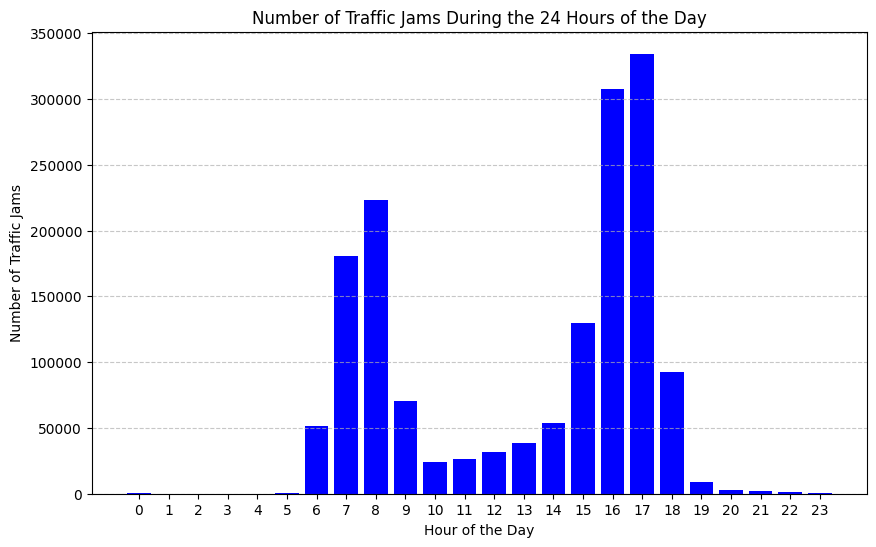

In [165]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Traffic Jams')
plt.title('Number of Traffic Jams During the 24 Hours of the Day')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As expected, it seems that most traffic jams happen during the morning, mainly between 7 and 9, as well as at the end of the workday, approximately from 16 to 18. This matches perfectly with the 9 to 17 schedule most people work by.

#### A2 and A73 

As we want to only have the specific roads that our client can possibly use to reach the offices, we will prepare the data for joining by filtering on the roads A2 and A73.

In [166]:
filtered_traffic= traffic_jam[(traffic_jam['RoadDescr'] == 'A73') | (traffic_jam['RoadDescr'] == 'A2')]
filtered_traffic

TrafficJamNum  StartDate    EndDate StartTime   EndTime  Severity  \
7             3589149 2023-06-13 2023-06-13  17:03:29  17:17:00    32.867   
41            3589794 2023-06-13 2023-06-13  18:37:28  18:43:00    16.465   
61            3590025 2023-06-14 2023-06-14   7:12:25   7:25:02    41.488   
66            3590065 2023-06-14 2023-06-14   7:25:25   8:07:00   216.928   
74            3590164 2023-06-14 2023-06-14   7:49:26   7:51:00     3.447   
...               ...        ...        ...       ...       ...       ...   
1581684       2757675 2020-04-23 2020-04-23  12:12:00  12:32:56    57.350   
1581715       2757792 2020-04-24 2020-04-24  13:35:00  13:45:06    20.200   
1581760       2756631 2020-04-08 2020-04-08  12:58:00  15:06:07   405.883   
1581765       2756680 2020-04-09 2020-04-09   6:25:00   6:31:41    13.367   
1581772       2756682 2020-04-09 2020-04-09   6:31:00   7:02:04    62.200   

           Length  Duration  HectometerStart  HectometerEnd  ...  \
7        2432.000    13.517            115.9          118.1  ...   
41       2976.000     5.533             92.0           89.5  ...   
61       3288.000    12.617             43.8           41.4  ...   
66       5217.000    41.583             44.2           40.0  ...   
74       2200.000     1.567            105.5          103.3  ...   
...           ...       ...              ...            ...  ...   
1581684  2739.650    20.933            162.3          164.3  ...   
1581715  2000.000    10.100            219.2          221.2  ...   
1581760  3168.076   128.117             90.6           92.6  ...   
1581765  2000.000     6.683             68.9           70.9  ...   
1581772  2002.146    31.067             69.1           71.1  ...   

                                                CauseClass  \
7                 [Geen oorzaakcode opgegeven door VWM 14]   
41                 [Geen oorzaakcode opgegeven door VWM 6]   
61                [Geen oorzaakcode opgegeven door VWM 13]   
66                [Geen oorzaakcode opgegeven door VWM 42]   
74                 [Geen oorzaakcode opgegeven door VWM 2]   
...                                                    ...   
1581684  [Geen oorzaakcode opgegeven door VWM 1], [Defe...   
1581715  [Geen oorzaakcode opgegeven door VWM 1], [Onge...   
1581760  [Geen oorzaakcode opgegeven door VWM 3], [Opru...   
1581765       [Ongeval(len) 5], [Eerder(e) ongeval(len) 2]   
1581772  [Geen oorzaakcode opgegeven door VWM 1], [Eerd...   

                     CauseCodeClass CauseCode  \
7                             [000]       001   
41                            [000]       001   
61                            [000]       001   
66                            [000]       001   
74                            [000]       001   
...                             ...       ...   
1581684         [000], [BKD], [000]       BKD   
1581715         [000], [ACI], [000]       ACI   
1581760  [000], [OCL], [HBD], [OCL]       HBD   
1581765                [ACI], [ACA]       ACI   
1581772                [000], [ACA]       ACA   

                                 Cause_1              Cause_2  \
7        Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
41       Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
61       Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
66       Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
74       Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   
...                                  ...                  ...   
1581684           Defect(e) voertuig(en)      Defect voertuig   
1581715                     Ongeval(len)              Ongeval   
1581760           Defecte vrachtwagen(s)  Defecte vrachtwagen   
1581765                     Ongeval(len)              Ongeval   
1581772           Eerder(e) ongeval(len)              Ongeval   

                              Cause_3           Cause_4       StartDateTime  \
7                              Drukte  Hoge intensiteit 2023-06-13 17:03

## Data joining
There are several types of joins:
* Inner join - An inner join requires each row in the two joined dataframes to have matching column values. This is similar to the intersection of two sets.
* Left (outer) join - A left join returns a dataframe containing all the rows of the left dataframe. All the non-matching rows of the left dataframe contain NaN for the columns in the right dataframe. It is simply an inner join plus all the non-matching rows of the left dataframe filled with NaN for columns of the right dataframe.
* Right (outer) join - A right join is similar to the Left Outer Join. The only difference is that all the rows of the right dataframe are taken as it is and only those of the left dataframe that are common in both.
* Semi-join - A semi-join returns rows from the left table for which there are corresponding matching rows in the right table. Unlike regular joins which include the matching rows from both tables, a semi-join only includes columns from the left table in the result.
* Anti-join - An anti-join allows you to return all rows in one dataset that do not have matching values in another dataset. 
* Full (outer) join - A full join returns all those records which either have a match in the left or right dataframe. When rows in both the dataframes do not match, the resulting dataframe will have NaN for every column of the dataframe that lacks a matching row.

Sources:
* https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/
* https://www.statology.org/pandas-anti-join/
* https://www.geeksforgeeks.org/difference-between-anti-join-and-semi-join/

### Inner join version
For this kind of join, we are aiming at getting only the values that are matching in all tables.
#### Weather data and weather stations join

First, we join the weather data with the stations data, so we can have now the details of the stations and the daily weather values in one table.

In [167]:
merged_weather_data = pd.merge(weather_stations, filtered_weather_data, left_on='STN', right_on='Station ID')
merged_weather_data

STN  LON(east)  LAT(north)  ALT(m)       NAME Date (YYYY-MM-DD)  \
0       356      5.146      51.859     0.7  Herwijnen        2015-01-01   
1       356      5.146      51.859     0.7  Herwijnen        2015-01-01   
2       356      5.146      51.859     0.7  Herwijnen        2015-01-01   
3       356      5.146      51.859     0.7  Herwijnen        2015-01-01   
4       356      5.146      51.859     0.7  Herwijnen        2015-01-01   
...     ...        ...         ...     ...        ...               ...   
481963  391      6.197      51.498    19.5      Arcen        2024-02-29   
481964  391      6.197      51.498    19.5      Arcen        2024-02-29   
481965  391      6.197      51.498    19.5      Arcen        2024-02-29   
481966  391      6.197      51.498    19.5      Arcen        2024-02-29   
481967  391      6.197      51.498    19.5      Arcen        2024-02-29   

        Station ID  Hour  Hourly Average Wind Speed (m/s)  Wind Speed (m/s)  \
0              356     1                             40.0              40.0   
1              356    19                             70.0              70.0   
2              356    18                             70.0              70.0   
3              356    17                             70.0              80.0   
4              356    16                             60.0              60.0   
...            ...   ...                              ...               ...   
481963         391    20                             30.0              40.0   
481964         391    21                             40.0              30.0   
481965         391    22                             20.0              30.0   
481966         391    23                             30.0              30.0   
481967         391     9                             40.0              40.0   

        ...  Precipitation Amount (mm)  Visibility (m)  Fog Indicator  \
0       ...                        0.0       52.037477            0.0   
1       ...                        0.0       55.007178            0.0   
2       ...                        0.0       55.157257            0.0   
3       ...                        0.0       55.575877            0.0   
4       ...                        0.0       56.345072            0.0   
...     ...                        ...             ...            ...   
481963  ...                        0.0       54.647627            0.0   
481964  ...                        0.0       54.249000            0.0   
481965  ...                        0.0       53.796479            0.0   
481966  ...                        0.0       53.267449            0.0   
481967  ...                        0.0       50.744309            0.0   

        Rainfall Indicator  Snow Indicator  Thunderstorm Indicator  \
0                      0.0             0.0                     0.0   
1                      0.0             0.0                     0.0   
2                      0.0             0.0                     0.0   
3                      0.0             0.0                     0.0   
4                      0.0             0.0                     0.0   
...                    ...             ...                     ...   
481963                 0.0             0.0                     0.0   
481964                 0.0             0.0                     0.0   
481965                 0.0             0.0                     0.0   
481966                 0.0             0.0                     0.0   
481967                 0.0             0.0                     0.0   

        Ice Formation Indicator  Month  Season  DOP Sector  
0                           0.0      1  Winter           1  
1                           0.0      1  Winter           1  
2                           0.0      1  Winter           1  
3                           0.0      1  Winter           1  
4                           0.0      1  Winter           1  
...                         ...    ...     ...         ...  
481963       

From the inner join above, we expect 481.968 as these are the number of rows in the weather dataframe that should have an exact match in the weather stations data since the primary key is the Station ID. That is exactly what we get.

#### Merged weather data and traffic jams join
First, since our target variable is located in the traffic dataset, let's perform a right join with it being the right table in order to see if there are any rows in the weather data that are missing for the traffic data.

In [168]:
merged_right_test = pd.merge(merged_weather_data, filtered_traffic, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['StartDate', 'Hour'], how = "right")
nan_columns = merged_right_test.columns[merged_right_test.isna().any()]

print(merged_right_test[nan_columns].isna().sum())

STN                                  54
LON(east)                            54
LAT(north)                           54
ALT(m)                               54
NAME                                 54
Date (YYYY-MM-DD)                    54
Station ID                           54
Hourly Average Wind Speed (m/s)      54
Wind Speed (m/s)                     54
Highest Wind Gust (m/s)              54
Temperature (0.1°C)                  54
Duration of Precipitation (hours)    54
Precipitation Amount (mm)            54
Visibility (m)                       54
Fog Indicator                        54
Rainfall Indicator                   54
Snow Indicator                       54
Thunderstorm Indicator               54
Ice Formation Indicator              54
Month                                54
Season                               54
DOP Sector                           54
dtype: int64


It turns out that there are 54 rows in the traffic dataset for which there is no corresponding weather data. Fortunately, this number is not too large. However, when we perform an inner join, logically, there are no missing values in the results as only the intersecting rows are taken. However, in that way, we are ignoring these 54 traffic jam occurances.

In [169]:
merged_data = pd.merge(merged_weather_data, filtered_traffic, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['StartDate', 'Hour'])
print(merged_data.shape)
merged_data.sample(5)

(1149186, 51)


STN  LON(east)  LAT(north)  ALT(m)        NAME Date (YYYY-MM-DD)  \
768479  380      5.762      50.906   114.3  Maastricht        2015-03-16   
589244  377      5.763      51.198    30.0         Ell        2016-01-18   
283325  370      5.377      51.451    22.6   Eindhoven        2020-01-15   
367663  370      5.377      51.451    22.6   Eindhoven        2023-10-25   
906414  380      5.762      50.906   114.3  Maastricht        2023-02-23   

        Station ID  Hour  Hourly Average Wind Speed (m/s)  Wind Speed (m/s)  \
768479         380     7                             30.0              40.0   
589244         377    16                             20.0              20.0   
283325         370    18                             40.0              30.0   
367663         370    15                             20.0              20.0   
906414         380    16                             20.0              20.0   

        ...                   CauseCodeDescr  \
768479  ...  Spitsfile (geen oorzaak gemeld)   
589244  ...  Spitsfile (geen oorzaak gemeld)   
283325  ...  Spitsfile (geen oorzaak gemeld)   
367663  ...  Spitsfile (geen oorzaak gemeld)   
906414  ...  Spitsfile (geen oorzaak gemeld)   

                                      CauseClass  CauseCodeClass  CauseCode  \
768479   [Geen oorzaakcode opgegeven door VWM 5]           [000]        001   
589244  [Geen oorzaakcode opgegeven door VWM 15]           [000]        001   
283325   [Geen oorzaakcode opgegeven door VWM 1]           [000]        001   
367663   [Geen oorzaakcode opgegeven door VWM 2]           [000]        001   
906414   [Geen oorzaakcode opgegeven door VWM 1]           [000]        001   

                                Cause_1              Cause_2  Cause_3  \
768479  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   Drukte   
589244  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   Drukte   
283325  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   Drukte   
367663  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   Drukte   
906414  Spitsfile (geen oorzaak gemeld)  Geen oorzaak gemeld   Drukte   

                 Cause_4       StartDateTime         EndDateTime  
768479  Hoge intensiteit 2015-03-16 07:38:00 2015-03-16 07:43:26  
589244  Hoge intensiteit 2016-01-18 16:51:00 2016-01-18 17:05:42  
283325  Hoge intensiteit 2020-01-15 18:49:00 2020-01-15 18:50:22  
367663  Hoge intensiteit 2023-10-25 15:38:28 2023-10-25 15:40:03  
906414  Hoge intensiteit 2023-02-23 16:54:31 2023-02-23 16:56:00  

[5 rows x 51 columns]

In the resulting dataframe, we have in total 1.149.186 rows.

In [170]:
nan_columns = merged_data.columns[merged_data.isna().any()]
print(merged_data[nan_columns].isna().sum())

Series([], dtype: float64)


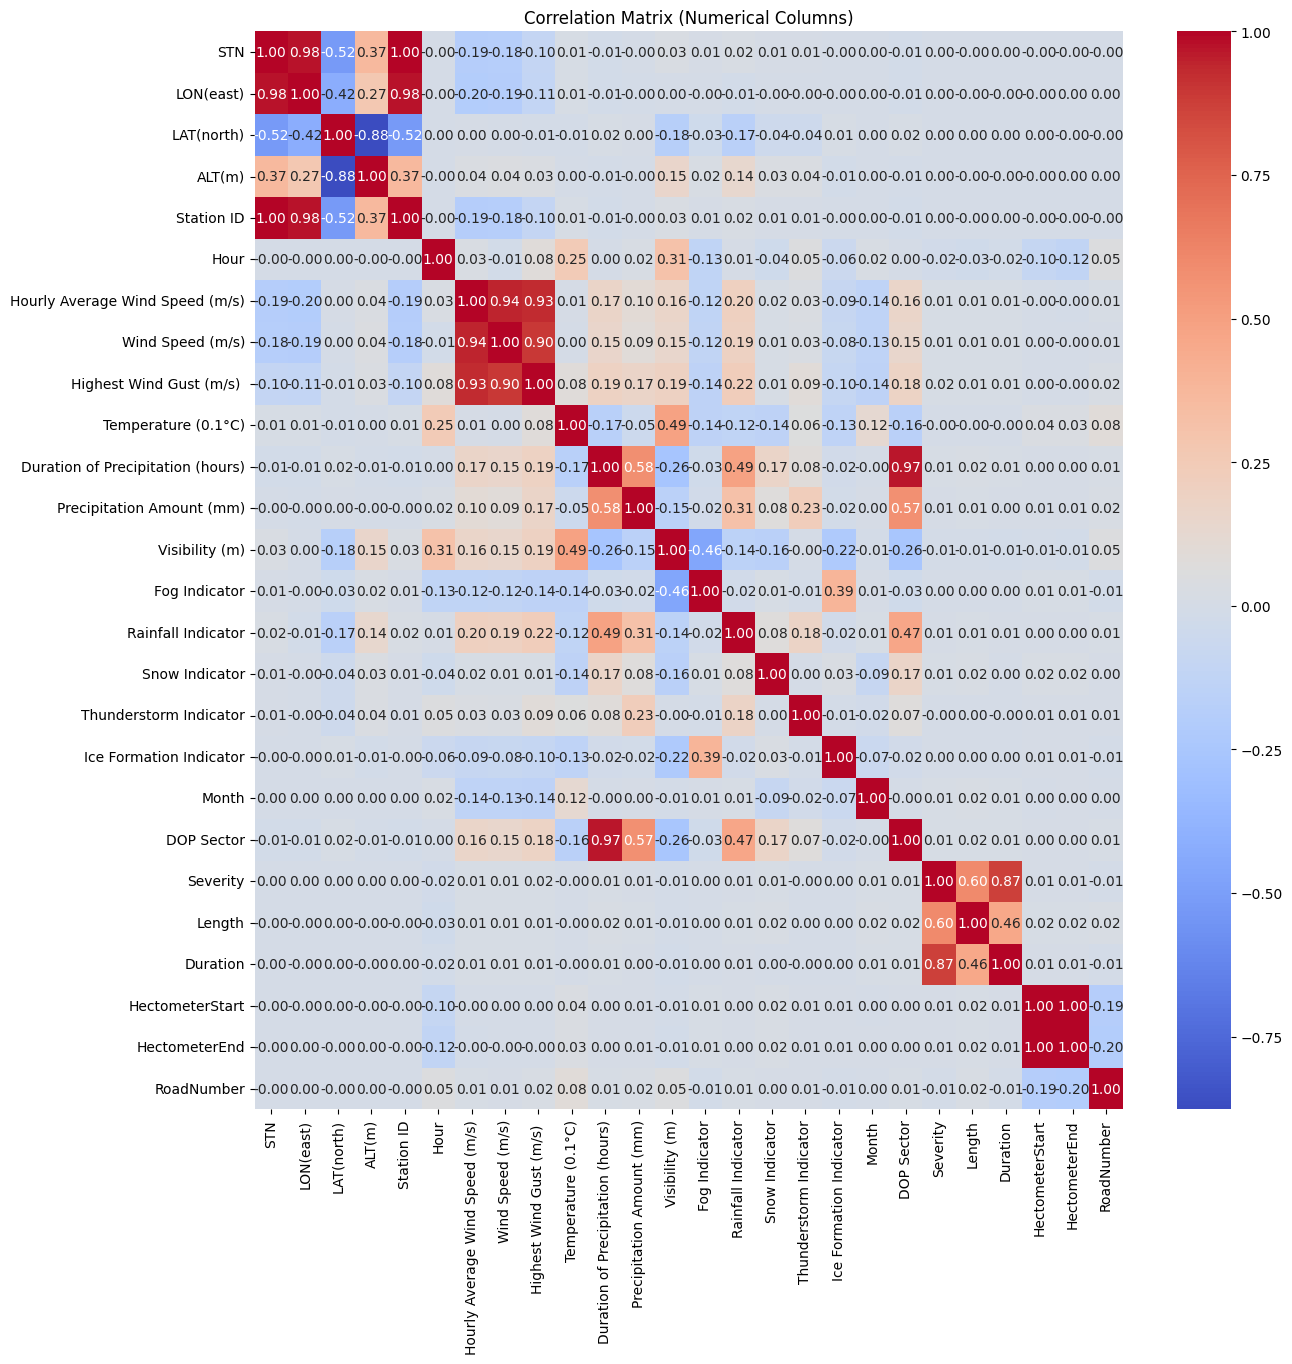

In [171]:
numerical_columns = merged_data.select_dtypes(include=['int64', 'float64', 'int32'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

Still no relevant correlation :-(

# Modeling

Despite the fact that we do not have a lot of relevant correlations, we can still try to find an algorythm that will help us out, to find 

## Support Vecotor Machines

In [175]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

merged_data_sample = merged_data.sample(n=100000, random_state=42) # sampling because it could not load

target = "Duration"
y = merged_data_sample[target]

features = ['Severity', 'Length', 'Hour', 'Hourly Average Wind Speed (m/s)','Duration of Precipitation (hours)']
X = merged_data_sample[features]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model finding accuracy
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
r2_svr = r2_score(y_test, svr_pred)
print("R²:", r2_svr)

# kernel = 'rbf',  R²: 0.7613075195041633
# kernel = 'linear', R²: 0.3839295195482627
# kernel = 'poly',  R²: -7.124101115383281 ???

R²: -7.124101115383281
